# OV7675 Image Viewer
Takes the hexadecimal output of the Camera Test from the Serial Monitor and converts and displays it as an image.

In [1]:
# Import the needed libraries
from matplotlib import pyplot as plt
import numpy as np
import struct

Update the following variable with the output of your Serial Monitor.

In [9]:
HEXADECIMAL_BYTES = [0x39BD, 0x39BD, 0x39C5, 0x39C5, 0x19C5, 0x1ABD, 0x39BD, 0x39C5, 0x39C5, 0x39BD, 0x39BD, 0x39BD, 0x39C5, 0x3BC5, 0x19C5, 0x19C5, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x19BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x19BD, 0x19BD, 0x19BD, 0x19BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x5BBD, 0x3BC5, 0x59BD, 0x59BD, 0x39BD, 0x39BD, 0x3BBD, 0x39BD, 0x39C5, 0x39C5, 0x59BD, 0x39BD, 0x39BD, 0x3BBD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x3BBD, 0x3BBD, 0x39BD, 0x5BBD, 0x5BBD, 0x3BBD, 0x39BD, 0x39BD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x39BD, 0x39BD, 0x3BBD, 0x3BBD, 0x3BBD, 0x5BBD, 0x5BBD, 0x5BB5, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x5BB5, 0x5BB5, 0x3BBD, 0x3BB5, 0x19B5, 0x19B5, 0x3BB5, 0x3BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x39B5, 0x39B5, 0x1BB5, 0x19B5, 0x19B5, 0x3BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x39B5, 0x3BB5, 0x1BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BBD, 0x3BBD, 0x5BBD, 0x5BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x1BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x5BB5, 0x39B5, 0x39B5, 0x19B5, 0x3BB5, 0x3BB5, 0x1BB5, 0x3BB5, 0x3BB5, 0x1BB5, 0x1BB5, 0x1BB5, 0x1BB5, 0x19B5, 0x19B5, 0x19B5, 0x39B5, 0x1BB5, 0x1BB5, 0x39B5, 0x39B5, 0x3BB5, 0x59B5, 0x39B5, 0x39B5, 0x19B5, 0x19B5, 0x19B5, 0x1BB5, 0x19B5, 0x19B5, 0x19B5, 0x39BD, 0x19BD, 0x39C5, 0x59C5, 0x59C5, 0x39C5, 0x39BD, 0x39C5, 0x39C5, 0x39C5, 0x39BD, 0x59C5, 0x59C5, 0x3BBD, 0x39BD, 0x39BD, 0x39C5, 0x39C5, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x19BD, 0x39C5, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39C5, 0x19BD, 0x19BD, 0x19C5, 0x19BD, 0x19BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x3BBD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x3BBD, 0x39BD, 0x59BD, 0x59BD, 0x59BD, 0x39BD, 0x3BBD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x3BBD, 0x3BBD, 0x39BD, 0x5BBD, 0x5BBD, 0x3BBD, 0x39BD, 0x39BD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x39BD, 0x3BBD, 0x3BBD, 0x3BB5, 0x5BB5, 0x7BBD, 0x7BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BB5, 0x19B5, 0x19B5, 0x3BB5, 0x3BB5, 0x5BB5, 0x3BB5, 0x3BBD, 0x1BB5, 0x39B5, 0x19B5, 0x19B5, 0x19B5, 0x39B5, 0x3BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x1BB5, 0x1BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x5BBD, 0x5BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x1BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x39B5, 0x19B5, 0x19B5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x1BB5, 0x1BB5, 0x19B5, 0x19B5, 0x19B5, 0x19B5, 0x39B5, 0x3BB5, 0x3BB5, 0x1BB5, 0x39B5, 0x3BB5, 0x3BB5, 0x1BB5, 0x19B5, 0x1BB5, 0x19B5, 0x19B5, 0x1BB5, 0x1BB5, 0x19B5, 0x19B5, 0x19BD, 0x19BD, 0x19C5, 0x39C5, 0x19C5, 0x19C5, 0x19C5, 0x39C5, 0x39C5, 0x39C5, 0x59C5, 0x59C5, 0x5BC5, 0x3BC5, 0x39BD, 0x39BD, 0x39C5, 0x3BC5, 0x3BBD, 0x39BD, 0x59BD, 0x39BD, 0x39BD, 0x39BD, 0x19BD, 0x39C5, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x3BBD, 0x19BD, 0x19BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x19BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x3BBD, 0x3BBD, 0x39BD, 0x59BD, 0x59BD, 0x59BD, 0x39BD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x5BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x5BBD, 0x3BBD, 0x5BBD, 0x3BBD, 0x39BD, 0x39B5, 0x39B5, 0x7BBD, 0x7BBD, 0x5BBD, 0x3BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BB5, 0x39B5, 0x39B5, 0x39B5, 0x5BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x19B5, 0x39B5, 0x19B5, 0x19B5, 0x39B5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x1BB5, 0x1BB5, 0x1BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x1BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x1BB5, 0x19B5, 0x39B5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x1BB5, 0x39B5, 0x39B5, 0x19B5, 0x19B5, 0x19B5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x1BB5, 0x1BB5, 0x1BB5, 0x1BB5, 0x19B5, 0x19B5, 0x19B5, 0x19B5, 0x19B5, 0x19BD, 0x19C5, 0x19C5, 0x19C5, 0x19C5, 0x19C5, 0x39BD, 0x39C5, 0x39C5, 0x39BD, 0x39C5, 0x59C5, 0x5BC5, 0x3BC5, 0x19C5, 0x19C5, 0x39C5, 0x3BC5, 0x3BC5, 0x39C5, 0x59C5, 0x39C5, 0x39C5, 0x19C5, 0x19C5, 0x39C5, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x59BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x19BD, 0x19C5, 0x19C5, 0x39C5, 0x39BD, 0x39BD, 0x39BD, 0x3BBD, 0x39BD, 0x39BD, 0x59BD, 0x59BD, 0x59BD, 0x39BD, 0x3BBD, 0x3BBD, 0x3BBD, 0x59BD, 0x5BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x39BD, 0x39BD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x39BD, 0x39B5, 0x39B5, 0x7BBD, 0x7BC5, 0x5BBD, 0x3BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BB5, 0x39B5, 0x39B5, 0x39B5, 0x39B5, 0x3BBD, 0x3BBD, 0x3BB5, 0x3BBD, 0x1BBD, 0x19B5, 0x39B5, 0x39B5, 0x19B5, 0x1BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x1BB5, 0x1BB5, 0x1BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BBD, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x5BB5, 0x3BBD, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x5BBD, 0x5BB5, 0x3BB5, 0x1BB5, 0x19B5, 0x19B5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x39B5, 0x19B5, 0x19B5, 0x19B5, 0x3BB5, 0x3BB5, 0x3BB5, 0x1BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x1BB5, 0x1BB5, 0x1BB5, 0x19B5, 0x1BB5, 0x19B5, 0x19B5, 0x19B5, 0x19B5, 0x19BD, 0x19C5, 0x19C5, 0x19C5, 0x19C5, 0x19C5, 0x39BD, 0x39BD, 0x39C5, 0x39BD, 0x39C5, 0x39C5, 0x39C5, 0x3BC5, 0x19C5, 0x19C5, 0x39C5, 0x3BC5, 0x3BC5, 0x39C5, 0x59C5, 0x39C5, 0x3BC5, 0x39C5, 0x19C5, 0x39C5, 0x39C5, 0x39BD, 0x39BD, 0x19BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x59BD, 0x59BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39C5, 0x3BC5, 0x3BC5, 0x3BBD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x59BD, 0x39BD, 0x39BD, 0x3BBD, 0x3BBD, 0x5BBD, 0x59BD, 0x3BBD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x59B5, 0x3BB5, 0x7BBD, 0x7BBD, 0x5BBD, 0x3BBD, 0x5BBD, 0x7BBD, 0x7BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BB5, 0x3BB5, 0x39B5, 0x59B5, 0x39B5, 0x3BB5, 0x3BB5, 0x3BBD, 0x3BBD, 0x1BBD, 0x19B5, 0x39B5, 0x39B5, 0x1BB5, 0x1BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x1BB5, 0x1BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x3BBD, 0x3BBD, 0x3CBD, 0x3CB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x5BB5, 0x3BBD, 0x3BB5, 0x1BB5, 0x39B5, 0x39B5, 0x3BB5, 0x5BB5, 0x5BBD, 0x3BB5, 0x3BB5, 0x1BB5, 0x19B5, 0x19B5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x39B5, 0x3BB5, 0x19B5, 0x19B5, 0x19B5, 0x19B5, 0x39B5, 0x3BB5, 0x3BB5, 0x1BB5, 0x1BB5, 0x3BB5, 0x3BB5, 0x1BB5, 0x1BB5, 0x1BB5, 0x19B5, 0x19B5, 0x19B5, 0x39B5, 0x19B5, 0x19B5, 0x19C5, 0x19C5, 0x39C5, 0x39C5, 0x39C5, 0x39BD, 0x39BD, 0x39BD, 0x59BD, 0x39BD, 0x59C5, 0x39C5, 0x39C5, 0x19C5, 0x19C5, 0x39C5, 0x39C5, 0x3BC5, 0x59C5, 0x3BC5, 0x59C5, 0x3BC5, 0x39C5, 0x39C5, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x19BD, 0x3ABD, 0x39BD, 0x39BD, 0x39BD, 0x39C5, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39C5, 0x59C5, 0x3BC5, 0x3BBD, 0x3BC5, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x3BBD, 0x3BBD, 0x39BD, 0x5BBD, 0x3BBD, 0x3BBD, 0x39BD, 0x3BBD, 0x39BD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x59BD, 0x59B5, 0x5BBD, 0x5BBD, 0x7BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x7BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x3BB5, 0x39B5, 0x39B5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BBD, 0x39B5, 0x39B5, 0x39B5, 0x1BB5, 0x1BB5, 0x3BB5, 0x1BB5, 0x1BB5, 0x3BB5, 0x3BBD, 0x1BB5, 0x1BB5, 0x1BB5, 0x3BBD, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x1BB5, 0x3BBD, 0x3BB5, 0x3BBD, 0x3CBD, 0x3CBD, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x1BB5, 0x39B5, 0x39B5, 0x3BB5, 0x3BBD, 0x3BBD, 0x3BB5, 0x3BB5, 0x1BB5, 0x19B5, 0x19B5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x39B5, 0x19B5, 0x1BB5, 0x39B5, 0x19B5, 0x19B5, 0x19B5, 0x3BB5, 0x3BB5, 0x1BB5, 0x1BB5, 0x3BB5, 0x3BB5, 0x1BB5, 0x1BB5, 0x19B5, 0x19B5, 0x19B5, 0x19B5, 0x39B5, 0x19B5, 0x19B5, 0x39BD, 0x19C5, 0x39C5, 0x39BD, 0x39C5, 0x39BD, 0x39BD, 0x59BD, 0x59BD, 0x39BD, 0x39C5, 0x39C5, 0x3BC5, 0x39C5, 0x39C5, 0x19C5, 0x39C5, 0x39BD, 0x59C5, 0x3BC5, 0x39C5, 0x59C5, 0x3BC5, 0x3BC5, 0x39C5, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x19BD, 0x3ABD, 0x39BD, 0x39BD, 0x39BD, 0x39C5, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x3BBD, 0x3BBD, 0x59BD, 0x5BC5, 0x5BC5, 0x3BC5, 0x3BC5, 0x3BBD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x3BBD, 0x3BBD, 0x39BD, 0x59BD, 0x39BD, 0x3BBD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x3BBD, 0x3BBD, 0x39BD, 0x5BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x5BB5, 0x5BBD, 0x7BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x7BBD, 0x7CBD, 0x5CBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x5BB5, 0x3BB5, 0x3BB5, 0x39B5, 0x39B5, 0x3BB5, 0x3BBD, 0x3BB5, 0x3BB5, 0x39B5, 0x39B5, 0x3BB5, 0x3BB5, 0x1BB5, 0x19B5, 0x19B5, 0x19B5, 0x39B5, 0x3BBD, 0x1BB5, 0x19B5, 0x39B5, 0x5BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x1BB5, 0x3BBD, 0x3BB5, 0x3BB5, 0x3BBD, 0x3BBD, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x39B5, 0x39B5, 0x3BB5, 0x3BB5, 0x3BBD, 0x3BBD, 0x3BB5, 0x3BB5, 0x1BB5, 0x1BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x1BB5, 0x1BB5, 0x1BB5, 0x39B5, 0x39B5, 0x19B5, 0x19B5, 0x1BB5, 0x3BB5, 0x1BB5, 0x1BB5, 0x3BB5, 0x3BB5, 0x1BB5, 0x39B5, 0x39B5, 0x19B5, 0x19B5, 0x19B5, 0x19B5, 0x19B5, 0x19B5, 0x39C5, 0x39C5, 0x19C5, 0x39C5, 0x39C5, 0x39C5, 0x19C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x3BC5, 0x5BC5, 0x5BC5, 0x39BD, 0x39BD, 0x39BD, 0x39C5, 0x39C5, 0x3BC5, 0x39C5, 0x59C5, 0x59C5, 0x39C5, 0x39C5, 0x39C5, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39C5, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39C5, 0x39C5, 0x39C5, 0x39BD, 0x3BBD, 0x3BC5, 0x5BC5, 0x5BC5, 0x5BBD, 0x3BC5, 0x3BBD, 0x3BBD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x3BBD, 0x3BBD, 0x39C5, 0x3BBD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x3BBD, 0x3BBD, 0x39BD, 0x39BD, 0x5BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x7BBD, 0x7BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x5BBD, 0x5BB5, 0x5BB5, 0x3BB5, 0x39B5, 0x39B5, 0x3BB5, 0x3BBD, 0x3BB5, 0x3BB5, 0x39B5, 0x39B5, 0x39B5, 0x3BB5, 0x5BB5, 0x5BBD, 0x3BB5, 0x39B5, 0x39B5, 0x3BBD, 0x1BB5, 0x19B5, 0x39B5, 0x5BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x1BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x39B5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BBD, 0x3BBD, 0x3BBD, 0x5BB5, 0x3BB5, 0x19B5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BBD, 0x3BBD, 0x3BBD, 0x1BB5, 0x1BB5, 0x19B5, 0x39B5, 0x39B5, 0x19B5, 0x19B5, 0x3BB5, 0x3BB5, 0x3BB5, 0x1BB5, 0x3BB5, 0x3BB5, 0x1BB5, 0x19B5, 0x19B5, 0x19B5, 0x19B5, 0x19B5, 0x19B5, 0x19B5, 0x19B5, 0x39C5, 0x39C5, 0x19C5, 0x59C5, 0x19C5, 0x19C5, 0x19C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x59C5, 0x59C5, 0x39BD, 0x39C5, 0x39C5, 0x39BD, 0x5BC5, 0x3BBD, 0x3BC5, 0x3BBD, 0x3BC5, 0x3BC5, 0x39C5, 0x39C5, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39C5, 0x39BD, 0x39BD, 0x39BD, 0x5BC5, 0x59BD, 0x59BD, 0x59BD, 0x39C5, 0x3BC5, 0x3BC5, 0x3BC5, 0x5BBD, 0x5BBD, 0x5BC5, 0x5BBD, 0x5BBD, 0x3BBD, 0x39BD, 0x3BBD, 0x39BD, 0x39BD, 0x19BD, 0x3BBD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x7BBD, 0x5CBD, 0x5CBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x3BB5, 0x3BB5, 0x5BB5, 0x3BB5, 0x3BBD, 0x3BBD, 0x3BB5, 0x39B5, 0x39B5, 0x39B5, 0x3BB5, 0x39B5, 0x39B5, 0x39B5, 0x3BB5, 0x19B5, 0x19B5, 0x19B5, 0x59B5, 0x5BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x1BB5, 0x3BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x1BB5, 0x3BBD, 0x3BBD, 0x3BB5, 0x3BBD, 0x19B5, 0x19B5, 0x19B5, 0x3BB5, 0x19B5, 0x19B5, 0x3BB5, 0x3BB5, 0x3BB5, 0x1BB5, 0x3BB5, 0x1BB5, 0x1BB5, 0x39B5, 0x19B5, 0x19B5, 0x19B5, 0x19B5, 0x19B5, 0x19B5, 0x19B5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x19C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x59C5, 0x59C5, 0x39C5, 0x39BD, 0x39BD, 0x39BD, 0x59C5, 0x3BC5, 0x39C5, 0x3BC5, 0x3BC5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x19BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39C5, 0x59BD, 0x59BD, 0x59BD, 0x39BD, 0x3BC5, 0x3BC5, 0x59C5, 0x5BBD, 0x5BC5, 0x5BC5, 0x5BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x39BD, 0x3BBD, 0x39BD, 0x39BD, 0x19BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x59BD, 0x5BBD, 0x39BD, 0x39BD, 0x39BD, 0x3BBD, 0x39BD, 0x39BD, 0x39BD, 0x19B5, 0x19BD, 0x39BD, 0x39BD, 0x39BD, 0x3BBD, 0x3BBD, 0x3BBD, 0x5BBD, 0x3BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5CBD, 0x5CBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BB5, 0x39B5, 0x59B5, 0x3BB5, 0x3BB5, 0x39B5, 0x39B5, 0x39B5, 0x39B5, 0x1BB5, 0x39BD, 0x39BD, 0x39B5, 0x5BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BBD, 0x5BB5, 0x3BBD, 0x3BB5, 0x3BBD, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x3BBD, 0x3BB5, 0x5BB5, 0x3BBD, 0x3BBD, 0x1BB5, 0x3BBD, 0x3BB5, 0x3BB5, 0x3BB5, 0x19B5, 0x19B5, 0x39B5, 0x3BB5, 0x19B5, 0x1BB5, 0x1BB5, 0x3BB5, 0x3BBD, 0x1BB5, 0x3BB5, 0x3BB5, 0x19B5, 0x19B5, 0x19B5, 0x19B5, 0x19B5, 0xF9B6, 0xF9B6, 0x1AB5, 0x19B5, 0x39C5, 0x39C5, 0x39C5, 0x19C5, 0x19C5, 0x19C5, 0x19C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x3BC5, 0x39C5, 0x39BD, 0x39BD, 0x59BD, 0x59C5, 0x59C5, 0x3BC5, 0x3BC5, 0x5BC5, 0x3BC5, 0x39C5, 0x39C5, 0x39C5, 0x19BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39C5, 0x5BC5, 0x59BD, 0x59C5, 0x3BC5, 0x3BC5, 0x3BC5, 0x3BC5, 0x3BC5, 0x5BBD, 0x5BC5, 0x5BBD, 0x3BBD, 0x59BD, 0x3BBD, 0x39BD, 0x39BD, 0x39BD, 0x3BBD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x3BBD, 0x3BBD, 0x3BBD, 0x39BD, 0x3BBD, 0x3BBD, 0x39BD, 0x39BD, 0x19BD, 0x19BD, 0x19BD, 0x19BD, 0x39BD, 0x39BD, 0x39BD, 0x3BBD, 0x5BBD, 0x3BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x39BD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x7CC5, 0x5CBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x5BB5, 0x3BB5, 0x3BBD, 0x3BB5, 0x3BB5, 0x1BB5, 0x19BD, 0x1BBD, 0x3BB5, 0x3BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x1BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x5BB5, 0x5BBD, 0x3BBD, 0x3BBD, 0x5BBD, 0x3BBD, 0x3BB5, 0x3BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BBD, 0x3BB5, 0x3BB5, 0x3BB5, 0x19B5, 0x19B5, 0x19B5, 0x3BB5, 0x39B5, 0x19B5, 0x19B5, 0x5BB5, 0x3BBD, 0x1BB5, 0x3BB5, 0x3BB5, 0x19B5, 0x19B5, 0x19B5, 0x19B5, 0x19B5, 0xF9B6, 0xF9B6, 0x1AB5, 0x19B5, 0x39C5, 0x39C5, 0x39C5, 0x39BD, 0x39C5, 0x19BD, 0x19C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x59C5, 0x59C5, 0x39C5, 0x3BC5, 0x19C5, 0x39BD, 0x59C5, 0x59C5, 0x59C5, 0x5BC5, 0x5BC5, 0x3BC5, 0x3BC5, 0x39C5, 0x39C5, 0x39C5, 0x39BD, 0x39BD, 0x39BD, 0x59C5, 0x39BD, 0x39C5, 0x5BC5, 0x5BC5, 0x5BBD, 0x5BC5, 0x3BC5, 0x3BC5, 0x5BBD, 0x5BBD, 0x3BBD, 0x5BBD, 0x5BC5, 0x3BBD, 0x3BBD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x3BBD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x59C5, 0x39C5, 0x3BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x39BD, 0x3BBD, 0x3BBD, 0x39BD, 0x39BD, 0x19BD, 0x19BD, 0x39BD, 0x3BBD, 0x39BD, 0x39BD, 0x39BD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x5BBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x7BBD, 0x7BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x3BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x5BB5, 0x3BBD, 0x3BBD, 0x5BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x1BB5, 0x39B5, 0x39B5, 0x1BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x19B5, 0x19B5, 0x39B5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x3BBD, 0x3BBD, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x39B5, 0x19B5, 0x19B5, 0x19B5, 0x19B5, 0x1BB5, 0x1BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x39B5, 0x39B5, 0x19B5, 0x19B5, 0x19B5, 0x19B5, 0xFAB6, 0x1AB5, 0x19B5, 0x19C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x1BBD, 0x19BD, 0x39C5, 0x3BC5, 0x3BC5, 0x5BC5, 0x39C5, 0x39C5, 0x3BC5, 0x3BC5, 0x3BC5, 0x39BD, 0x59C5, 0x59C5, 0x59C5, 0x59C5, 0x59C5, 0x5BC5, 0x3BC5, 0x3BC5, 0x39C5, 0x39BD, 0x3BBD, 0x39BD, 0x39BD, 0x59BD, 0x39BD, 0x3BC5, 0x5BC5, 0x5BC5, 0x5BBD, 0x5BC5, 0x3BC5, 0x3BC5, 0x3BBD, 0x3BBD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x3BBD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x3BBD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x59C5, 0x5BBD, 0x3BBD, 0x3BBD, 0x5BBD, 0x5BBD, 0x39BD, 0x3BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x19BD, 0x19BD, 0x39BD, 0x3BBD, 0x39BD, 0x39BD, 0x39BD, 0x3BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5BBD, 0x7BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x39B5, 0x3BBD, 0x3BB5, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x1BB5, 0x3BBD, 0x5BBD, 0x3BB5, 0x39B5, 0x5BB5, 0x5BB5, 0x3BB5, 0x19B5, 0x19B5, 0x39B5, 0x59B5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x3BBD, 0x3BB5, 0x3BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x1BB5, 0x19B5, 0x1BB5, 0x1BB5, 0x19B5, 0x1BB5, 0x1BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x19B5, 0x39B5, 0x39B5, 0x39B5, 0x19B5, 0x19B5, 0x19B5, 0x19C5, 0x39C5, 0x19C5, 0x19C5, 0x39C5, 0x19C5, 0x19C5, 0x39C5, 0x3BC5, 0x3BC5, 0x5BBD, 0x39BD, 0x39C5, 0x3BC5, 0x3BC5, 0x3BC5, 0x39C5, 0x39C5, 0x59C5, 0x59BD, 0x59BD, 0x59C5, 0x5BC5, 0x3BC5, 0x3BC5, 0x39BD, 0x39BD, 0x5BBD, 0x39BD, 0x59C5, 0x59BD, 0x59C5, 0x3BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x3BC5, 0x3BC5, 0x5BC5, 0x5BC5, 0x3BBD, 0x3BBD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39C5, 0x39BD, 0x59BD, 0x59C5, 0x5BBD, 0x3BBD, 0x3BC5, 0x5BC5, 0x7BC5, 0x3BBD, 0x3BBD, 0x3BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x19BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x7CBD, 0x7CBD, 0x7BBD, 0x7BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x5BB5, 0x3BB5, 0x39B5, 0x39B5, 0x3BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x3BBD, 0x3BBD, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x1BB5, 0x3BB5, 0x3BBD, 0x3BB5, 0x39B5, 0x59B5, 0x5BB5, 0x59B5, 0x39B5, 0x39B5, 0x39B5, 0x59B5, 0x5BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x3BBD, 0x5BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x5BB5, 0x3BBD, 0x3BBD, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x39B5, 0x39B5, 0x19B5, 0x3BB5, 0x3BB5, 0x1BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x1BB5, 0x3BB5, 0x3BB5, 0x1BB5, 0x39B5, 0x39B5, 0x39B5, 0x19B5, 0xF9B6, 0x19B5, 0x39C5, 0x39C5, 0x19C5, 0x39C5, 0x39C5, 0x19C5, 0x19C5, 0x39C5, 0x3BC5, 0x3BC5, 0x39C5, 0x39BD, 0x39C5, 0x5BC5, 0x3BC5, 0x3BC5, 0x39C5, 0x39C5, 0x39C5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x3BC5, 0x3BC5, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x5BC5, 0x59C5, 0x59C5, 0x39C5, 0x5BC5, 0x5BC5, 0x5BC5, 0x3BC5, 0x3BC5, 0x3BC5, 0x3BC5, 0x5BC5, 0x5BBD, 0x5BBD, 0x3BBD, 0x39BD, 0x39BD, 0x3BBD, 0x39BD, 0x39BD, 0x19BD, 0x39BD, 0x59C5, 0x5BBD, 0x3BC5, 0x3BBD, 0x3BBD, 0x5BC5, 0x5BBD, 0x3BBD, 0x59BD, 0x3BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x5BBD, 0x3BBD, 0x39BD, 0x3BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x7BBD, 0x7CBD, 0x7BBD, 0x7BBD, 0x7BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BB5, 0x3BB5, 0x3BB5, 0x39B5, 0x39B5, 0x39B5, 0x39B5, 0x5BB5, 0x3BBD, 0x3BBD, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x1BB5, 0x1BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x39B5, 0x39B5, 0x5BB5, 0x3BB5, 0x3BB5, 0x39B5, 0x39B5, 0x39B5, 0x59B5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BBD, 0x3BBD, 0x3BBD, 0x5BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x3BB5, 0x39B5, 0x19B5, 0xF9B6, 0xF9B6, 0x19B5, 0x5BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x1BB5, 0x3BB5, 0x3BB5, 0x1BB5, 0x19B5, 0x19B5, 0x19B5, 0x1BB5, 0x3BB5, 0x1BB5, 0x39C5, 0x39C5, 0x39C5, 0x19C5, 0x39C5, 0x39C5, 0x39BD, 0x39C5, 0x3BC5, 0x39C5, 0x39BD, 0x59C5, 0x39C5, 0x3BC5, 0x3BC5, 0x3BC5, 0x39C5, 0x39C5, 0x59C5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x3BC5, 0x3BC5, 0x3BBD, 0x19BD, 0x19BD, 0x19BD, 0x5BC5, 0x59C5, 0x59BD, 0x39BD, 0x5BC5, 0x5BC5, 0x5BBD, 0x5BBD, 0x3BC5, 0x3BC5, 0x5BBD, 0x5BC5, 0x5BBD, 0x5BBD, 0x39BD, 0x39BD, 0x59BD, 0x59BD, 0x39BD, 0x39BD, 0x39C5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BBD, 0x3BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x59BD, 0x5BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x39BD, 0x39BD, 0x39BD, 0x5BBD, 0x5BBD, 0x3BBD, 0x39BD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x7CBD, 0x7BBD, 0x7BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x3BB5, 0x39B5, 0x39B5, 0x39B5, 0x39B5, 0x5BB5, 0x5BB5, 0x5BBD, 0x3BBD, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x1BB5, 0x1BB5, 0x3BBD, 0x3BB5, 0x39B5, 0x5BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x39B5, 0x39B5, 0x39B5, 0x3BB5, 0x3BB5, 0x3BB5, 0x1BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x3BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x19B5, 0xF9B6, 0xF9B6, 0x19B5, 0x5BB5, 0x3BBD, 0x3BBD, 0x3BB5, 0x1BB5, 0x3BB5, 0x3BB5, 0x1BB5, 0x1BB5, 0x19B5, 0x19B5, 0x3BB5, 0x1BB5, 0x1BB5, 0x39C5, 0x3BC5, 0x5BC5, 0x5BC5, 0x39C5, 0x3BC5, 0x3BBD, 0x39C5, 0x39C5, 0x39BD, 0x39BD, 0x59C5, 0x3BC5, 0x3BC5, 0x59C5, 0x59C5, 0x59C5, 0x39C5, 0x59C5, 0x59C5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x3BC5, 0x1BBD, 0x19BD, 0x39BD, 0x39BD, 0x5BC5, 0x5BC5, 0x59C5, 0x39BD, 0x39C5, 0x5BC5, 0x3BC5, 0x5BBD, 0x5BBD, 0x3BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x3BBD, 0x39BD, 0x3BBD, 0x5BBD, 0x3BBD, 0x39BD, 0x39BD, 0x39BD, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x3BBD, 0x5BBD, 0x7BBD, 0x7BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x7BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x3BBD, 0x3BBD, 0x3BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x7BBD, 0x7BBD, 0x7CBD, 0x7BBD, 0x7BBD, 0x7BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BB5, 0x3BB5, 0x39B5, 0x39B5, 0x3BB5, 0x5BB5, 0x5BB5, 0x5BBD, 0x3BBD, 0x3BB5, 0x3BB5, 0x3BB5, 0x1BB5, 0x1BB5, 0x3BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x1BB5, 0x19B5, 0x39B5, 0x39B5, 0x5BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x1BB5, 0x1BB5, 0x19B5, 0x39B5, 0x3BB5, 0x3BBD, 0x3BBD, 0x1BB5, 0x1BB5, 0x3BB5, 0x3BB5, 0x1BB5, 0x1BB5, 0x1BB5, 0x3BB5, 0x3BB5, 0x1BB5, 0x1BB5, 0x39C5, 0x59C5, 0x5BC5, 0x59C5, 0x39C5, 0x39C5, 0x3BBD, 0x39BD, 0x39C5, 0x39BD, 0x39C5, 0x39C5, 0x3BC5, 0x3BC5, 0x59C5, 0x59C5, 0x59C5, 0x59C5, 0x59C5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x3BC5, 0x3BBD, 0x19BD, 0x19C5, 0x39C5, 0x5BC5, 0x5BC5, 0x39C5, 0x39BD, 0x39C5, 0x3BC5, 0x3BC5, 0x5BBD, 0x5BBD, 0x3BC5, 0x3BC5, 0x5BC5, 0x5BC5, 0x3BBD, 0x3BC5, 0x3BBD, 0x3BBD, 0x3BBD, 0x39BD, 0x39BD, 0x39C5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BBD, 0x3BBD, 0x5BBD, 0x5BC5, 0x5BC5, 0x5BBD, 0x5BBD, 0x79BD, 0x7BBD, 0x7BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x39BD, 0x19BD, 0x19BD, 0x39BD, 0x39BD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x7BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x7BBD, 0x7CBD, 0x7BBD, 0x7BBD, 0x7BBD, 0x7BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x5BBD, 0x3BBD, 0x1BB5, 0x19B5, 0x3BB5, 0x3BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x39B5, 0x1BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x1BB5, 0x19B5, 0x39B5, 0x5BB5, 0x3BB5, 0x3BBD, 0x3BB5, 0x3BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x5BBD, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x1BB5, 0x1BB5, 0x19B5, 0x19B5, 0x3BB5, 0x3BBD, 0x3BB5, 0x1BB5, 0x1BB5, 0x1BBD, 0x3BB5, 0x1BB5, 0x1BB5, 0x3BB5, 0x3BB5, 0x1BB5, 0x1BB5, 0x1BB5, 0x39C5, 0x59C5, 0x5BC5, 0x5BC5, 0x3BC5, 0x39C5, 0x39BD, 0x39BD, 0x39BD, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x59C5, 0x5BC5, 0x5BC5, 0x59C5, 0x5BC5, 0x5BC5, 0x39C5, 0x5BC5, 0x5BC5, 0x5BC5, 0x3BC5, 0x3BBD, 0x19BD, 0x19BD, 0x3BC5, 0x5BC5, 0x5BC5, 0x3BC5, 0x39C5, 0x39C5, 0x3BC5, 0x3BC5, 0x5BBD, 0x5BBD, 0x3BC5, 0x3BC5, 0x5BC5, 0x5BC5, 0x5BBD, 0x5BBD, 0x3BBD, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x3BBD, 0x3BBD, 0x5BC5, 0x5BBD, 0x5BC5, 0x5BBD, 0x5BBD, 0x5BBD, 0x79BD, 0x7BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x39BD, 0x19BD, 0x19BD, 0x39BD, 0x39BD, 0x39BD, 0x5BBD, 0x5BC5, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x7BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x7BC5, 0x7BBD, 0x5BBD, 0x7BBD, 0x7BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x1BB5, 0x19B5, 0x3BB5, 0x3BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x1BB5, 0x1BB5, 0x3BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x1BB5, 0x19B5, 0x19B5, 0x1BB5, 0x3BB5, 0x3BBD, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x19B5, 0x19B5, 0x19B5, 0x3BB5, 0x3BB5, 0x1BB5, 0x1BB5, 0x39C5, 0x59C5, 0x59C5, 0x5BC5, 0x3BC5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x59C5, 0x59C5, 0x59C5, 0x5BC5, 0x59C5, 0x5BC5, 0x3BC5, 0x5BBD, 0x5BC5, 0x5BC5, 0x5BC5, 0x3BC5, 0x1BBD, 0x19BD, 0x19BD, 0x39BD, 0x5BC5, 0x5BC5, 0x3BC5, 0x39C5, 0x39C5, 0x3BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x3BBD, 0x3BC5, 0x5BC5, 0x5BC5, 0x5BBD, 0x5BBD, 0x7BBD, 0x5BBD, 0x39BD, 0x39BD, 0x39BD, 0x5BBD, 0x5BC5, 0x5BBD, 0x5BBD, 0x5BC5, 0x5BBD, 0x39BD, 0x3BBD, 0x3BC5, 0x5BC5, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BBD, 0x3BBD, 0x3BBD, 0x39BD, 0x39BD, 0x39BD, 0x19B5, 0x39BD, 0x39BD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BC5, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x7BC5, 0x7BBD, 0x7CBD, 0x5BBD, 0x7BBD, 0x7BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x1BB5, 0x19B5, 0x3BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BBD, 0x3BBD, 0x3BB5, 0x3BB5, 0x1BB5, 0x39B5, 0x5BB5, 0x5BBD, 0x5BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x5BBD, 0x5BBD, 0x3BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x3BBD, 0x3BBD, 0x3BBD, 0x1BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x19B5, 0x19B5, 0x1BB5, 0x3BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x19B5, 0x19B5, 0x19B5, 0x19B5, 0x19B5, 0x19B5, 0x1BB5, 0x39C5, 0x39C5, 0x59C5, 0x5BC5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x3BC5, 0x3BC5, 0x3BC5, 0x3BC5, 0x3BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x3BC5, 0x3BC5, 0x3BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x3BC5, 0x1BBD, 0x19BD, 0xF9BE, 0x5BBD, 0x59BD, 0x5BC5, 0x3BC5, 0x3BBD, 0x3BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x5BC5, 0x3BBD, 0x3BC5, 0x5BC5, 0x5BC5, 0x5BBD, 0x5BBD, 0x7BBD, 0x7BBD, 0x59BD, 0x39BD, 0x39BD, 0x79C5, 0x7BC5, 0x5BC5, 0x5BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x5BBD, 0x5BC5, 0x5BBD, 0x5BBD, 0x59BD, 0x5BBD, 0x5BC5, 0x5BC5, 0x5BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x19BD, 0x19BD, 0x39BD, 0x39BD, 0x59BD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BC5, 0x7BBD, 0x7BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x7BBD, 0x7BBD, 0x5CBD, 0x5CBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x5BBD, 0x1CBD, 0x3BB5, 0x3BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x39B5, 0x39B5, 0x39B5, 0x5BB5, 0x3BB5, 0x3BB5, 0x3BBD, 0x5BB5, 0x3BB5, 0x3BB5, 0x1BB5, 0x3BB5, 0x5BB5, 0x5BB5, 0x5BBD, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BBD, 0x5BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x3BBD, 0x3BBD, 0x3BBD, 0x39B5, 0x39B5, 0x3BB5, 0x3BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x19B5, 0x3BB5, 0x1BB5, 0x3BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x39B5, 0x39B5, 0x39B5, 0x19B5, 0x19B5, 0x19B5, 0x19B5, 0x19B5, 0x19B5, 0x19B5, 0x39C5, 0x39C5, 0x59C5, 0x5BC5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x3BC5, 0x39C5, 0x39C5, 0x3BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x3BC5, 0x3BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x3BBD, 0xF9B6, 0x19B5, 0x59BD, 0x5BC5, 0x5BC5, 0x3BC5, 0x3BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x3BBD, 0x39BD, 0x5BC5, 0x5BBD, 0x5BBD, 0x7BC5, 0x7BBD, 0x5BBD, 0x5BBD, 0x39BD, 0x39BD, 0x3BBD, 0x79BD, 0x7BBD, 0x7BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x5BBD, 0x5BC5, 0x5BBD, 0x5BBD, 0x59BD, 0x5BBD, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BBD, 0x3BBD, 0x39BD, 0x3BBD, 0x19BD, 0x19BD, 0x19BD, 0x39BD, 0x39BD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BBD, 0x7BBD, 0x5CBD, 0x5BBD, 0x5BBD, 0x5CC5, 0x5CBD, 0x5CBD, 0x7BBD, 0x7BBD, 0x5CBD, 0x5CBD, 0x3CBD, 0x3BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x3BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x3BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x3BB5, 0x39B5, 0x59B5, 0x5BB5, 0x5BB5, 0x3BB5, 0x3BBD, 0x3BBD, 0x3BB5, 0x3BB5, 0x1BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BB5, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BB5, 0x3BBD, 0x3BBD, 0x5BB5, 0x5BBD, 0x5BB5, 0x3BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x5BBD, 0x3BBD, 0x3BBD, 0x3BB5, 0x39B5, 0x39B5, 0x3BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x39B5, 0x3BB5, 0x3BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x39B5, 0x39B5, 0x39B5, 0x39B5, 0x19B5, 0x19B5, 0x19B5, 0x19B5, 0x19B5, 0x1BB5, 0x39C5, 0x39C5, 0x39C5, 0x5BC5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x3BC5, 0x39C5, 0x3BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x3BC5, 0x3BC5, 0x39BD, 0x39BD, 0x5BC5, 0x5BC5, 0x3BC5, 0x19BD, 0xDAB6, 0xD8B6, 0x59C5, 0x5BC5, 0x5BC5, 0x3BC5, 0x5BBD, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BBD, 0x5BC5, 0x5BC5, 0x7BC5, 0x5BC5, 0x5BBD, 0x5BBD, 0x5BC5, 0x5BBD, 0x39BD, 0x39BD, 0xFAB6, 0x3ABD, 0x59BD, 0x7BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x5BBD, 0x5BC5, 0x5BBD, 0x3BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BC5, 0x5BC5, 0x5BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x1BBD, 0x19BD, 0x19BD, 0x39BD, 0x39BD, 0x3BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BC5, 0x7BC5, 0x5BC5, 0x7BBD, 0x7BBD, 0x5BBD, 0x5CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x7BBD, 0x7CBD, 0x5BBD, 0x3BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x3BB5, 0x3BB5, 0x59B5, 0x5BB5, 0x5BB5, 0x3BB5, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x5BBD, 0x5BBD, 0x3BBD, 0x5BB5, 0x5BBD, 0x5BBD, 0x7BBD, 0x5BBD, 0x5BB5, 0x5BBD, 0x3BBD, 0x5BB5, 0x3BBD, 0x5BBD, 0x3BB5, 0x3BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x5BBD, 0x3BBD, 0x5BBD, 0x3BBD, 0x3BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x39B5, 0x3BB5, 0x3BB5, 0x1BB5, 0x1BB5, 0x19B5, 0x39B5, 0x39B5, 0x39B5, 0x39C5, 0x39C5, 0x59C5, 0x3BC5, 0x3BC5, 0x39BD, 0x39C5, 0x39C5, 0x39C5, 0x3BC5, 0x3BC5, 0x3BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x3BC5, 0x3BC5, 0x39C5, 0x39C5, 0x5BC5, 0x5BC5, 0x5BBD, 0x3BBD, 0x5AA6, 0x359E, 0x9ACD, 0x79C5, 0x3BC5, 0x3BC5, 0x5BBD, 0x5BC5, 0x5BBD, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BBD, 0x1BB5, 0x1BBD, 0x1BBD, 0x59BD, 0x9BC5, 0x7BBD, 0x5BBD, 0x39BD, 0xF9B6, 0xFAB6, 0x59BD, 0x7BBD, 0x79C5, 0x5BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x5BBD, 0x3BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x7BC5, 0x5BC5, 0x5BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x39BD, 0x39BD, 0x19BD, 0x39BD, 0x3BBD, 0x5BBD, 0x5BC5, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x7BBD, 0x7BBD, 0x5BBD, 0x7BBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x5BB5, 0x5BBD, 0x3BB5, 0x5BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BB5, 0x39B5, 0x3BB5, 0x5BB5, 0x3BB5, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x5BBD, 0x5BBD, 0x3BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5CBD, 0x7BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BB5, 0x5BBD, 0x5BB5, 0x3BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x5BB5, 0x3BB5, 0x5BBD, 0x5BBD, 0x5BBD, 0x3BB5, 0x3BB5, 0x5BB5, 0x3BB5, 0x3BBD, 0x5BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x5BBD, 0x5BBD, 0x3BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x1BB5, 0x39B5, 0x3BB5, 0x3BB5, 0x3BB5, 0x1BB5, 0x19B5, 0x19B5, 0x19B5, 0x19B5, 0x19C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x3BC5, 0x39BD, 0x39C5, 0x3BC5, 0x3BC5, 0x3BC5, 0x39C5, 0x59C5, 0x59C5, 0x59BD, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x3BC5, 0x39C5, 0x39C5, 0x59C5, 0x5BC5, 0x5BC5, 0x5BC5, 0xDA9C, 0x338C, 0x18C5, 0x7BC5, 0x3BC5, 0x5BC5, 0x3BC5, 0x3BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BBD, 0x7BC5, 0x39BD, 0x1AB5, 0xFAAE, 0x7BC5, 0x9EC5, 0x5BBD, 0x39BD, 0x19B5, 0x1AB5, 0x3ABD, 0x1ABD, 0x39BD, 0x39BD, 0x3BBD, 0x39BD, 0x39BD, 0x3BBD, 0x5BC5, 0x3BBD, 0x3BC5, 0x3BC5, 0x5BBD, 0x5BBD, 0x7BC5, 0x5BC5, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x39BD, 0x19BD, 0x19BD, 0x39BD, 0x3BBD, 0x39BD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x7BBD, 0x7BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x7BBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5BBD, 0x7CBD, 0x7BBD, 0x7BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x5BB5, 0x5BB5, 0x5BBD, 0x5BB5, 0x3BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BB5, 0x39B5, 0x3BB5, 0x3BB5, 0x3BBD, 0x3CBD, 0x3CBD, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x7BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x5BBD, 0x5BBD, 0x7BBD, 0x7BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x5BBD, 0x3CBD, 0x3CB5, 0x5BB5, 0x5BB5, 0x5BBD, 0xFAB6, 0xF9AE, 0x5BBD, 0x5BBD, 0x5CBD, 0x3CBD, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BBD, 0x3BBD, 0x5BB5, 0x5BB5, 0x3BB5, 0x5BBD, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x1BB5, 0x1BB5, 0x19B5, 0x19B5, 0x19B5, 0x19C5, 0x39C5, 0x39C5, 0x39C5, 0x59C5, 0x3BC5, 0x39C5, 0x39C5, 0x3BC5, 0x3BC5, 0x3BC5, 0x39C5, 0x39C5, 0x39C5, 0x59BD, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x59C5, 0x59C5, 0x59C5, 0x59C5, 0x5BC5, 0x5BC5, 0x5BBD, 0xD99C, 0x717B, 0xD5BE, 0x7BC5, 0x5BC5, 0x3BC5, 0x3BBD, 0x3BC5, 0x3BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BBD, 0x1CB5, 0x99A6, 0x379E, 0x359E, 0x18B5, 0x79C5, 0x5BBD, 0x39B5, 0xF9AE, 0xD9A6, 0xFAAE, 0xFAB6, 0x5AC5, 0x39BD, 0x3BBD, 0x39BD, 0x39BD, 0x3BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x5BBD, 0x5BC5, 0x7BC5, 0x7BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x5BBD, 0x5BBD, 0x39BD, 0x39BD, 0x3BBD, 0x39BD, 0x39BD, 0x3BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BB5, 0x7BBD, 0x5BBD, 0x7BBD, 0x7BBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x3BB5, 0x5BB5, 0x5BBD, 0x3BBD, 0x3BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BB5, 0x3BB5, 0x39B5, 0x3BB5, 0x3BB5, 0x3BBD, 0x5CBD, 0x5BBD, 0x5BB5, 0x3BB5, 0x3BBD, 0x3BBD, 0x3BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BB5, 0x5BB5, 0x5BBD, 0x5BBD, 0x5BBD, 0x5CBD, 0x5BBD, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5CBD, 0x3BB5, 0x5BB5, 0x5BB5, 0x3BBD, 0xBBA6, 0xD9AE, 0xBBC5, 0x5BBD, 0x5CBD, 0x5CBD, 0x3BB5, 0x3BBD, 0x3BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BBD, 0x3BBD, 0x3BB5, 0x3BB5, 0x19B5, 0x19B5, 0x19B5, 0x19B5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x59C5, 0x3BC5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x59C5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x59C5, 0x59C5, 0x5BC5, 0x5BC5, 0x3BBD, 0xF99C, 0xB17B, 0xD5BE, 0x7BC5, 0x3BC5, 0x39C5, 0x39BD, 0x39BD, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x9BC5, 0xF9AE, 0xB78C, 0x3484, 0x3384, 0x34A6, 0xF8B6, 0x3BBD, 0x79BD, 0x1AB5, 0xB8A6, 0x98A6, 0x389E, 0x38BD, 0x3BBD, 0x19BD, 0x39BD, 0x39BD, 0x3BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x39BD, 0x39BD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x39B5, 0x59BD, 0x5BBD, 0x7BBD, 0x7BBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7BBD, 0x7BBD, 0x7CBD, 0x7CBD, 0x7BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x5BB5, 0x3BBD, 0x3BBD, 0x3BBD, 0x5CBD, 0x3BBD, 0x3BBD, 0x5BBD, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x3BB5, 0x3BBD, 0x5BBD, 0x5BBD, 0x5BB5, 0x3BB5, 0x3BBD, 0x3BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BB5, 0x5BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x5BBD, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BBD, 0x5BBD, 0x99A6, 0x1596, 0x79BD, 0x5BBD, 0x5CBD, 0x5CBD, 0x5BB5, 0x3BBD, 0x3BBD, 0x3BB5, 0x3BB5, 0x5BB5, 0x3BB5, 0x3BBD, 0x5BB5, 0x5BB5, 0x5BBD, 0x3BBD, 0x3BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BBD, 0x3BBD, 0x3BB5, 0x3BB5, 0x39B5, 0x3BB5, 0x3BB5, 0x19B5, 0x19C5, 0x39C5, 0x39C5, 0x59C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x3BC5, 0x39C5, 0x39C5, 0x59C5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x59C5, 0x59C5, 0x5BC5, 0x5BC5, 0x5BBD, 0x19A6, 0xB27B, 0xD5BE, 0x5BC5, 0x39BD, 0x3BBD, 0x5BBD, 0x59C5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BBD, 0x5CB5, 0x9C9E, 0x5684, 0xF17B, 0x518C, 0xF49C, 0x96AE, 0x7AC5, 0x39B5, 0x9BA6, 0x7784, 0x5484, 0x5184, 0xD5B6, 0x79BD, 0x59BD, 0x39BD, 0x39BD, 0x3BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x7BBD, 0x7BBD, 0x7BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x39BD, 0x39BD, 0x59BD, 0x59BD, 0x5BBD, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BBD, 0xFCAE, 0x39B5, 0x7BBD, 0x7BBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x7BBD, 0x7BBD, 0x7CBD, 0x7CBD, 0x7BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BB5, 0x5BB5, 0x5BB5, 0x3BBD, 0x5BBD, 0x5CBD, 0x3BBD, 0x3BBD, 0x5BBD, 0x3BBD, 0x3BB5, 0x39B5, 0x3BBD, 0x3BBD, 0x3BB5, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x5BB5, 0x5BB5, 0x5CB5, 0x5BB5, 0x5BB5, 0x5BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x5BBD, 0x5BBD, 0x5BBD, 0x5B9E, 0x747C, 0x98BD, 0x5BB5, 0x5CB5, 0x5BBD, 0x5BB5, 0x3BB5, 0x5BB5, 0x3CB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x3BBD, 0x3BBD, 0x3BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x5BB5, 0x3BB5, 0x5BB5, 0x3BB5, 0x39B5, 0x3BB5, 0x3BB5, 0x19B5, 0x39B5, 0x1BB5, 0x39B5, 0x19C5, 0x39C5, 0x39C5, 0x59C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x1BC5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x59C5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x3BC5, 0x5BC5, 0x5BC5, 0x5BBD, 0x3BBD, 0x79A6, 0x738C, 0xD5B6, 0x5BC5, 0x59C5, 0x19BD, 0x39BD, 0x19BD, 0x3BBD, 0x59C5, 0x5BBD, 0x5BC5, 0x9BC5, 0x7BBD, 0x399E, 0xF47B, 0x3284, 0xF4A4, 0xB694, 0x36A6, 0x38BD, 0x79C5, 0x99A6, 0x147C, 0xD17B, 0xF17B, 0x54A6, 0x58BD, 0x5BBD, 0x59BD, 0x39BD, 0x3BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x7BBD, 0x7BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x59B5, 0x39BD, 0x59BD, 0x7BBD, 0x7BBD, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BBD, 0xDBAE, 0x78A6, 0x39BD, 0x7CBD, 0x7BBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5BBD, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BB5, 0x5BB5, 0x5BB5, 0x3BBD, 0x5BBD, 0x5CBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BB5, 0x39B5, 0x39BD, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x3BBD, 0x5BBD, 0x3BBD, 0x5BB5, 0x5BB5, 0x3BB5, 0x5BB5, 0x5BBD, 0x5BBD, 0x5CB5, 0x5BBD, 0x3BBD, 0x3BBD, 0x5BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x5BB5, 0x5BBD, 0x5BBD, 0x5BBD, 0xB9A6, 0x9384, 0x57B5, 0x5CB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5CBD, 0x7CBD, 0x5BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x3BBD, 0x3BBD, 0x3BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BB5, 0x5BB5, 0x3BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x1BB5, 0x39B5, 0x3BB5, 0x3BB5, 0x1BC5, 0x39C5, 0x39C5, 0x59C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x3BC5, 0x39C5, 0x39BD, 0x39BD, 0x39BD, 0x59C5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x3BC5, 0x5BC5, 0x3BC5, 0x59C5, 0x5BC5, 0x5BBD, 0x3BBD, 0x9AAE, 0x5184, 0x95AE, 0x5BC5, 0x59BD, 0xBBAE, 0x57A6, 0x18BD, 0x79C5, 0x59BD, 0x5BBD, 0x5BBD, 0x39BD, 0xDBAE, 0xBA8C, 0x9173, 0x11A6, 0x18BD, 0x98AE, 0x35A6, 0x17BD, 0x19B5, 0xD98C, 0xB173, 0xF17B, 0x328C, 0xD394, 0x17BD, 0x79C5, 0x5BC5, 0x39BD, 0x39BD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x7BBD, 0x7BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BB5, 0x39BD, 0x5BBD, 0x5BBD, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BBD, 0x3BB5, 0x5B9E, 0x1596, 0x5ABD, 0x7CBD, 0x7BBD, 0x7CBD, 0x7BBD, 0x5CBD, 0x5BBD, 0x7BC5, 0x7CBD, 0x5CBD, 0x5CBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BB5, 0x5BB5, 0x5BB5, 0x3BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x39BD, 0x39BD, 0x5BB5, 0x5BB5, 0x5BBD, 0x3BBD, 0x3BB5, 0x3BB5, 0x3BB5, 0x5BBD, 0x5BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x5BB5, 0x3BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BBD, 0x5BBD, 0x5BBD, 0xB9AE, 0x5374, 0x17AD, 0x5CB5, 0x3CB5, 0x5CB5, 0x5BB5, 0x5BB5, 0x5CB5, 0x5CB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BBD, 0x3BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x3BB5, 0x3BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x19B5, 0x19B5, 0x3BB5, 0x3BB5, 0x3BC5, 0x39C5, 0x39C5, 0x3BC5, 0x3BC5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x39BD, 0x39BD, 0x39BD, 0x59C5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x3BBD, 0x1BBD, 0x99AE, 0x938C, 0x96AE, 0x3BC5, 0x59C5, 0xD9B6, 0xD694, 0x75A6, 0x3ABD, 0x5BC5, 0x5BBD, 0x59BD, 0x79BD, 0xF9B6, 0x5784, 0xF07B, 0xB6B6, 0x99C5, 0x39BD, 0xB8AE, 0xF7B6, 0x5ABD, 0x5884, 0x306B, 0x1084, 0x14A6, 0xD694, 0x15BD, 0x5BC5, 0x7BBD, 0x7BC5, 0x3BBD, 0x59BD, 0x59BD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x7BBD, 0x7BBD, 0x5BBD, 0x5BC5, 0x5BBD, 0x3BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x59B5, 0x59BD, 0x5BBD, 0x7BBD, 0x7BBD, 0x7BC5, 0x5BC5, 0x7CC5, 0x5BBD, 0x99A6, 0xF694, 0x7ABD, 0x7BBD, 0x7BBD, 0x7BBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x7CC5, 0x7CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x3BB5, 0x3BBD, 0x3BBD, 0x5BB5, 0x5BBD, 0x5BBD, 0x5BB5, 0x5BB5, 0x5BB5, 0x3BBD, 0x3BBD, 0x3BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x5BBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x3CBD, 0x5BBD, 0x3BBD, 0x3BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x5BBD, 0x5BBD, 0x5BB5, 0xFBAE, 0x9384, 0xF5AE, 0x5CB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5CBD, 0x3CB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x3BBD, 0x5BBD, 0x3CBD, 0x5CBD, 0x5CBD, 0x3BBD, 0x3BB5, 0x3BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x39B5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x5BC5, 0x39C5, 0x3BC5, 0x3BC5, 0x5BC5, 0x5BC5, 0x39C5, 0x39C5, 0x39C5, 0x3BC5, 0x39BD, 0x39BD, 0x19BD, 0x59C5, 0x5BC5, 0x3BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BBD, 0x3BBD, 0xD9AE, 0x938C, 0x96AE, 0x59C5, 0x59BD, 0xF9B6, 0x958C, 0xD394, 0xF5BE, 0x59C5, 0x3BBD, 0x5BBD, 0x59BD, 0xFBAE, 0x157C, 0x728C, 0x77C5, 0x5BBD, 0x79C5, 0x39BD, 0x3AB5, 0xF9AE, 0x157C, 0xD17B, 0x71AE, 0x17BD, 0xB8AE, 0xD5B6, 0x79C5, 0x7BC5, 0x5BC5, 0x3BBD, 0x39BD, 0x3BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x5BBD, 0x5BBD, 0x7BBD, 0x7BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x5BBD, 0x5BBD, 0x7BBD, 0x7BBD, 0x59BD, 0x39B5, 0x59BD, 0x5BBD, 0x5BC5, 0x7BC5, 0x5CC5, 0x7CBD, 0x5BBD, 0x399E, 0xB48C, 0x9AC5, 0x7BBD, 0x5BC5, 0x5BBD, 0x5BBD, 0x5BBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x7CBD, 0x5BBD, 0x7BBD, 0x7BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BB5, 0x3BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x3BB5, 0x3BB5, 0x3BB5, 0x19B5, 0x3BB5, 0x3BB5, 0x5CBD, 0x5CBD, 0x5CB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x3BB5, 0x3BBD, 0x5BBD, 0x5BB5, 0x19B5, 0x947C, 0xB5A6, 0x5CB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5CB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x3BB5, 0x5BB5, 0x5BBD, 0x3CBD, 0x5CBD, 0x5BBD, 0x3BB5, 0x3BB5, 0x3BBD, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x1BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BC5, 0x39C5, 0x39C5, 0x5BC5, 0x5BC5, 0x5BC5, 0x3BC5, 0x3BC5, 0x39C5, 0x39C5, 0x39C5, 0x19BD, 0x19C5, 0x59C5, 0x39C5, 0x39C5, 0x59C5, 0x59C5, 0x5BC5, 0x59C5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BBD, 0x3BBD, 0xB9AE, 0xB494, 0x74AE, 0x39C5, 0x39BD, 0xBBAE, 0x558C, 0xB394, 0xD5B6, 0x39BD, 0x59BD, 0x5BBD, 0x79BD, 0xFBB6, 0x167C, 0x918C, 0xB8CD, 0x59BD, 0x5BBD, 0x7BBD, 0x39B5, 0x9AA6, 0xD673, 0x528C, 0x35C5, 0x59C5, 0xFAB6, 0x17BD, 0x79C5, 0x7BC5, 0x5BBD, 0x3BBD, 0x39BD, 0x59C5, 0x5BBD, 0x3BBD, 0x3BBD, 0x5BBD, 0x5BBD, 0x7BBD, 0x3BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x39BD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x39BD, 0x39BD, 0x5BC5, 0x5BC5, 0x7BC5, 0x5CC5, 0x7CBD, 0x7BBD, 0x7AA6, 0xB48C, 0x7AC5, 0x7CC5, 0x5CC5, 0x5BBD, 0x5BBD, 0x7BBD, 0x7BBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BB5, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x5BB5, 0x5BB5, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x3BB5, 0x3BB5, 0x5BB5, 0x19B5, 0x1BB5, 0x3BB5, 0x3BBD, 0x3CBD, 0x5BBD, 0x5BBD, 0x5BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x5BBD, 0x5BBD, 0x3BB5, 0x59BD, 0x9484, 0x959E, 0x5CB5, 0x5BB5, 0x3BBD, 0x5BB5, 0x5BB5, 0x3BBD, 0x3BB5, 0x3BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BBD, 0x5BBD, 0x5BB5, 0x5BB5, 0x3BBD, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x1BB5, 0x1BB5, 0x1BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x39B5, 0x39C5, 0x39C5, 0x39C5, 0x3BC5, 0x3BCD, 0x5BC5, 0x3BC5, 0x39C5, 0x59C5, 0x3BC5, 0x39C5, 0x19C5, 0x19C5, 0x59C5, 0x39C5, 0x39C5, 0x39C5, 0x3BC5, 0x5BC5, 0x3BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BBD, 0x5BBD, 0xB9AE, 0xB694, 0x56AE, 0x59C5, 0x39BD, 0x39BD, 0x189E, 0xB59C, 0xB6B6, 0x39BD, 0x39BD, 0x3BBD, 0x7BBD, 0xDBAE, 0x3484, 0xB294, 0x98CD, 0x59BD, 0x3BBD, 0x5BBD, 0x19AD, 0x79A6, 0xD473, 0xF2A4, 0x77CD, 0x5BC5, 0x39BD, 0x3ABD, 0x5BC5, 0x7BC5, 0x5BC5, 0x3BBD, 0x39BD, 0x59BD, 0x5BBD, 0x3BBD, 0x3BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x5BBD, 0x3BBD, 0x39BD, 0x59BD, 0x5BC5, 0x5BBD, 0x5BC5, 0x3BBD, 0x3BBD, 0x5BC5, 0x5BC5, 0x7BC5, 0x7CBD, 0x7CBD, 0x7BBD, 0x59A6, 0x948C, 0x78C5, 0x7CC5, 0x7CC5, 0x5BC5, 0x5BBD, 0x7BBD, 0x7BC5, 0x7CBD, 0x7CC5, 0x7CC5, 0x7CBD, 0x7BBD, 0x7BBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x3BB5, 0x3BB5, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BB5, 0x5BB5, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x3BB5, 0x3BB5, 0x1BB5, 0x19B5, 0x1BB5, 0x3BB5, 0x5BB5, 0x9BBD, 0x5CB5, 0x5BB5, 0x5BB5, 0x5CB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x3BB5, 0x39BD, 0x9484, 0x759E, 0x7CBD, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x3CB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5CBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BB5, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BB5, 0x5BB5, 0x3BB5, 0x1BB5, 0x1BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x39B5, 0x39C5, 0x39C5, 0x39C5, 0x59C5, 0x3BC5, 0x3BC5, 0x5BC5, 0x3BC5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x59C5, 0x39C5, 0x39C5, 0x39C5, 0x3BC5, 0x5BC5, 0x39C5, 0x59C5, 0x59C5, 0x7BC5, 0x7BC5, 0x5BC5, 0x3BBD, 0xB9AE, 0xD694, 0x34A6, 0x59C5, 0x19BD, 0xF9B6, 0x1ABD, 0xDAB6, 0xB7B6, 0x3AC5, 0x39BD, 0x39BD, 0x59BD, 0xBBAE, 0x1484, 0xB294, 0x98CD, 0x59BD, 0x5BBD, 0x5BBD, 0x3BB5, 0x389E, 0xF373, 0xF19C, 0xD8CD, 0x5BBD, 0x5BBD, 0x79C5, 0x7BC5, 0x7BC5, 0x5BBD, 0x3BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x59BD, 0x5BBD, 0x3BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x39BD, 0x39BD, 0x3BBD, 0x3BBD, 0x5BBD, 0x5BC5, 0x5BC5, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BC5, 0x5CBD, 0x5CC5, 0x7CC5, 0x5CBD, 0x7CBD, 0x799E, 0xB48C, 0x78C5, 0x7CC5, 0x7CC5, 0x5BC5, 0x5BBD, 0x5BBD, 0x7BBD, 0x9CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x3CBD, 0x5BBD, 0x7BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BB5, 0x39BD, 0x39B5, 0x7CBD, 0x5CBD, 0x5BBD, 0x3BBD, 0x3BB5, 0x1BB5, 0x19B5, 0xF9AE, 0x39B5, 0xF9AE, 0x3BB5, 0x5CB5, 0x5BB5, 0x5BBD, 0x39B5, 0x3BB5, 0x3BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x39B5, 0xB684, 0x759E, 0x7CBD, 0x5BBD, 0x3BBD, 0x5BB5, 0x5BB5, 0x1BB5, 0x1BB5, 0x1BB5, 0x3CB5, 0x5BB5, 0x3CB5, 0x3CB5, 0x5CBD, 0x5CBD, 0x5CBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BB5, 0x3BB5, 0x3BB5, 0x1BB5, 0x3BB5, 0x3BB5, 0x39B5, 0x39B5, 0x39C5, 0x39C5, 0x39C5, 0x59C5, 0x59C5, 0x7BC5, 0x5BC5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x59C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x5BC5, 0x59BD, 0x39BD, 0x19BD, 0x19BD, 0x39BD, 0x5BBD, 0x5BBD, 0xD9AE, 0xB694, 0x34A6, 0x59C5, 0x59C5, 0xDAB6, 0xF8B6, 0x5AC5, 0x3ABD, 0x1ABD, 0x39BD, 0x39BD, 0x19B5, 0xBBAE, 0x548C, 0xB294, 0x7AC5, 0x59BD, 0x5BBD, 0x5BBD, 0x1BAD, 0x1896, 0xF17B, 0x32A6, 0x78C5, 0x59BD, 0x39BD, 0x3BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BB5, 0x3BB5, 0x5BB5, 0x79BD, 0x7BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x39BD, 0x3BBD, 0x39BD, 0x5BBD, 0x5BC5, 0x5BBD, 0x5BC5, 0x5BBD, 0x5BBD, 0x7BBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x7BBD, 0x79A6, 0x948C, 0x58C5, 0x7CBD, 0x7BC5, 0x7CC5, 0x5BC5, 0x7BBD, 0x7BBD, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x5CC5, 0x5BBD, 0x5CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x7BBD, 0x5BBD, 0x5CBD, 0x3BBD, 0x3BB5, 0x1BB5, 0x3BBD, 0x5BBD, 0x3BB5, 0xFBB6, 0x1BB5, 0x3BB5, 0x7BBD, 0x5BB5, 0x3BB5, 0xDBA6, 0xF9AE, 0x99C5, 0x5BBD, 0x5BBD, 0x5BB5, 0x3BB5, 0xFBB6, 0x19B5, 0xDBA6, 0xD9A6, 0xBA9E, 0x5AAD, 0xBBBD, 0x9CB5, 0x7BB5, 0xFBA6, 0x19A5, 0x3BAD, 0x79B5, 0x3BB5, 0x3BB5, 0x1BAD, 0x1BAD, 0x5BB5, 0x3BAD, 0x3AB5, 0xB684, 0x559E, 0x7CBD, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x1BAD, 0x39AD, 0x79BD, 0x5BB5, 0x3BB5, 0x5BBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5BB5, 0x5BB5, 0x3BB5, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x5BB5, 0x1BB5, 0x3BB5, 0x3BB5, 0x1BB5, 0x39B5, 0x39B5, 0x3AC5, 0x39BD, 0x39C5, 0x39C5, 0x59C5, 0x5BC5, 0x5BC5, 0x3BC5, 0x3BC5, 0x5BC5, 0x39C5, 0x39C5, 0x39C5, 0x59C5, 0x39C5, 0x5BC5, 0x5BC5, 0x5BC5, 0x3BC5, 0x3BBD, 0x59BD, 0x39BD, 0x19BD, 0x1AB5, 0x1AB5, 0x39BD, 0xBBAE, 0xB694, 0x139E, 0x59C5, 0x59C5, 0xFABE, 0xB8B6, 0x39BD, 0x59BD, 0x19BD, 0x39BD, 0x59BD, 0x39B5, 0x99A6, 0xB48C, 0x74A6, 0x99C5, 0x7BBD, 0x7BBD, 0x5BBD, 0x19B5, 0xB78C, 0xD173, 0x71AE, 0x9ACD, 0x59BD, 0x5BBD, 0x3BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x1AB5, 0xFAB6, 0x1AB5, 0x7CBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x39BD, 0x39BD, 0x39BD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x7BBD, 0x7BBD, 0x7BBD, 0x7BBD, 0x7CBD, 0x7CBD, 0x79A6, 0xD694, 0x77C5, 0x7CBD, 0x7BC5, 0x7CC5, 0x7CC5, 0x5CBD, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x5CC5, 0x5CC5, 0x5CBD, 0x5CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x19B5, 0x19B5, 0x5BBD, 0x3BBD, 0x19B5, 0xB9AE, 0xBAAE, 0x1BB5, 0x3BBD, 0x3BB5, 0xD9AE, 0x379E, 0x1AB5, 0x5CBD, 0x5BBD, 0x5BB5, 0x3BB5, 0x19B5, 0x3AB5, 0x7A9E, 0x578E, 0xF584, 0x5596, 0x19AD, 0x19AD, 0x39AD, 0xF9A6, 0x989E, 0x7896, 0x18AD, 0x5BB5, 0x3BB5, 0x19B5, 0x1AB5, 0xDAAE, 0x1AAD, 0xF9AE, 0xB584, 0x559E, 0x5BB5, 0x5BB5, 0x3BB5, 0x1AAD, 0x39B5, 0x39B5, 0x19AD, 0xF9AE, 0x5BB5, 0x5CB5, 0x5BB5, 0x3BBD, 0x3CBD, 0x5CBD, 0x5CBD, 0x5CB5, 0x5BB5, 0x5BB5, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x5BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x1BB5, 0x1BB5, 0x3BB5, 0x39C5, 0x39C5, 0x39C5, 0x19C5, 0x3AC5, 0x59C5, 0x3BC5, 0x1BC5, 0x5BC5, 0x3BC5, 0x39BD, 0x39C5, 0x39BD, 0x39BD, 0x39C5, 0x5BC5, 0x5BC5, 0x5BC5, 0x3BC5, 0x1BBD, 0x39B5, 0x19B5, 0xD9AE, 0x9AA6, 0x77A6, 0xB7AE, 0xFAB6, 0xD694, 0x139E, 0x79C5, 0x79C5, 0x99AE, 0x17A6, 0x18BD, 0x5BBD, 0x39BD, 0x19BD, 0x19BD, 0xF9B6, 0x399E, 0x718C, 0x74AE, 0x79C5, 0x79BD, 0x7BBD, 0x3BBD, 0xBBAE, 0xB78C, 0xD37B, 0xB3B6, 0x59C5, 0x59BD, 0x5BBD, 0x5BBD, 0x3BBD, 0x5BC5, 0x5BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x59B5, 0x3BB5, 0xFBAE, 0x7AA6, 0xB7AE, 0x3ABD, 0x5BBD, 0x3BBD, 0x3BBD, 0x5BBD, 0x5BBD, 0x5BB5, 0x5BBD, 0x5BBD, 0x7BBD, 0x5BBD, 0x3BBD, 0x5BBD, 0x7BBD, 0x7BBD, 0x7BBD, 0x7CBD, 0x3BB5, 0x5BBD, 0x99A6, 0xD694, 0x78BD, 0xBCC5, 0x7BBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CBD, 0x5CBD, 0x5CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0xDBAE, 0xBAA6, 0x5ABD, 0x3CB5, 0x19AD, 0x7C9E, 0x98A6, 0x5AB5, 0x5CB5, 0x3BB5, 0xBBAE, 0xD58C, 0xF8B6, 0x7BBD, 0x3BBD, 0x3BB5, 0x1BB5, 0x1BAD, 0xD9AE, 0xBA84, 0x1374, 0xD36B, 0x3174, 0xB8A6, 0x9A9E, 0xBAA6, 0x7896, 0xF784, 0x168E, 0xB59E, 0x1AAD, 0x39AD, 0xDBAE, 0xBAA6, 0x1A96, 0xB79E, 0x1AAD, 0xB684, 0x769E, 0x5BB5, 0x5BB5, 0x5BB5, 0xFBAE, 0xD9A6, 0x999E, 0xB89E, 0xDA9E, 0x3AAD, 0x7CB5, 0x5BB5, 0x3BBD, 0x5BB5, 0x5CBD, 0x5CBD, 0x7CBD, 0x7BBD, 0x3BB5, 0x5BB5, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BB5, 0x3BB5, 0x3BB5, 0x39B5, 0x1BB5, 0x3BB5, 0x5AC5, 0x39C5, 0x39C5, 0x19C5, 0x39CD, 0x39C5, 0x3BC5, 0x39C5, 0x59C5, 0x3BC5, 0x39BD, 0x39BD, 0x39C5, 0x39BD, 0x39C5, 0x5BC5, 0x3BC5, 0x5BC5, 0x3BC5, 0x19BD, 0x1AB5, 0xFAB6, 0xFAB6, 0x1796, 0xB694, 0x169E, 0x75A6, 0xB694, 0x139E, 0x9AC5, 0x79C5, 0xD9B6, 0xF69C, 0x97AE, 0x5BC5, 0x39BD, 0x19B5, 0x19B5, 0xFAB6, 0x3A9E, 0x918C, 0x94AE, 0x79C5, 0x79BD, 0x7BC5, 0x5BBD, 0xD9AE, 0x3584, 0x1184, 0x55C5, 0x79C5, 0x59BD, 0x5BBD, 0x5BC5, 0x59BD, 0x39BD, 0x5BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x39B5, 0x59BD, 0x9AA6, 0xB694, 0xF69C, 0x18BD, 0x3BBD, 0x39BD, 0x39BD, 0x19BD, 0x19B5, 0x3BB5, 0x3BBD, 0x5BBD, 0x7BBD, 0x7BBD, 0x3BBD, 0x59BD, 0x7BC5, 0x5BBD, 0x7CBD, 0x7BBD, 0x59BD, 0x79BD, 0xD9AE, 0x559E, 0x38B5, 0x7CBD, 0x9CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CC5, 0x5CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x1BB5, 0x779E, 0xD8A6, 0x3CB5, 0x19B5, 0x3A9E, 0x948C, 0x37B5, 0x7CBD, 0x3BB5, 0x1BB5, 0x1596, 0xF8AE, 0x3CB5, 0x5BBD, 0x3BBD, 0x59BD, 0x39B5, 0xBAA6, 0x1574, 0x305B, 0x5263, 0x7063, 0xD694, 0xF68C, 0xB684, 0x967C, 0x547C, 0x9684, 0x5696, 0x979E, 0xFAAE, 0xBAA6, 0x1596, 0x357C, 0x9384, 0x779E, 0x146C, 0x94A6, 0x7BBD, 0x5CB5, 0x5BBD, 0x39B5, 0x989E, 0xF78C, 0xB684, 0x158E, 0x5596, 0x7BB5, 0x5CB5, 0x3BBD, 0x5BB5, 0x5CBD, 0x7CBD, 0x7CB5, 0x7BBD, 0x3BB5, 0x5BB5, 0x5BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x59C5, 0x39C5, 0x1BC5, 0x1BC5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x39BD, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x59C5, 0x5BC5, 0x3BC5, 0x3BC5, 0x3BC5, 0x3BBD, 0xFAB6, 0xDAAE, 0x99A6, 0xD594, 0xB394, 0xD494, 0x149E, 0xF49C, 0x33A6, 0x9ACD, 0x79C5, 0xB9B6, 0xD594, 0xF69C, 0x7AC5, 0x5BC5, 0x59BD, 0x59BD, 0x39BD, 0x5AA6, 0x938C, 0x74AE, 0x59BD, 0x79BD, 0x7BBD, 0x3BB5, 0x7BA6, 0x3684, 0x7194, 0x55C5, 0x7CC5, 0x5BBD, 0x5BBD, 0x3BBD, 0xF9B6, 0x19B5, 0x5BBD, 0x7BBD, 0x5BBD, 0x3BBD, 0x3BB5, 0xF9AE, 0xD88C, 0x3384, 0x33A6, 0x3ABD, 0x5BBD, 0x3BBD, 0xFBB6, 0xD9AE, 0xF9AE, 0x5AB5, 0x7BBD, 0x7BBD, 0x5BBD, 0x5BBD, 0x3BB5, 0x3BB5, 0x5BBD, 0x7BBD, 0x7CBD, 0x7BBD, 0x5BB5, 0xD9AE, 0x99A6, 0x3596, 0xB7A6, 0x59B5, 0x79BD, 0x9CC5, 0x7CBD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5BBD, 0x5BBD, 0x5BBD, 0xFBB6, 0xB88C, 0x3596, 0x7BBD, 0x1BAD, 0x1996, 0x537C, 0x36BD, 0x7BB5, 0x3BB5, 0x39B5, 0xF78C, 0x3596, 0x7BBD, 0x5BBD, 0x3BB5, 0xFBAE, 0xD9A6, 0xFA8C, 0x946B, 0x906B, 0x9073, 0x926B, 0x7684, 0x147C, 0x7063, 0xB06B, 0x317C, 0x7384, 0x1696, 0x5796, 0x9A9E, 0x3A96, 0xB68C, 0xF473, 0x317C, 0xD68C, 0x767C, 0xF6AE, 0x9CBD, 0x5BB5, 0x3BB5, 0xBBAE, 0x757C, 0x5474, 0x1374, 0x3474, 0x737C, 0x7AB5, 0x5CB5, 0x5BB5, 0x5BB5, 0x5CBD, 0x5CBD, 0x7CBD, 0x7BBD, 0x5BBD, 0x5BB5, 0x5BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x3BB5, 0x5AC5, 0x39C5, 0x3BC5, 0x1BC5, 0x39C5, 0x39C5, 0x39C5, 0x39BD, 0x39BD, 0x39BD, 0x39C5, 0x3BC5, 0x3BC5, 0x39C5, 0x59C5, 0x5BC5, 0x5BC5, 0x5BC5, 0x39BD, 0x19BD, 0xD8B6, 0xD8B6, 0x179E, 0x568C, 0xB194, 0xB494, 0x9494, 0x518C, 0xF19C, 0x9ACD, 0x3ABD, 0xBBAE, 0xB594, 0x9194, 0x58C5, 0x5BBD, 0x39BD, 0x39BD, 0x39B5, 0x799E, 0xD494, 0x74AE, 0x59C5, 0x59BD, 0x7BBD, 0x3BB5, 0x99A6, 0x347C, 0x718C, 0x77CD, 0x7BC5, 0x5BBD, 0x5BBD, 0x59C5, 0xFAB6, 0xFAB6, 0x5BB5, 0x5CBD, 0x3BBD, 0x5BBD, 0x59B5, 0x3AB5, 0x577C, 0x3284, 0x14A6, 0x58C5, 0x19BD, 0x59BD, 0x39B5, 0xD9AE, 0x97A6, 0x97A6, 0x19B5, 0x3BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x19B5, 0x39B5, 0x39B5, 0x7EBD, 0x7BBD, 0x3BBD, 0x789E, 0xD58C, 0x7684, 0x1696, 0xB8A6, 0xF9AE, 0x5CBD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5BBD, 0x5BBD, 0x7BBD, 0x1BB5, 0xF894, 0x1596, 0x3BB5, 0x19B5, 0x5A9E, 0x7384, 0xF6AE, 0x3CB5, 0x3BB5, 0x19B5, 0xF794, 0x1596, 0x7CBD, 0x5BBD, 0x3BBD, 0x19B5, 0x1AB5, 0x577C, 0x926B, 0xB073, 0xB273, 0x317C, 0x948C, 0x538C, 0x6F6B, 0x127C, 0x337C, 0x7484, 0x1496, 0x559E, 0x5896, 0x9584, 0x547C, 0x7384, 0x9184, 0xD48C, 0x747C, 0x35B5, 0x9BBD, 0x5BB5, 0x5BB5, 0xDBAE, 0x946B, 0x1274, 0x9384, 0x747C, 0x7384, 0x7ABD, 0x5CB5, 0x5CB5, 0x5BB5, 0x5BBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5BB5, 0x5BB5, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x3BC5, 0x3BC5, 0x3BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x59C5, 0x19B5, 0xDAAE, 0x9AAE, 0xB594, 0x1384, 0x53AE, 0x55A6, 0xB794, 0x7394, 0x11A6, 0x7ACD, 0x3ABD, 0x19BD, 0xF89C, 0x1384, 0x57C5, 0x79C5, 0x39BD, 0x39BD, 0x39B5, 0x79A6, 0xD494, 0x94A6, 0x59BD, 0x39B5, 0x3BB5, 0x3BB5, 0xD9A6, 0x3384, 0xB194, 0x38C5, 0x5BC5, 0x5BBD, 0x3BBD, 0x5BBD, 0xB9A6, 0xD9AE, 0xBAA6, 0x59BD, 0x5BBD, 0x39BD, 0xD9AE, 0xD9A6, 0x1574, 0x528C, 0x74AE, 0x39C5, 0xFAB6, 0xDAAE, 0xDAA6, 0x999E, 0x158E, 0x1496, 0x38BD, 0x59BD, 0x7BBD, 0x7CBD, 0x3BB5, 0xF9AE, 0xBAA6, 0x18AD, 0x9BC5, 0x7BBD, 0x7BBD, 0xFA94, 0x916B, 0x906B, 0x3284, 0xF494, 0x95A6, 0x99C5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x7BBD, 0x3BBD, 0x1A9E, 0xB58C, 0x59BD, 0xF9AE, 0x1A96, 0x3374, 0xD4A6, 0x7CBD, 0x1BB5, 0x19B5, 0xD88C, 0x1596, 0x9BBD, 0x5BB5, 0x3BB5, 0xFBAE, 0xD9AE, 0xD66B, 0xF273, 0x5284, 0x718C, 0xB394, 0xF694, 0x3684, 0xB06B, 0xB28C, 0xF394, 0x1496, 0x559E, 0xD7AE, 0x3574, 0xF373, 0x317C, 0xB18C, 0xD48C, 0xD48C, 0x747C, 0x17B5, 0x7CBD, 0x7BB5, 0x5BB5, 0xDBB6, 0x3463, 0xF073, 0x1396, 0xF694, 0x968C, 0x3ABD, 0x5CB5, 0x3CB5, 0x5BBD, 0x5BBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x7BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x3BBD, 0x3BBD, 0x39C5, 0x39C5, 0x3BC5, 0x3BC5, 0x39C5, 0x39C5, 0x19C5, 0x19C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0xFAB6, 0x1AB5, 0x379E, 0x548C, 0xD19C, 0x37BD, 0x58BD, 0xB8AE, 0xB494, 0x12A6, 0x78CD, 0x3ABD, 0xF9B6, 0x3AA6, 0x538C, 0xF5BE, 0x19BD, 0x39BD, 0x79C5, 0x59BD, 0x99A6, 0xF694, 0x76A6, 0x59BD, 0x39BD, 0xF9B6, 0xD8AE, 0x589E, 0x5484, 0xF19C, 0x98CD, 0x7BC5, 0x5BBD, 0x3BB5, 0x79C5, 0x9AA6, 0x57A6, 0x958C, 0xB7AE, 0x7BBD, 0x59BD, 0xFAB6, 0x389E, 0x347C, 0x3284, 0xF5B6, 0x79C5, 0x39BD, 0x19AD, 0x989E, 0x977C, 0x1174, 0x317C, 0xD5AE, 0x19B5, 0x59BD, 0x7BBD, 0x19B5, 0x1AB5, 0x779E, 0x979E, 0x7BBD, 0x7CBD, 0x7CBD, 0xF994, 0x726B, 0x706B, 0x1284, 0xB394, 0x36A6, 0x79BD, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CC5, 0x7CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0xFCB6, 0x1A9E, 0x3484, 0x18B5, 0x39B5, 0xD894, 0xD373, 0x73A6, 0x3CB5, 0x19B5, 0xF9B6, 0xD78C, 0xB68C, 0x59BD, 0x3BB5, 0x39B5, 0xF9B6, 0x389E, 0xF173, 0x9184, 0xD48C, 0xB48C, 0x95A6, 0xF8AE, 0x1796, 0x906B, 0x327C, 0x149E, 0xB5A6, 0x38B5, 0xDAAE, 0xF473, 0x337C, 0x337C, 0xF694, 0x56A6, 0x968C, 0x3474, 0x37B5, 0x7CBD, 0x5BB5, 0x3BB5, 0xD9B6, 0x736B, 0xD073, 0x1396, 0xB7A6, 0x589E, 0x58BD, 0x5CB5, 0x3CB5, 0x5BB5, 0x5BBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x5BB5, 0x5BB5, 0x3BB5, 0x5BB5, 0x3BBD, 0x3BBD, 0x59C5, 0x39C5, 0x3BC5, 0x3BC5, 0x39C5, 0x39C5, 0x19BD, 0x19C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x3BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0xF9B6, 0x9AAE, 0x7594, 0xD183, 0x71AE, 0x7AC5, 0x59BD, 0x7AA6, 0x548C, 0x129E, 0x7ACD, 0x3ABD, 0x19B5, 0x3A9E, 0x3384, 0x56A6, 0x1ABD, 0x39B5, 0x39B5, 0xD9AE, 0x5A9E, 0xB38C, 0xB4AE, 0x99C5, 0x39BD, 0x9BA6, 0x1896, 0xF594, 0x718C, 0xB194, 0xD7B6, 0x59BD, 0x39B5, 0x19B5, 0xFBAE, 0x3A96, 0x7684, 0x137C, 0x53A6, 0x9AC5, 0x39B5, 0xB9A6, 0xD88C, 0x1184, 0xD19C, 0x15BD, 0x3BBD, 0x19B5, 0xDBAE, 0xD88C, 0x335B, 0xB073, 0xEF7B, 0x74A6, 0x9AA6, 0x9AA6, 0xDAAE, 0x19AD, 0xD9A6, 0x357C, 0x5384, 0x78BD, 0x9CBD, 0x9BC5, 0x1A9E, 0xD373, 0xF07B, 0x918C, 0xF69C, 0x75A6, 0x79C5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CBD, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x7BBD, 0x9BC5, 0x7BA6, 0x7484, 0xF7AE, 0xD9AE, 0x557C, 0xF373, 0x739E, 0x5BBD, 0x19B5, 0xDBAE, 0xB78C, 0xF48C, 0x9ABD, 0x39B5, 0x39B5, 0x19B5, 0x1A96, 0xF273, 0x9184, 0xB38C, 0x549E, 0x37B5, 0x3AB5, 0x7AA6, 0xB06B, 0x1196, 0x17B5, 0x59BD, 0x59BD, 0xB9A6, 0xF473, 0x317C, 0xF394, 0x95A6, 0xF7B6, 0xB78C, 0x1174, 0x37B5, 0x7CBD, 0x5BB5, 0x3BB5, 0x79BD, 0x5584, 0xF073, 0x7496, 0x98BD, 0x3BB5, 0x7BBD, 0x5BB5, 0x5CB5, 0x5BB5, 0x7BBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x5BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x59C5, 0x59C5, 0x5BC5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x19C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x5BBD, 0x19B5, 0xDAB6, 0x558C, 0x118C, 0xB6B6, 0x99C5, 0x59B5, 0xB9A6, 0xB694, 0x31A6, 0x9ACD, 0x59BD, 0x19B5, 0x79A6, 0x948C, 0x54AE, 0xFAB6, 0x18B5, 0x18B5, 0x779E, 0x978C, 0x9273, 0x11A6, 0x7AC5, 0x59BD, 0xDBAE, 0x5584, 0x1184, 0xD17B, 0xB294, 0x76AE, 0xD8B6, 0x19B5, 0x19B5, 0x1AB5, 0xB78C, 0xD173, 0x926B, 0xD19C, 0x38BD, 0x39BD, 0xD9AE, 0x157C, 0xD07B, 0xD194, 0x98C5, 0xB9C5, 0x1BB5, 0x19B5, 0x956B, 0xED59, 0xB073, 0x1084, 0x93AE, 0xF8B6, 0x389E, 0xF594, 0xDAAE, 0x5AA6, 0x536B, 0x2F6B, 0x96AE, 0x7BC5, 0x7BBD, 0xDBAE, 0xF794, 0x3184, 0xF19C, 0x97AE, 0xF7B6, 0x9AC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5BBD, 0x5CBD, 0x5CBD, 0x5BBD, 0x5BBD, 0xBCAE, 0x747C, 0xF6AE, 0xBAAE, 0x1574, 0x7184, 0x1396, 0x39B5, 0x19B5, 0xD9AE, 0x367C, 0x7184, 0x7ABD, 0x39B5, 0x39B5, 0x39B5, 0x1896, 0xF273, 0x7384, 0x7484, 0xF48C, 0x38B5, 0x3AB5, 0x79A6, 0xF273, 0xF6AE, 0x99BD, 0x59BD, 0x39B5, 0x99A6, 0xD36B, 0x517C, 0xB5A6, 0x5ABD, 0x5ABD, 0xB88C, 0xF273, 0x57BD, 0x7CBD, 0x5BBD, 0x1AB5, 0x3ABD, 0x988C, 0x926B, 0xF18C, 0x78B5, 0x3CAD, 0x9BBD, 0x5BB5, 0x5BBD, 0x5BB5, 0x7BBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x5BBD, 0x5BBD, 0x5CBD, 0x5CBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x3BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x3BBD, 0x79C5, 0x59C5, 0x5BC5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x39BD, 0x39BD, 0x39C5, 0x59C5, 0x59C5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x19B5, 0xBAB6, 0x9594, 0x11A6, 0x57C5, 0x3BBD, 0x59BD, 0xFBB6, 0x9694, 0xD39C, 0x7AC5, 0x59BD, 0x19B5, 0x9AAE, 0x748C, 0x54A6, 0x1ABD, 0xBAAE, 0x379E, 0x968C, 0xF37B, 0x1184, 0x33A6, 0x38BD, 0x59BD, 0xFBB6, 0x157C, 0xB07B, 0xF07B, 0xB194, 0x36A6, 0x97AE, 0xF8B6, 0xFAAE, 0x99A6, 0xF673, 0x117C, 0x117C, 0x139E, 0x17BD, 0x39BD, 0x99A6, 0xF57B, 0x9073, 0x51AE, 0x9AC5, 0x7BC5, 0x1BB5, 0xDBAE, 0x956B, 0x6D73, 0xEF7B, 0x928C, 0xD5AE, 0xFAB6, 0x5884, 0xF373, 0xB7A6, 0xD794, 0xB373, 0xD27B, 0x54A6, 0xD9CD, 0x5BBD, 0x59BD, 0x98A6, 0x5484, 0x33A6, 0x1ABD, 0xFAB6, 0x79C5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CBD, 0x9CC5, 0x7CC5, 0x7CC5, 0x5CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5BBD, 0x5CBD, 0x5CBD, 0x7BBD, 0x9BC5, 0xFBB6, 0x9684, 0x769E, 0xBAA6, 0x167C, 0xF494, 0xF48C, 0x79BD, 0x39B5, 0x599E, 0x147C, 0xB394, 0x79C5, 0x39B5, 0x39B5, 0x39BD, 0xFA94, 0xD26B, 0x5384, 0x7384, 0x139E, 0x18B5, 0xDAAE, 0x399E, 0x527C, 0x75BD, 0x5BB5, 0x39B5, 0x39B5, 0xDAAE, 0x337C, 0xD18C, 0x58B5, 0x7BBD, 0x99C5, 0x7A9E, 0x7384, 0x57BD, 0x5CB5, 0x5BBD, 0xD9AE, 0xFAAE, 0xF894, 0xB173, 0xF06B, 0x35AD, 0x7CB5, 0x7BBD, 0x5BB5, 0x5BB5, 0x3BB5, 0x7BBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5BBD, 0x5BBD, 0x5CBD, 0x5CBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x3BB5, 0x3BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0x59C5, 0x59C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x59C5, 0x59C5, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BBD, 0x1BB5, 0xBAB6, 0x9694, 0xF4A4, 0x78CD, 0x59BD, 0x39BD, 0x3CB5, 0xF59C, 0x34A6, 0x78C5, 0x7BBD, 0x1BB5, 0x9AAE, 0x768C, 0x13A6, 0x3ABD, 0xF9B6, 0x177C, 0x726B, 0xF27B, 0x1184, 0x53A6, 0xF5B6, 0x39B5, 0x1BB5, 0x7884, 0x9273, 0xB07B, 0x9194, 0x14A6, 0x76AE, 0xD7B6, 0x1AB5, 0x3A9E, 0x3163, 0xF27B, 0x5184, 0x149E, 0x15BD, 0x19BD, 0x79A6, 0xF57B, 0x8F73, 0x93AE, 0xB9CD, 0x9BC5, 0x3BB5, 0x1BB5, 0x756B, 0xF63, 0x1084, 0x119E, 0xB5AE, 0xD8AE, 0xF67B, 0x2F63, 0xF49C, 0x768C, 0x1184, 0x7194, 0xF49C, 0x5AC5, 0x7BBD, 0x3CB5, 0x19AD, 0x5796, 0xB6A6, 0x79BD, 0x9BC5, 0x5BBD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CBD, 0x7CC5, 0x7CC5, 0x5CC5, 0x5CBD, 0x7CC5, 0x7CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x7BBD, 0x7BBD, 0x1CB5, 0x757C, 0x94A6, 0x1796, 0x9384, 0x1496, 0x9484, 0x38B5, 0x5AB5, 0x5A9E, 0xD373, 0xF394, 0x79BD, 0x39B5, 0x39B5, 0x3BB5, 0xFA94, 0x906B, 0xF173, 0x5384, 0xB6A6, 0x79BD, 0x19B5, 0x399E, 0x1174, 0x17B5, 0x7CB5, 0x3BBD, 0x3BB5, 0xD9AE, 0x547C, 0xD384, 0x38B5, 0x59B5, 0x5BB5, 0xFBAE, 0x759E, 0x98BD, 0x5BB5, 0x5BBD, 0x19B5, 0xD8AE, 0x589E, 0x5384, 0xB16B, 0x3496, 0x5BB5, 0x7CB5, 0x7BB5, 0x7BBD, 0x39B5, 0x5BB5, 0x7CBD, 0x5CBD, 0x5CBD, 0x5BBD, 0x5BBD, 0x5CBD, 0x5CBD, 0x5BBD, 0x3BBD, 0x3BB5, 0x3BB5, 0x3BBD, 0x3BB5, 0x3BB5, 0x3BB5, 0x59CD, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x3BC5, 0x5BC5, 0x3BC5, 0x5BC5, 0x7BC5, 0x19BD, 0x9AAE, 0x7694, 0xF3A4, 0x5AC5, 0x39BD, 0x3BBD, 0x79BD, 0xB8AE, 0x77AE, 0x5AC5, 0x79C5, 0x5BBD, 0xB9B6, 0x568C, 0xF4A4, 0x5AC5, 0xD9B6, 0x1584, 0x7073, 0xD283, 0xF183, 0x13A6, 0xF7B6, 0x3ABD, 0x59BD, 0x389E, 0x3384, 0x718C, 0x54AE, 0xB7AE, 0xB8AE, 0xD8B6, 0x1AB5, 0x1996, 0x916B, 0xF083, 0x328C, 0x14A6, 0x37BD, 0x59BD, 0xD9B6, 0xF583, 0x6F73, 0x93AE, 0xBAC5, 0x9BC5, 0x3BB5, 0xFBB6, 0x966B, 0x6D73, 0x708C, 0x339E, 0xB7A6, 0x589E, 0xD47B, 0x506B, 0x1284, 0xF37B, 0xB39C, 0x16A6, 0xF49C, 0xF7B6, 0x9BC5, 0x3BBD, 0x3AB5, 0x3796, 0x559E, 0x7ABD, 0x59BD, 0x3BBD, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x5CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x7BBD, 0x7BBD, 0x3BBD, 0xB88C, 0x119E, 0x9584, 0xB48C, 0x169E, 0x9484, 0x18B5, 0x18AD, 0xD78C, 0x948C, 0x54A6, 0x39B5, 0x39B5, 0x39B5, 0x59BD, 0x1A9E, 0x726B, 0x9073, 0x3284, 0xD6B6, 0x7BBD, 0x3BBD, 0x199E, 0xF173, 0x35B5, 0x7CBD, 0x3BBD, 0x3BBD, 0xFAB6, 0x7684, 0x148E, 0x99B5, 0x9AB5, 0x5BB5, 0x59BD, 0x559E, 0x3AB5, 0x5BBD, 0x7BBD, 0xD9AE, 0x98A6, 0x779E, 0x7484, 0x5163, 0x717C, 0x38AD, 0x9BBD, 0x5BB5, 0x5CB5, 0x39B5, 0x5BB5, 0x7CB5, 0x5CBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5CBD, 0x5BBD, 0x5CBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BB5, 0x3BB5, 0x3BBD, 0x5ACD, 0x59C5, 0x59C5, 0x59C5, 0x39C5, 0x39C5, 0x39C5, 0x59C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x3BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5CBD, 0xFBB6, 0x558C, 0xB39C, 0x17C5, 0x1ABD, 0x39BD, 0x59BD, 0xFAB6, 0x18BD, 0x7AC5, 0x5BC5, 0x3BBD, 0xBBAE, 0x768C, 0x34A6, 0x58C5, 0xFBB6, 0x978C, 0x3184, 0x518C, 0x518C, 0x34A6, 0xF8BE, 0x3ABD, 0x39B5, 0x99A6, 0xF59C, 0xD49C, 0x15BD, 0x99C5, 0x59C5, 0x19B5, 0x5ABD, 0xDA8C, 0xB273, 0x1284, 0x9194, 0x76AE, 0x78C5, 0x5ABD, 0xF9B6, 0xB894, 0xD27B, 0x73AE, 0x9AC5, 0x9BC5, 0x5BB5, 0xDBAE, 0x966B, 0xD27B, 0x119E, 0xB4AE, 0x98A6, 0xF794, 0xD37B, 0x6F6B, 0x1084, 0x3284, 0x149E, 0xB7AE, 0x9694, 0x96AE, 0x5BBD, 0x5BBD, 0x19B5, 0xF794, 0x579E, 0x1AB5, 0x59B5, 0x1BB5, 0x9BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x5CBD, 0x5CBD, 0x7BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x1CB5, 0x3A9E, 0x738C, 0x938C, 0xD494, 0x97AE, 0x948C, 0xF5B6, 0xD7AE, 0x1796, 0xF694, 0x37BD, 0x79BD, 0x3BB5, 0x39B5, 0x59BD, 0x7BA6, 0x9373, 0xD073, 0xD394, 0x37B5, 0x59BD, 0x3BBD, 0xD994, 0xF273, 0x36B5, 0x5CBD, 0x5BBD, 0x3BB5, 0xF9B6, 0xD78C, 0xF68C, 0x7AB5, 0xFAAE, 0x1BB5, 0x59BD, 0xDAAE, 0x79BD, 0x5BB5, 0x3BBD, 0xDBAE, 0xD58C, 0x7684, 0x7484, 0xD173, 0x3274, 0xF7A6, 0x7CB5, 0x5BBD, 0x19B5, 0xFAAE, 0x19AD, 0x7CBD, 0x5CBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5CBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BB5, 0x3BB5, 0x5BB5, 0x59C5, 0x59C5, 0x59C5, 0x59C5, 0x39C5, 0x59C5, 0x59C5, 0x59C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x39C5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x39BD, 0x7794, 0x518C, 0xB5B6, 0xF8B6, 0xFAB6, 0xFAB6, 0x19BD, 0x59C5, 0x5BC5, 0x5BC5, 0x5BC5, 0xFAB6, 0xF79C, 0x169E, 0x58C5, 0x99C5, 0xDAAE, 0x149E, 0xF69C, 0x9494, 0xF3A4, 0x18BD, 0x39BD, 0x99C5, 0xFAB6, 0x189E, 0xD59C, 0x55C5, 0x5BC5, 0x39C5, 0xF9B6, 0xF9B6, 0x9884, 0x5284, 0x9094, 0xB39C, 0x56AE, 0x7AC5, 0x59BD, 0x39BD, 0x38A6, 0xF383, 0x33A6, 0x9ACD, 0x9BC5, 0x59BD, 0xFBB6, 0x167C, 0x127C, 0x349E, 0x95A6, 0x359E, 0xB58C, 0xB494, 0xF173, 0x327C, 0x119E, 0xB6AE, 0xF8B6, 0xB794, 0x74A6, 0x99C5, 0x79BD, 0x19AD, 0x3896, 0x1596, 0x18B5, 0x39B5, 0xBAA6, 0xBAC5, 0x7CBD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x5CBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x7BC5, 0x99AE, 0x568C, 0x3384, 0x73A6, 0xB8AE, 0xB58C, 0x369E, 0x97A6, 0xF594, 0x759E, 0x58BD, 0x5BBD, 0x5BBD, 0x3BBD, 0x59BD, 0x1BBD, 0x768C, 0x918C, 0x369E, 0x59BD, 0x5BB5, 0x9BC5, 0xF994, 0xB073, 0xF6B6, 0x7CBD, 0x5BBD, 0x7BBD, 0x5ABD, 0x5AA6, 0x5484, 0x379E, 0x97A6, 0x3AB5, 0x9BBD, 0x59BD, 0x7CBD, 0x5BBD, 0x3BBD, 0xFBB6, 0xD794, 0x7384, 0x117C, 0x926B, 0xD273, 0x569E, 0x9BBD, 0x7BB5, 0x19AD, 0xD9A6, 0xF9A6, 0x99BD, 0x5CB5, 0x5CBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5CBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BB5, 0x3BB5, 0x5BB5, 0x5AC5, 0x59C5, 0x39C5, 0x39C5, 0x39C5, 0x59C5, 0x59C5, 0x3BC5, 0x3BC5, 0x39C5, 0x3BC5, 0x3BC5, 0x39C5, 0x39C5, 0x39C5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x3CBD, 0x1AA6, 0x9394, 0x36AE, 0x75AE, 0x98AE, 0xB8AE, 0x1ABD, 0x59C5, 0x7BC5, 0x5BC5, 0x5CBD, 0x1CB5, 0x5AA6, 0x149E, 0x38BD, 0x39BD, 0x19B5, 0xD8AE, 0xD8AE, 0x369E, 0x94AE, 0x99CD, 0x79BD, 0x7BBD, 0xFBAE, 0x38A6, 0xB694, 0xF5BE, 0x7BC5, 0x7BC5, 0x5BBD, 0xDBB6, 0x5784, 0x3184, 0xF39C, 0x95B6, 0xF5B6, 0x9AC5, 0x39BD, 0xFBB6, 0x199E, 0x538C, 0x51A6, 0x9ACD, 0x5BC5, 0x5BBD, 0x1CB5, 0xD88C, 0xD38C, 0x1596, 0x1696, 0xD494, 0xF494, 0x96A6, 0x5484, 0x1284, 0xF39C, 0x15BD, 0x79BD, 0x58A6, 0x169E, 0x59BD, 0x5BBD, 0x19B5, 0xF794, 0xB48C, 0x18B5, 0xBAAE, 0x379E, 0x3ABD, 0x7CBD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0xBCC5, 0x9CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x5BBD, 0x5BBD, 0xFCAE, 0x778C, 0xF183, 0x76AE, 0x19BD, 0x3896, 0x1596, 0xD68C, 0x9484, 0x559E, 0x9AC5, 0x5BB5, 0x3BBD, 0x5BB5, 0x3BB5, 0x1BB5, 0xF894, 0x56A6, 0x15B5, 0x9BC5, 0x5BBD, 0x5BBD, 0x5BA6, 0x9384, 0x35B5, 0x7BBD, 0x3CBD, 0x3BB5, 0x3BB5, 0x59A6, 0x7484, 0xD694, 0xF694, 0xDAAE, 0x7CBD, 0x7CBD, 0x5BB5, 0x5BBD, 0x3CBD, 0x3CBD, 0x7AA6, 0x169E, 0x948C, 0x137C, 0x327C, 0x549E, 0x7CBD, 0x7BBD, 0x39B5, 0xF8AE, 0x7896, 0x1AAD, 0x5EB5, 0x7BBD, 0x5CBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BB5, 0x3BB5, 0x5BB5, 0x5BC5, 0x59C5, 0x19BD, 0x39C5, 0x39BD, 0x59C5, 0x59C5, 0x3BC5, 0x3BC5, 0x3BC5, 0x59C5, 0x3BC5, 0x3BC5, 0x39C5, 0x59C5, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x9BCD, 0x1BBD, 0x15A6, 0xD4A4, 0x15A6, 0x95B6, 0xD7B6, 0x3ABD, 0x59C5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x79AE, 0xD59C, 0xF8BE, 0x5BC5, 0x7AC5, 0x18BD, 0xB9AE, 0x159E, 0x96AE, 0x79C5, 0x59BD, 0x5BBD, 0x19BD, 0x1A9E, 0xB494, 0xF5B6, 0x7BC5, 0x5BC5, 0x3BBD, 0xB9AE, 0x1584, 0x1284, 0x53AE, 0xF7B6, 0x1AB5, 0x79C5, 0x59BD, 0x39BD, 0x7AAE, 0x548C, 0x139E, 0xBAC5, 0x7BC5, 0x7BBD, 0xBBC5, 0x9AA6, 0xB38C, 0xD494, 0xD494, 0x149E, 0x94AE, 0xF5B6, 0x958C, 0xF283, 0x33AE, 0x18BD, 0x3ABD, 0x3AA6, 0xD694, 0x7AC5, 0x59BD, 0xDBAE, 0xD88C, 0x9484, 0x1AAD, 0x98A6, 0x159E, 0x38BD, 0x9CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x7CC5, 0x7CBD, 0xBCC5, 0x9CC5, 0x7CBD, 0x7CBD, 0x5CBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0xB794, 0x548C, 0xD7B6, 0x5BC5, 0x79AE, 0x968C, 0x948C, 0x938C, 0x569E, 0x79BD, 0x5BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x5BC5, 0xDAB6, 0xD8AE, 0x79C5, 0x5BBD, 0x5BBD, 0x7BBD, 0x1BB5, 0x369E, 0x18B5, 0x7CBD, 0x5CBD, 0x5BB5, 0x59BD, 0xB9AE, 0x758C, 0x948C, 0xF694, 0xF8AE, 0x7CBD, 0x7BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x7BC5, 0xDAB6, 0x75A6, 0x159E, 0xD494, 0xB694, 0xF694, 0x7BBD, 0x7BBD, 0xD9AE, 0x7A9E, 0xB584, 0xD5A6, 0x9CBD, 0x5CBD, 0x5BBD, 0x5CBD, 0x5CBD, 0x5BBD, 0x5BB5, 0x3BB5, 0x3BBD, 0x3BBD, 0x3BBD, 0x3BB5, 0x3BB5, 0x3BB5, 0x99C5, 0x5BC5, 0x19BD, 0x39C5, 0x59C5, 0x39C5, 0x5BC5, 0x39C5, 0x3BC5, 0x3BC5, 0x5BC5, 0x3BC5, 0x3BC5, 0x39C5, 0x39C5, 0x59C5, 0x5BC5, 0x5BC5, 0x5BC5, 0x3BC5, 0x3BC5, 0x3CBD, 0x78AE, 0x15A6, 0x16A6, 0x56AE, 0x97AE, 0x38BD, 0x59C5, 0x5BC5, 0x5BC5, 0x5BBD, 0x5CBD, 0xDCAE, 0x98AE, 0x38BD, 0x3BBD, 0x5BBD, 0x59BD, 0xD9AE, 0x159E, 0x96AE, 0x99C5, 0x7BBD, 0x5BBD, 0x3CBD, 0x79A6, 0x149E, 0xF5B6, 0x7BC5, 0x5BC5, 0x3BBD, 0xDBB6, 0x978C, 0x718C, 0x94AE, 0xF7B6, 0xF8B6, 0x59C5, 0x5BBD, 0x3BB5, 0xFBB6, 0xF59C, 0x349E, 0x98C5, 0x7BC5, 0x7BBD, 0x5CBD, 0x7BA6, 0x748C, 0x748C, 0xD69C, 0x76A6, 0x17B5, 0x5ABD, 0xF89C, 0x738C, 0xF6BE, 0x79C5, 0x59BD, 0x59A6, 0xF69C, 0x5ABD, 0x5BBD, 0xDBAE, 0xF794, 0x938C, 0xF7AE, 0x379E, 0x75A6, 0x38BD, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x9CC5, 0x9CC5, 0x7CBD, 0x5BBD, 0x5CBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x5BBD, 0x3BBD, 0x5BBD, 0x79A6, 0x379E, 0x78C5, 0x3BB5, 0xFBB6, 0x978C, 0x338C, 0x738C, 0x96AE, 0x79BD, 0x5BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x1BB5, 0x39B5, 0x79BD, 0x9BBD, 0x7BBD, 0x5CBD, 0x5BBD, 0x3CB5, 0xD8AE, 0x5ABD, 0x5BBD, 0x5CBD, 0x5BB5, 0x3BB5, 0x1BB5, 0x189E, 0xF69C, 0xF494, 0xF7B6, 0x7CBD, 0x5CBD, 0x5CBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x19B5, 0xBAAE, 0x179E, 0xF59C, 0x359E, 0x769E, 0xB9C5, 0x5BBD, 0x19B5, 0x1A9E, 0x1474, 0x569E, 0x5CB5, 0x5CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5BBD, 0x3BB5, 0x3BBD, 0x3BBD, 0x3BBD, 0x5BB5, 0x3BB5, 0x3BB5, 0x7BC5, 0x7BC5, 0x39C5, 0x19BD, 0xDABE, 0x1ABD, 0x59C5, 0x39C5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x39C5, 0x39C5, 0x59C5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x3BC5, 0x79C5, 0x3ABD, 0xB8B6, 0x97AE, 0x97AE, 0xFABE, 0x59C5, 0x5BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x9BC5, 0x39BD, 0xFAB6, 0x19BD, 0x5BC5, 0x59C5, 0x99C5, 0x5BBD, 0x55A6, 0x95AE, 0x99C5, 0x7BC5, 0x5BC5, 0x7BC5, 0x99AE, 0xD69C, 0xB5B6, 0x5CC5, 0x5BC5, 0x7BBD, 0x7BC5, 0x3AA6, 0xB494, 0x76A6, 0xB8AE, 0x18B5, 0x59C5, 0x59C5, 0x9BC5, 0x5BBD, 0xB794, 0xD69C, 0x78C5, 0x7BC5, 0x5BBD, 0x5BC5, 0xD9B6, 0x15A6, 0xF69C, 0x75AE, 0xB7B6, 0x1ABD, 0x79C5, 0xB9B6, 0xF69C, 0x58C5, 0x7CBD, 0x7BC5, 0xB9AE, 0x159E, 0x5ABD, 0x7BBD, 0x3BBD, 0x189E, 0x938C, 0x159E, 0x768C, 0x76AE, 0x1ABD, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x9CBD, 0x9CBD, 0x9CC5, 0x7CBD, 0x5CBD, 0x5CBD, 0x5BBD, 0x5BBD, 0x7BBD, 0x7BBD, 0x5CBD, 0x3BBD, 0x5BBD, 0x5BBD, 0x7BC5, 0xF9B6, 0x78A6, 0x79BD, 0x7CBD, 0x7BC5, 0x189E, 0xF49C, 0x36A6, 0x38B5, 0x39B5, 0x5BBD, 0x3CBD, 0x3BBD, 0x5BB5, 0x5BBD, 0x5BBD, 0x3BB5, 0x7BBD, 0x7BBD, 0x7CBD, 0x7CBD, 0x7BC5, 0x39BD, 0x3BBD, 0x5BBD, 0x7CBD, 0x5BBD, 0x5BBD, 0x99BD, 0xD9AE, 0x55A6, 0x379E, 0x59BD, 0x3CBD, 0x5CBD, 0x5CBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x9BC5, 0x59BD, 0x98A6, 0x77A6, 0x97A6, 0xD8AE, 0x7BBD, 0x7BBD, 0x7BBD, 0xD78C, 0x337C, 0x749E, 0x5CBD, 0x5BBD, 0x5BBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5BB5, 0x5BBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BC5, 0x7BC5, 0x5BC5, 0x39C5, 0xD8BE, 0xDABE, 0x39C5, 0x59C5, 0x5BC5, 0x5BC5, 0x5BC5, 0x3BC5, 0x5BC5, 0x5BC5, 0x3BC5, 0x59C5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x3BBD, 0x1BBD, 0x19B5, 0x1ABD, 0x5ABD, 0x99C5, 0x79C5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0xFCB6, 0x3BBD, 0x79C5, 0x5BC5, 0x5BBD, 0x59BD, 0x3BB5, 0xB8AE, 0xB7AE, 0x99C5, 0x7BC5, 0x5BC5, 0x7BC5, 0xBCAE, 0x55A6, 0xD5BE, 0x5BC5, 0x5BBD, 0x5BBD, 0x5CBD, 0xDCB6, 0xD594, 0x14A6, 0x55A6, 0xD8B6, 0x59C5, 0x5BBD, 0x5BBD, 0x7CC5, 0x1A9E, 0x169E, 0x58C5, 0x5BC5, 0x5BC5, 0x5BC5, 0x1CB5, 0xB9AE, 0xD8B6, 0x7ABD, 0x99C5, 0x99C5, 0x5BBD, 0x1BB5, 0xBAB6, 0x79C5, 0x5BBD, 0x3BBD, 0xFBB6, 0x98AE, 0x38BD, 0x5BBD, 0x3BBD, 0x79A6, 0x7484, 0x16A6, 0x748C, 0xB5B6, 0x3ABD, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x9CBD, 0x9CC5, 0x7CC5, 0x5CBD, 0x5CBD, 0x5CBD, 0x7BBD, 0x7BBD, 0x7BBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5BBD, 0x1BB5, 0xDBAE, 0x39BD, 0xBCC5, 0x5BBD, 0x7BBD, 0xBBAE, 0x98AE, 0x38BD, 0xB9C5, 0x9BBD, 0x7CBD, 0x5CBD, 0x3BBD, 0x3BBD, 0x5BBD, 0x5BBD, 0x5BB5, 0x7BBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x7CBD, 0x7BBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5BB5, 0x3BB5, 0x3BB5, 0x39B5, 0x5ABD, 0x9BC5, 0x5BBD, 0x5CBD, 0x5CBD, 0x7CBD, 0x7BBD, 0x5BBD, 0x7BBD, 0x1BB5, 0x19AD, 0x39B5, 0x79BD, 0x79BD, 0x7BBD, 0x5BBD, 0x7BBD, 0x778C, 0x137C, 0x96AE, 0x7BBD, 0x7BBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x7CBD, 0x5BB5, 0x5BB5, 0x3BB5, 0x3BBD, 0x5BBD, 0x5BB5, 0x5BB5, 0x5BB5, 0x7BC5, 0x9BCD, 0x9BCD, 0x7BCD, 0xBAB6, 0xB8B6, 0x3AC5, 0x39C5, 0x59C5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x39C5, 0x59C5, 0x59C5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x3BC5, 0x59C5, 0x7BC5, 0x9BC5, 0x9BC5, 0x5BC5, 0x59C5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BBD, 0x79C5, 0x97B6, 0x77A6, 0x79C5, 0x7BC5, 0x7BC5, 0x9BCD, 0x1BBD, 0x97B6, 0xD8B6, 0x5BC5, 0x7BC5, 0x7BBD, 0x7BC5, 0x5BC5, 0x18A6, 0xF59C, 0x77AE, 0xF8BE, 0x5BC5, 0x5BC5, 0x7BBD, 0xDBCD, 0xBAAE, 0x17A6, 0xFABE, 0x5BC5, 0x5BC5, 0x7BC5, 0x9BC5, 0x79C5, 0x59BD, 0x9BC5, 0x7BC5, 0x7BC5, 0x9BC5, 0x7BC5, 0x59C5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0xF9B6, 0x5BBD, 0x5BBD, 0x7BC5, 0xB9B6, 0x768C, 0x9394, 0x56AE, 0x38C5, 0x1BBD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x7BBD, 0x7BBD, 0x7BBD, 0x7BBD, 0x7BBD, 0x5CBD, 0x5BBD, 0x5BBD, 0x7BC5, 0x7BC5, 0x9BC5, 0x5BC5, 0x7BBD, 0xBBC5, 0x5BBD, 0x1AB5, 0x79BD, 0x7BBD, 0x7BBD, 0x7CBD, 0x5CBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x5BBD, 0x7BBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5BBD, 0x5BBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x3BBD, 0x5BB5, 0x79C5, 0x9BC5, 0x7BBD, 0x5BBD, 0x7BBD, 0x5CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x7BBD, 0x7BBD, 0x7BBD, 0x7BBD, 0x7BBD, 0x7BBD, 0x5BBD, 0x5BB5, 0x5BB5, 0x7BBD, 0x958C, 0xB494, 0x58BD, 0x5CB5, 0x7CC5, 0x5BBD, 0x5CBD, 0x5CBD, 0x5CB5, 0x7CB5, 0x5BB5, 0x5BB5, 0x3BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BB5, 0x3BC5, 0x7BCD, 0x7BC5, 0xDCD5, 0x3BC5, 0x18BD, 0x39C5, 0x39C5, 0x59C5, 0x59C5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BBD, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x3BC5, 0x3BC5, 0xFAB6, 0x1ABD, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x3CBD, 0x39BD, 0x3ABD, 0x79C5, 0x7BC5, 0x7BBD, 0x7BBD, 0x5CBD, 0xB9B6, 0xD8B6, 0x38BD, 0x99CD, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BBD, 0xFBB6, 0x1AB5, 0x99C5, 0x7BC5, 0x5BBD, 0x5BC5, 0x3BBD, 0x5BBD, 0x7BBD, 0x7BBD, 0x5BBD, 0x7BBD, 0x7BBD, 0x5CBD, 0x5BC5, 0x7BC5, 0x7BBD, 0x5BBD, 0x3BBD, 0x5BBD, 0x5CBD, 0x5BBD, 0x3BBD, 0x1BB5, 0x189E, 0x36A6, 0xD7B6, 0x9AC5, 0x79C5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x7CBD, 0x5CBD, 0x7CC5, 0x7BBD, 0x7CC5, 0x7CBD, 0x7CBD, 0x7BBD, 0x9CBD, 0xBBC5, 0x7BBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5BBD, 0x3BB5, 0x3BBD, 0x5BBD, 0x5BB5, 0x7BBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x3BBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x5BBD, 0x5BBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x7CBD, 0x7BBD, 0x5BBD, 0x5BBD, 0x3BB5, 0x3BB5, 0x3BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x77A6, 0xD8A6, 0xDCC5, 0x9CBD, 0x5CBD, 0x5BBD, 0x5CBD, 0x5CBD, 0x7CBD, 0x7BBD, 0x5BB5, 0x5BB5, 0x3BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BB5, 0x3BC5, 0x7BCD, 0x7BC5, 0xDCD5, 0x79CD, 0x3ABD, 0x3AC5, 0x39C5, 0x59C5, 0x59C5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x79C5, 0x3BC5, 0x7CC5, 0x7BCD, 0x7BCD, 0x9BC5, 0xBBCD, 0x99C5, 0x5BBD, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x9BC5, 0xBBCD, 0x59C5, 0x59BD, 0x5BBD, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x9BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x3BC5, 0x3BBD, 0x5BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x5BC5, 0x5BBD, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x5BC5, 0x7BBD, 0x7BC5, 0x79C5, 0xBAB6, 0x77AE, 0xFAB6, 0x59BD, 0x9CBD, 0x7BBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CC5, 0x5CBD, 0x5CBD, 0x7CC5, 0x7CC5, 0x7CBD, 0x9CBD, 0x9CBD, 0x7CBD, 0x7CC5, 0x7CC5, 0x5CC5, 0x5CC5, 0x5CC5, 0x5CC5, 0x7CC5, 0x5CC5, 0x5BC5, 0x7CC5, 0x7CBD, 0x5CBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x7BBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x7CBD, 0x5CBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x3BBD, 0x5BBD, 0x5BBD, 0x3BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x9BC5, 0x5ABD, 0x59B5, 0x5CB5, 0x7CBD, 0x7CBD, 0x3CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x3BBD, 0x3BBD, 0x3BBD, 0x5BBD, 0x5BB5, 0x5BB5, 0x5BB5, 0x3BC5, 0x5BC5, 0x7BC5, 0x7BCD, 0x5BC5, 0x1ABD, 0x3AC5, 0x39C5, 0x59C5, 0x59C5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x5BC5, 0x3BBD, 0x59C5, 0x7BC5, 0x7BCD, 0x7CCD, 0x7CC5, 0x5CC5, 0x5BBD, 0x5BBD, 0x7BC5, 0x7BC5, 0x5BC5, 0x7BC5, 0x5BC5, 0x5BBD, 0x7BC5, 0x9BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7CC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BBD, 0x5BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x5CC5, 0x5CC5, 0x5CC5, 0x5BC5, 0x5BC5, 0x7BBD, 0x5BBD, 0x7BC5, 0xFBB6, 0x1AB5, 0xB9CD, 0x9BC5, 0x7BBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CC5, 0x7CC5, 0x5CBD, 0x5CBD, 0x7CC5, 0x7CC5, 0x7CBD, 0x9CBD, 0x9CBD, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5BBD, 0x5BBD, 0x7BBD, 0x7BBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x3CBD, 0x7BBD, 0x5CBD, 0x5BBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5BBD, 0x5CBD, 0x5CB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x5BB5, 0x3BB5, 0x3BB5, 0xBBBD, 0x9CBD, 0x7CBD, 0x7CBD, 0x3CBD, 0x3CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5BBD, 0x3BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BB5, 0x5BB5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BCD, 0x7BCD, 0x5BC5, 0x39C5, 0x59C5, 0x39C5, 0x3BC5, 0x1BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x9BC5, 0x9BCD, 0x7CC5, 0x7BCD, 0x7CCD, 0x7CCD, 0x7CC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7CC5, 0x5CC5, 0x7CC5, 0x5CC5, 0x5CC5, 0x5CC5, 0x7CC5, 0x5CC5, 0x5BC5, 0x7BC5, 0x5BC5, 0x5BBD, 0x5BBD, 0x9BC5, 0x9CC5, 0x9CC5, 0x7BC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x9CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x3CBD, 0x7BBD, 0x7BBD, 0x5BBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x7BBD, 0x5CBD, 0x5CBD, 0x5BB5, 0x5BB5, 0x7BBD, 0x5BBD, 0x5BBD, 0x7BBD, 0x9BBD, 0x5BBD, 0x5BB5, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x3CBD, 0x5CBD, 0x5CBD, 0x5BBD, 0x3BBD, 0x3BBD, 0x5BB5, 0x5BBD, 0x5BB5, 0x3BBD, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BCD, 0x7BCD, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x3BC5, 0x3BC5, 0x3BC5, 0x5BC5, 0x3BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x5CC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x5CC5, 0x5CC5, 0x7CC5, 0x5BC5, 0x5CC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x5BC5, 0x7BC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x5CBD, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CBD, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5BBD, 0x5CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x7CBD, 0x3CB5, 0x7BBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x7BBD, 0x5CBD, 0x5CBD, 0x5CB5, 0x5BBD, 0x5BBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5BB5, 0x7BB5, 0x7BB5, 0x7CBD, 0x9CBD, 0x7CBD, 0x5CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x3CBD, 0x3CBD, 0x3CBD, 0x3CBD, 0x3CBD, 0x3CBD, 0x3CBD, 0x59C5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x59C5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x5BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x5BC5, 0x7CC5, 0x7CBD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x5CC5, 0x7CC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CBD, 0x7CBD, 0x5CBD, 0x5CC5, 0x5CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5BBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x7BBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x5CB5, 0x5CBD, 0x5BBD, 0x7BBD, 0x7CBD, 0x5CBD, 0x7CBD, 0x5CBD, 0x5BBD, 0x5BBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x7CBD, 0x5CBD, 0x3CBD, 0x5CBD, 0x3BB5, 0x3CB5, 0x3CBD, 0x3CBD, 0x3CBD, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x9BC5, 0x7BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x5CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CBD, 0x9CC5, 0x7CC5, 0x7EC5, 0x7CBD, 0x5CBD, 0x7CC5, 0x5CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x5BBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x7BB5, 0x5CBD, 0x5CBD, 0x5CBD, 0x7CBD, 0x5CB5, 0x5CBD, 0x3BBD, 0x3BBD, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CCD, 0x7CCD, 0x7CC5, 0x9CC5, 0x7CCD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x5BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7EC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x5CC5, 0x7CC5, 0x5CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x5BBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5BBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5CB5, 0x5CB5, 0x7CB5, 0x5CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x59C5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x59C5, 0x5BC5, 0x5BC5, 0x3BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CCD, 0x7CCD, 0x7CC5, 0x9CC5, 0x7CCD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x9CC5, 0x7CC5, 0x5CC5, 0x5CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x9CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x5CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x5BBD, 0x7CBD, 0x5BB5, 0x7BB5, 0x5BBD, 0x5BBD, 0x5CBD, 0x5CBD, 0x7BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x59C5, 0x59C5, 0x5BC5, 0x5BC5, 0x5BC5, 0x59C5, 0x59C5, 0x59C5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x5BC5, 0x7CCD, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CCD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CCD, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7BC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x5CBD, 0x7CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x5CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x9CBD, 0x9CBD, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CC5, 0x5CC5, 0x5CC5, 0x5CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x9CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x7CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5BBD, 0x5BBD, 0x7CBD, 0x5BB5, 0x5BB5, 0x5BBD, 0x5CBD, 0x5CBD, 0x5BBD, 0x7BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x59C5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x59C5, 0x5BC5, 0x3BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7BC5, 0x7CCD, 0x7CC5, 0x7CC5, 0x7CCD, 0x7CC5, 0x7CCD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9BC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x5CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x9CBD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CC5, 0x7CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5BBD, 0x5CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5BBD, 0x5CBD, 0x5CB5, 0x5BB5, 0x5BB5, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BBD, 0x5BCD, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x59C5, 0x59C5, 0x59C5, 0x59C5, 0x5BC5, 0x5BC5, 0x5BC5, 0x59C5, 0x59C5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BCD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7BCD, 0x7CCD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7CC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x5CC5, 0x5CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x9CBD, 0x9CBD, 0x9CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CC5, 0x7CC5, 0x7CBD, 0x5CC5, 0x5CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x5BBD, 0x7BBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5BBD, 0x5CBD, 0x5CB5, 0x5BB5, 0x5BB5, 0x5BBD, 0x5BBD, 0x7BBD, 0x5BBD, 0x5BCD, 0x7BC5, 0x7BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x5BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7CC5, 0x7CCD, 0x7CCD, 0x5CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CCD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x5CC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x7CC5, 0x5CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7EC5, 0x7EC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x9CBD, 0x9CC5, 0x9CC5, 0x7CC5, 0x9CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7EBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x9EC5, 0x9CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x9CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x3CB5, 0x5BB5, 0x5BBD, 0x5BBD, 0x5BBD, 0x5CBD, 0x5BBD, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CCD, 0x7CC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CCD, 0x7CCD, 0x5CCD, 0x7CC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x7CC5, 0x5CC5, 0x5CBD, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x5CC5, 0x5CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9EC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7EC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x5CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CC5, 0x7CC5, 0x7CBD, 0x9EBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x5CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5BBD, 0x5CBD, 0x7CBD, 0x5CBD, 0x7BBD, 0x7BBD, 0x5BB5, 0x5CBD, 0x5CBD, 0x7BC5, 0x5CCD, 0x5CCD, 0x7BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x5BCD, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CCD, 0x7CC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x5CC5, 0x5BC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x5CC5, 0x5CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x7EC5, 0x7EC5, 0x9EC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CBD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7EC5, 0x7EBD, 0x7EBD, 0x9EBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x7CBD, 0x5CBD, 0x5BB5, 0x5BBD, 0x5CBD, 0x5BC5, 0x5CCD, 0x5CCD, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BCD, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x5CC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x5CBD, 0x7CBD, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x5CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9EC5, 0xBCC5, 0xBEC5, 0x9EC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x7EC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x5CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x9CBD, 0x7CBD, 0x7CC5, 0x7EC5, 0x7EBD, 0x9EBD, 0x9EBD, 0x7EBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7BBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x7CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x5BBD, 0x5BBD, 0x5CBD, 0x5BC5, 0x5BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CCD, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x5CC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x5CC5, 0x7CBD, 0x7CBD, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7EC5, 0x7EC5, 0x7CC5, 0x5CC5, 0x5CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CC5, 0x7EC5, 0x7EC5, 0x9EBD, 0x9EBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x7CBD, 0x7CC5, 0x7CBD, 0x9EBD, 0x7EBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5BCD, 0x5BCD, 0x7BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BCD, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CCD, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CCD, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x5BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x5CC5, 0x5CBD, 0x7CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x5CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0x9EC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7EC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x9CBD, 0x9CBD, 0x9CC5, 0x9EC5, 0x9EBD, 0x9EBD, 0x9EBD, 0x7EBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5EBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x9EBD, 0x7CBD, 0x9CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x7CBD, 0x5BCD, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BCD, 0x5BCD, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x9CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x5BC5, 0x7BC5, 0x7CCD, 0x7CC5, 0x7CC5, 0x5CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x9BC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CCD, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x5BC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x5CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9EC5, 0x9EC5, 0xBCC5, 0x9CC5, 0xBCC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7EC5, 0x7CC5, 0x7CBD, 0x9CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x9CBD, 0x7CBD, 0x9CC5, 0x7EC5, 0x7CBD, 0x9CBD, 0x7EBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x9CBD, 0x9EBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x5CCD, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7BCD, 0x7BC5, 0x7BC5, 0x7BC5, 0x9BCD, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x9CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CCD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CCD, 0x7CC5, 0x7CC5, 0x7CC5, 0x5BC5, 0x5BC5, 0x5CC5, 0x5CC5, 0x7CC5, 0x5CC5, 0x5CC5, 0x5CC5, 0x5CC5, 0x5CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9CC5, 0xBCC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x9CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x9CBD, 0x9CBD, 0x9CC5, 0x7CC5, 0x7CC5, 0x9CBD, 0x9CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x9CBD, 0x7CC5, 0x7CBD, 0x7CBD, 0x7EBD, 0x7EBD, 0x7CBD, 0x7CBD, 0x9CC5, 0x7EBD, 0x7CBD, 0x9CBD, 0x9CBD, 0x9CBD, 0x9EBD, 0x9CBD, 0x7CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5BCD, 0x5CCD, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CCD, 0x7BC5, 0x7BC5, 0x7CCD, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x5BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x5CC5, 0x7BC5, 0x5BC5, 0x5CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9CC5, 0xBCC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x7EC5, 0x7CC5, 0x7EC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x7EC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x9CBD, 0x9EC5, 0x9EC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x9EBD, 0x9CC5, 0x9CBD, 0x9CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CC5, 0x7CBD, 0x9CC5, 0x9CC5, 0x9CBD, 0x9CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x5BC5, 0x7BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BCD, 0x3BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x5BC5, 0x7BC5, 0x5BCD, 0x7BCD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CCD, 0x7BCD, 0x7BCD, 0x7CCD, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7BCD, 0x7CCD, 0x7CCD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x5CC5, 0x5CC5, 0x5CC5, 0x7CC5, 0x7BC5, 0x5BC5, 0x5CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x9CC5, 0x9CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x7EC5, 0x9CC5, 0xBCC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CBD, 0x7CC5, 0x7CC5, 0x9CC5, 0x7EC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x9CC5, 0x9EC5, 0x9EC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x9EBD, 0x9EBD, 0x9CBD, 0x9CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CC5, 0x7CC5, 0x9CBD, 0x9CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x5BC5, 0x7BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BCD, 0x7BCD, 0x7BCD, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BCD, 0x7BCD, 0x7CCD, 0x7CCD, 0x7CC5, 0x5CC5, 0x5CC5, 0x7CCD, 0x5CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CC5, 0x7CC5, 0x7BC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x5BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x5CC5, 0x5CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x5BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CC5, 0x9EC5, 0x7EC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x7EC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7EC5, 0x7EC5, 0x9CBD, 0x9CBD, 0x9CBD, 0x9CBD, 0x7CBD, 0x7CC5, 0x9EC5, 0x9EC5, 0x7EC5, 0x9EC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x9CBD, 0x9CBD, 0x9CBD, 0x7CBD, 0x9CBD, 0x9CBD, 0x7CBD, 0x7CC5, 0x7CC5, 0x7EC5, 0x7EBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x5BC5, 0x5BCD, 0x5BCD, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BCD, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BCD, 0x7BCD, 0x7CCD, 0x7CCD, 0x7BCD, 0x7BCD, 0x7BC5, 0x7CCD, 0x7CCD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BCD, 0x7CCD, 0x7CC5, 0x7CC5, 0x7CCD, 0x7CC5, 0x7BC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x9BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CCD, 0x9CCD, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x5CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9EC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x9EC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x9CBD, 0x9EC5, 0x9EBD, 0x9CBD, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CBD, 0x9CC5, 0x9EC5, 0x7EC5, 0x9EC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x9CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x9CBD, 0x9CBD, 0x9CBD, 0x9CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CC5, 0x7CC5, 0x7EC5, 0x7EC5, 0x7CBD, 0x7CBD, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x7CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x5BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x7CCD, 0x7CCD, 0x7CC5, 0x7CCD, 0x7CCD, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7BCD, 0x7BCD, 0x7BC5, 0x7CC5, 0x7CCD, 0x7CC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x9CCD, 0x9CCD, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x5CC5, 0x7CC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x9CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x7CC5, 0x7CBD, 0x9CBD, 0x9CBD, 0x9CBD, 0x9CBD, 0x9CBD, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CBD, 0x9CC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7BBD, 0x7CBD, 0x7CBD, 0x7CC5, 0x5CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x9CBD, 0x9CBD, 0x7CBD, 0x9CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x9CBD, 0x9CBD, 0x7CBD, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CBD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x7CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x5BCD, 0x7BCD, 0x5BCD, 0x7BCD, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BCD, 0x5BCD, 0x5BCD, 0x5BCD, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CCD, 0x7BCD, 0x7CC5, 0x7CC5, 0x7BC5, 0x7CC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CCD, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x9CCD, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x5CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9EC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0x9EC5, 0x7CBD, 0x7CBD, 0x9CBD, 0x9CBD, 0x9CBD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CBD, 0x9CBD, 0x9CC5, 0x9EC5, 0x9EC5, 0x9CBD, 0x7CBD, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x9CBD, 0x9CBD, 0x7CBD, 0x9CBD, 0x9CBD, 0x7CC5, 0x7CBD, 0x7CBD, 0x9CBD, 0x9CBD, 0x7CBD, 0x7CBD, 0x9CBD, 0x9CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x7CBD, 0x5BCD, 0x7BCD, 0x5BCD, 0x7BCD, 0x7BC5, 0x7BC5, 0x7BC5, 0x5BCD, 0x5BCD, 0x5BCD, 0x5BCD, 0x5BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x7CCD, 0x7CC5, 0x7BC5, 0x7CCD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x9EC5, 0x7EC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x7EC5, 0x7EC5, 0x9EC5, 0x9EC5, 0x7EC5, 0x9EC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9CBD, 0x9CBD, 0x9CBD, 0x7CC5, 0x7CC5, 0x7EC5, 0x7EC5, 0x7EC5, 0x9CC5, 0x9EC5, 0x9CC5, 0x9CBD, 0x9CBD, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CBD, 0x9CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5CC5, 0x7CBD, 0x7CBD, 0x9CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x9CBD, 0x7CBD, 0x7CBD, 0x9CBD, 0x9CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CC5, 0x9CBD, 0x7CBD, 0x9CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x7BCD, 0x5BCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x7BC5, 0x7BC5, 0x5BCD, 0x7BCD, 0x5BC5, 0x5BCD, 0x5BC5, 0x7BC5, 0x5BCD, 0x7BCD, 0x7BCD, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x9BC5, 0x7CC5, 0x9BCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CC5, 0x5CC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9EC5, 0x7EC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9CC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7EC5, 0x7EC5, 0x7EC5, 0x9EC5, 0x9EC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x9CBD, 0x7CBD, 0x7CBD, 0x9CBD, 0x9CBD, 0x9EBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x9EBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x7CBD, 0x5CBD, 0x7BCD, 0x7BCD, 0x7BCD, 0x5BCD, 0x5BCD, 0x7BCD, 0x7BCD, 0x5BCD, 0x5BCD, 0x5BCD, 0x5BCD, 0x5BCD, 0x5BC5, 0x5BCD, 0x7BCD, 0x7BCD, 0x7BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x9CC5, 0x7BC5, 0x7BCD, 0x7BCD, 0x7BCD, 0x7CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BCD, 0x7BCD, 0x7BCD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x5BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x5BC5, 0x7BC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x7EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7EC5, 0x9CC5, 0x7EC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x9EBD, 0x9EBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x9CBD, 0x7CBD, 0x7CBD, 0x9CBD, 0x9CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x7CBD, 0x5CBD, 0x7BCD, 0x5BCD, 0x5BCD, 0x5BCD, 0x5BCD, 0x5BCD, 0x7BCD, 0x7BC5, 0x7BC5, 0x5BCD, 0x5BCD, 0x5BCD, 0x5BCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x7BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7CC5, 0x7CCD, 0x7BC5, 0x9BC5, 0x7BC5, 0x7BCD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CCD, 0x7CC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CCD, 0x7CCD, 0x7CC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x7EC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x9CC5, 0x7CBD, 0x7CC5, 0x7CC5, 0x7CBD, 0x9CBD, 0x9CC5, 0x9EC5, 0x9CC5, 0x7EC5, 0x9EC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7EC5, 0x7EC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CC5, 0x5CBD, 0x5CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x9EBD, 0x7EC5, 0x7EC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x9CBD, 0x9CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5BCD, 0x5BCD, 0x5BCD, 0x5BCD, 0x5BCD, 0x5BCD, 0x7BCD, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x5CCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x7BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CCD, 0x7CC5, 0x7CC5, 0x7CCD, 0x7BCD, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CCD, 0x7CC5, 0x5CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x9CC5, 0x9CCD, 0x7CC5, 0x7CCD, 0x7CC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x5CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7EC5, 0x9EC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0xBCC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x7EC5, 0x9EC5, 0x7EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x7CBD, 0x9CC5, 0x9CBD, 0x7CBD, 0x9CBD, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CC5, 0x7CBD, 0x7CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x9CBD, 0x9CBD, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x9CBD, 0x9CBD, 0x9CBD, 0x7CBD, 0x7CBD, 0x7EBD, 0x9CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x7CBD, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BCD, 0x5BCD, 0x7BCD, 0x7CCD, 0x5BCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x5BC5, 0x7BCD, 0x7BCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CCD, 0x7CCD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7BCD, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CCD, 0x9CC5, 0x9CC5, 0x7CCD, 0x7CCD, 0x7CC5, 0x7BC5, 0x7BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0xBCC5, 0x9CC5, 0x9CC5, 0xBCC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x7EC5, 0x9EC5, 0x7EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x7EBD, 0x7CBD, 0x9CC5, 0x9CBD, 0x7CBD, 0x9CBD, 0x9EC5, 0x9EC5, 0xBEC5, 0x9EC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7EBD, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CC5, 0x7CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x9EC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x9CBD, 0x9CC5, 0x9CBD, 0x7CBD, 0x7CBD, 0x7EBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5BCD, 0x5BCD, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x5BC5, 0x5BCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x7BC5, 0x9BCD, 0x7CCD, 0x7BCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BCD, 0x7BCD, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x5CC5, 0x5CC5, 0x7CC5, 0x7CCD, 0x7CCD, 0x7CC5, 0x9CCD, 0x9CCD, 0x7CC5, 0x7BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x5BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x9EC5, 0x7EC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x7CBD, 0x7CC5, 0x7CC5, 0x9EC5, 0x9EBD, 0x7CBD, 0x9CBD, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x7CC5, 0x9CBD, 0x9CBD, 0x9CBD, 0x9CBD, 0x7CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x9CC5, 0x9CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x9CBD, 0x9CBD, 0x9CBD, 0x9CC5, 0x9CC5, 0x7EBD, 0x7CBD, 0x7CBD, 0x7EC5, 0x7EBD, 0x7EBD, 0x7EBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x7CBD, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x7CCD, 0x7BCD, 0x7CCD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CCD, 0x7CCD, 0x5CC5, 0x5CC5, 0x5BC5, 0x7BC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x5CC5, 0x7CC5, 0x7CBD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x9CC5, 0x9EC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7EC5, 0x7CC5, 0x9EC5, 0x7EC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CBD, 0x9CBD, 0x7CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x9CBD, 0x9CC5, 0x7CC5, 0x3CBD, 0x7CBD, 0x7CBD, 0x9CBD, 0x7CBD, 0x7CC5, 0x9CBD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7EC5, 0x7EC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x7BCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x7CCD, 0x7CCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7BCD, 0x7CC5, 0x7CC5, 0x7CC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7BCD, 0x7CCD, 0x7CCD, 0x5BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CCD, 0x9CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x5BC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x9EC5, 0x9EC5, 0xBCC5, 0xBEC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9EC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CBD, 0x9CBD, 0x9CC5, 0x7BBD, 0x7BBD, 0x7CBD, 0x7CBD, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CC5, 0x5CBD, 0x5CB5, 0x7CBD, 0x7CBD, 0x5CBD, 0x7CC5, 0x7CC5, 0x9CBD, 0x9CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CC5, 0x7CC5, 0x7EC5, 0x9EBD, 0x7EBD, 0x7CC5, 0x7EC5, 0x7EC5, 0x7EC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x7BCD, 0x5BCD, 0x5BC5, 0x7BCD, 0x7BCD, 0x7CCD, 0x7BCD, 0x7BCD, 0x5BCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x7CCD, 0x7CCD, 0x7BCD, 0x9CCD, 0x7CC5, 0x7CC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x5CC5, 0x5BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x5BC5, 0x5BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x5BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9EC5, 0x9CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x7EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x9CBD, 0x7CBD, 0x7BBD, 0x7BBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x5CBD, 0xDBAE, 0x3BB5, 0x9CBD, 0x7CBD, 0x5CBD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7EBD, 0x7EC5, 0x9EC5, 0x7CC5, 0x7CC5, 0x9CBD, 0x9EBD, 0x7CC5, 0x7CBD, 0x9CBD, 0x9CC5, 0x9CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5BC5, 0x5BC5, 0x7BCD, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7CCD, 0x5BCD, 0x7BC5, 0x7BC5, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x7CCD, 0x7CCD, 0x9CCD, 0x9CCD, 0x7CC5, 0x7CC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x5CC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x7EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x7EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x7EC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9EC5, 0xBEC5, 0xBEC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x7EC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7EBD, 0x7CBD, 0x9CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x7CC5, 0xF9B6, 0xF9AE, 0x9BBD, 0x5CBD, 0x5CBD, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CBD, 0x9CBD, 0x9CBD, 0x7CBD, 0x7EBD, 0x7CBD, 0x9EBD, 0x9EC5, 0x7CC5, 0x7CC5, 0x9EBD, 0x9EBD, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5BC5, 0x5BC5, 0x7BCD, 0x7BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BCD, 0x5BCD, 0x7BCD, 0x7CCD, 0x9CCD, 0x7CC5, 0x7BC5, 0x7CCD, 0x7BCD, 0x7CCD, 0x9CCD, 0x7CCD, 0x7BCD, 0x7BCD, 0x7BC5, 0x7BCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x7CCD, 0x7CC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x5CC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x5CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9CBD, 0x9CBD, 0xBCC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x7EC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7EC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7BBD, 0x9BA6, 0x9AA6, 0x7AB5, 0x5CBD, 0x5CBD, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7EBD, 0x9CBD, 0x9EBD, 0x7CBD, 0x7EC5, 0x7CBD, 0x9EBD, 0x9EBD, 0x9CC5, 0x9CBD, 0x9CBD, 0x9CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5BC5, 0x5BC5, 0x7BCD, 0x7BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x7CCD, 0x7CC5, 0x7BC5, 0x7BCD, 0x7CCD, 0x7CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x7CCD, 0x7CC5, 0x7BCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x7CCD, 0x9CCD, 0x9CC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x9CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0x9EC5, 0x7EC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EBD, 0x9EC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9CC5, 0x7EC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0xB9A6, 0x97A6, 0xF8AE, 0x7CBD, 0x7CBD, 0x7CC5, 0x7CC5, 0x7CBD, 0x9CBD, 0x9CBD, 0x9CBD, 0x7CBD, 0x7EBD, 0x7EBD, 0x7CBD, 0x9CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x9CBD, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x7BCD, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7BCD, 0x7CCD, 0x7CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x7BCD, 0x7BCD, 0x7CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x7CCD, 0x7CCD, 0x9CCD, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CCD, 0x7CCD, 0x7CCD, 0x5BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x9EC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0x9CC5, 0x7CBD, 0x7CBD, 0x9CBD, 0x9EBD, 0x9CBD, 0x7CBD, 0x7CC5, 0x7CC5, 0x5CC5, 0x5CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0xDBAE, 0x379E, 0x779E, 0x9BBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7EB5, 0x9CBD, 0x9CBD, 0x9CBD, 0x7EBD, 0x7CBD, 0x9CBD, 0x9CBD, 0x7CBD, 0x7CBD, 0x9CBD, 0x9CBD, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CCD, 0x7CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x9CCD, 0x7CCD, 0x7CCD, 0x9CCD, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7CC5, 0x5CC5, 0x5BC5, 0x3BBD, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x7EC5, 0x7EBD, 0x9CBD, 0x9CBD, 0x9CBD, 0xBCC5, 0x9CBD, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CC5, 0x7CBD, 0x7CBD, 0xFBAE, 0x379E, 0xD68C, 0xFAAE, 0x5CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x3BB5, 0x3BB5, 0x7CBD, 0x7EBD, 0x9EBD, 0x7EBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x9CBD, 0x9CBD, 0x9EC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7BC5, 0x7BC5, 0x7BCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x9CCD, 0x9CC5, 0x9CC5, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7BCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CCD, 0x7CC5, 0x7BC5, 0x7BC5, 0x5CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x5BC5, 0x5CC5, 0x7CC5, 0x7CC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0x9EC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x7CC5, 0x7CC5, 0x9CBD, 0x9CBD, 0x9CBD, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CBD, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x9CBD, 0x1BB5, 0x189E, 0xD58C, 0xF8AE, 0x9CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0xFCAE, 0xD9A6, 0xBBC5, 0x5EBD, 0x7EBD, 0x7EBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x9CBD, 0x9CBD, 0x9CBD, 0x9CBD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0x7CBD, 0x5BC5, 0x5BC5, 0x7BCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x5BCD, 0x5BCD, 0x7BCD, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x9CC5, 0x9CC5, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x9CCD, 0x7CCD, 0x7CCD, 0x7CC5, 0x7BC5, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CC5, 0x7CC5, 0x7CCD, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7BCD, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x5CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x5CC5, 0x7CC5, 0x9CC5, 0xBCC5, 0xBEC5, 0xBEC5, 0xBEC5, 0x9EC5, 0xBEC5, 0xBEC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EBD, 0x7EC5, 0x7CC5, 0x9CBD, 0x9CBD, 0x9CBD, 0x9CBD, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CC5, 0x7CBD, 0x7CBD, 0x9BBD, 0x1BAD, 0x389E, 0x1596, 0x97A6, 0x7BBD, 0x5CBD, 0x5CBD, 0x7CBD, 0x1BB5, 0x98A6, 0x19B5, 0x7EBD, 0x7EBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x9CBD, 0xBCBD, 0x9CBD, 0x9CBD, 0x7CBD, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7BC5, 0x5BC5, 0x7BCD, 0x7CCD, 0x7CCD, 0x7BCD, 0x5BCD, 0x7BCD, 0x7BCD, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CC5, 0x7CC5, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x9CCD, 0x7CCD, 0x7CCD, 0x7CC5, 0x7BC5, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x5BC5, 0x7BCD, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CC5, 0x9CC5, 0x9CC5, 0xBEC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0x9EC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x7EC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0x9EC5, 0x9EC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x7EC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CBD, 0x9CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CBD, 0x7CC5, 0x7CC5, 0x7CBD, 0x9CBD, 0x1BB5, 0x379E, 0xF594, 0x98A6, 0x9BBD, 0x7CBD, 0x7CBD, 0x7BBD, 0xFCAE, 0x589E, 0xFAAE, 0x9BBD, 0x7EBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x9CBD, 0x9CBD, 0x9CBD, 0x9CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7BC5, 0x5BC5, 0x7BCD, 0x7BCD, 0x7BCD, 0x7CCD, 0x7CCD, 0x7BCD, 0x7BCD, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BCD, 0x7BCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x9CC5, 0x7CCD, 0x7CC5, 0x7BCD, 0x7BCD, 0x7BCD, 0x7CCD, 0x7CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x7CC5, 0x7BC5, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CCD, 0x7CC5, 0x5CC5, 0x5BC5, 0x7BCD, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x5CBD, 0x7BC5, 0x5BBD, 0x7BBD, 0x9CC5, 0x9EC5, 0xBEC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7EC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x7EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0x9EC5, 0x9EC5, 0xBEC5, 0x9EC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x7EC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x7CC5, 0x7CC5, 0x7CBD, 0x5BBD, 0x1BB5, 0x589E, 0x579E, 0xB7A6, 0x79BD, 0x7BBD, 0x7CBD, 0x7BBD, 0x3BB5, 0x97A6, 0xD8AE, 0x3BB5, 0x7EBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x9CBD, 0x9EBD, 0x9EBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x9CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CCD, 0x7CCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x5BCD, 0x7BCD, 0x7CC5, 0x7CC5, 0x7CC5, 0x9BCD, 0x9CCD, 0x9CC5, 0x7CCD, 0x7BCD, 0x7CCD, 0x9BC5, 0x7BC5, 0x7BC5, 0x7CCD, 0x9CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CC5, 0x7CC5, 0x7CCD, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x5BC5, 0x5BCD, 0x7BC5, 0x7BC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x3CBD, 0xBBA6, 0x19B5, 0xDCCD, 0xBCC5, 0xBEC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x7EBD, 0x5CBD, 0x7CC5, 0xBCC5, 0x9EC5, 0x9EC5, 0x7EC5, 0x9EC5, 0x7EC5, 0x7EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0x9EC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x7EC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x5CBD, 0x1BB5, 0x78A6, 0x579E, 0xB7AE, 0x7BBD, 0x7BBD, 0x7CBD, 0x7BBD, 0x3BB5, 0x379E, 0x589E, 0x5AB5, 0x9CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x9EBD, 0x7EBD, 0x9EBD, 0x7EBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x9CBD, 0x9CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CCD, 0x7CCD, 0x7CCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x5BCD, 0x5BCD, 0x7BCD, 0x7BC5, 0x7BC5, 0x7BC5, 0x9BCD, 0x7CCD, 0x9CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x9CC5, 0x9CCD, 0x7BC5, 0x7BCD, 0x9CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CC5, 0x7BC5, 0x7CCD, 0x7CCD, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x5BCD, 0x5BCD, 0x5CC5, 0x5CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x7CC5, 0x99AE, 0x58A6, 0x5AC5, 0x7CBD, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x7CC5, 0xBCCD, 0x1BB5, 0x19B5, 0x7CC5, 0x9CC5, 0x9EC5, 0x7EC5, 0x9EC5, 0x9EC5, 0x7EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x7EC5, 0x9EC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7EC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x5CBD, 0xFBB6, 0x589E, 0x58A6, 0xB7A6, 0x9BBD, 0x7BBD, 0x7CBD, 0x5BBD, 0x3BB5, 0x379E, 0x1596, 0xF8AE, 0x7CB5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x9CC5, 0x9EC5, 0x7CBD, 0x7CBD, 0x7EBD, 0x7CBD, 0x7CBD, 0x9CBD, 0x9CBD, 0x9CC5, 0x7CBD, 0x7CBD, 0x7BC5, 0x7BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x7CCD, 0x7CCD, 0x7CCD, 0x7BCD, 0x7BCD, 0x7BC5, 0x7BC5, 0x5BCD, 0x7BCD, 0x7CCD, 0x7BC5, 0x9BCD, 0x9BCD, 0x9CCD, 0x9CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x9CC5, 0x9CCD, 0x7CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x7CCD, 0x7CCD, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CCD, 0x5BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CCD, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CCD, 0x7CCD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x7CC5, 0x7BA6, 0xF894, 0x18B5, 0xBBC5, 0xBCC5, 0x9CC5, 0x9EC5, 0xBEC5, 0x9CC5, 0x7CC5, 0x5EBD, 0x9BA6, 0xFAB6, 0xDCCD, 0xBCC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x7EC5, 0x7EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9EBD, 0x9EC5, 0x9EC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CBD, 0xFBB6, 0x58A6, 0x78A6, 0xB7AE, 0x9BBD, 0x7CBD, 0x7CBD, 0x5BBD, 0x5BBD, 0x589E, 0xF58C, 0x18AD, 0x7CB5, 0x9CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x3EB5, 0x3BB5, 0x5BB5, 0x9CBD, 0x7CBD, 0x7CBD, 0x9CBD, 0x9CBD, 0x7CC5, 0x7CBD, 0x9CBD, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BCD, 0x7CCD, 0x7CCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x5BCD, 0x5BCD, 0x7BCD, 0x7BC5, 0x7BC5, 0x9BC5, 0x9BCD, 0x9CCD, 0x9CC5, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x9CCD, 0x7CC5, 0x7BCD, 0x7BCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CCD, 0x9CCD, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CCD, 0x7CCD, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x5CC5, 0xBBAE, 0x579E, 0xD8AE, 0x39BD, 0x9CC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x9CC5, 0x5AA6, 0x97AE, 0x59C5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0x9EC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9EBD, 0x9EC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x9CC5, 0x7EC5, 0x9CC5, 0x9EC5, 0x9CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0xFBAE, 0x58A6, 0x78A6, 0xB7AE, 0x9BBD, 0x7CBD, 0x5CBD, 0x5BBD, 0x5CBD, 0x3A9E, 0xF694, 0x17B5, 0x9CBD, 0x9CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7BBD, 0xDBAE, 0x98AE, 0x7AA6, 0x7BBD, 0x7CBD, 0x9CBD, 0x9CBD, 0x7CBD, 0x7CC5, 0x9CBD, 0x9CBD, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BCD, 0x7BCD, 0x7CCD, 0x7CCD, 0x7BCD, 0x7BC5, 0x5BC5, 0x7CC5, 0x5BC5, 0x5BC5, 0x7BCD, 0x7BCD, 0x9BCD, 0x7BCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x7CCD, 0x7CCD, 0x9CCD, 0x7CCD, 0x7BCD, 0x7BCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CC5, 0x7CC5, 0x7CCD, 0x7CCD, 0x7CCD, 0x9CCD, 0x9CCD, 0x7CCD, 0x7CCD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CCD, 0x7CCD, 0x7CCD, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0xBEC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0xFBAE, 0x78A6, 0x1796, 0xFAAE, 0x9BC5, 0x9EC5, 0x9ECD, 0x9ECD, 0x9EC5, 0x9CC5, 0x5CBD, 0x3A9E, 0x379E, 0x1AB5, 0x79C5, 0x7EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0x9EC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x7EC5, 0x9EC5, 0x9CC5, 0x9CC5, 0x7EC5, 0x9CC5, 0x9CC5, 0x9CBD, 0x9CBD, 0x9CBD, 0x9CBD, 0x9CBD, 0x7CBD, 0xFBB6, 0x58A6, 0x78A6, 0x98A6, 0x7BBD, 0x7CB5, 0x7CBD, 0x7BBD, 0x7BC5, 0x3A9E, 0xB68C, 0xD7AE, 0x1CAD, 0x3BB5, 0x9BC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x1BAD, 0xB9A6, 0x78A6, 0x7A9E, 0xB9C5, 0x7CBD, 0x7CBD, 0x7CBD, 0x9CBD, 0x9CBD, 0x9CBD, 0x9CBD, 0x7BCD, 0x7BC5, 0x5BC5, 0x7BCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x7BCD, 0x3BC5, 0x7BC5, 0x5BC5, 0x7BCD, 0x7BCD, 0x9BCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x7CC5, 0x7CCD, 0x9CCD, 0x9CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CC5, 0x7CCD, 0x9CC5, 0x9CC5, 0x9CCD, 0x7CC5, 0x7CCD, 0x7CCD, 0x7CCD, 0x5CC5, 0x5CC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CCD, 0x7CCD, 0x7CCD, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0xBCCD, 0x7BC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0xFBAE, 0x57A6, 0x57A6, 0xD8AE, 0x9BC5, 0x9EC5, 0x9EC5, 0x9ECD, 0x9EC5, 0xBCC5, 0x7CC5, 0x389E, 0x98A6, 0xF8B6, 0x39B5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0x9EC5, 0x9EC5, 0xBEC5, 0x9EBD, 0x9EBD, 0x9EC5, 0x7EC5, 0x9EC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x9CC5, 0x9CBD, 0x9CBD, 0x9CBD, 0x9CC5, 0x9CBD, 0x7CBD, 0x5CBD, 0xFBB6, 0x77A6, 0x77A6, 0x97A6, 0x79BD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7BBD, 0xBBAE, 0x359E, 0xF5AE, 0xF9B6, 0xF9B6, 0x5CBD, 0x7EBD, 0x9CBD, 0x7CBD, 0x7CBD, 0x9CC5, 0xBAA6, 0x78A6, 0x98A6, 0x98A6, 0x5ABD, 0x7EBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x9CBD, 0x9CBD, 0x9CBD, 0x5BC5, 0x7BC5, 0x7BC5, 0x5BC5, 0x7BC5, 0x5BC5, 0x7BC5, 0x7CC5, 0x9CCD, 0x7CC5, 0x5BC5, 0x3BBD, 0x79C5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x7CCD, 0x7CCD, 0x9CCD, 0x9CCD, 0x7CCD, 0x9CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CC5, 0x7CCD, 0x7CCD, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CCD, 0x7CCD, 0x7CC5, 0x7CC5, 0x5CC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x5BBD, 0x7BC5, 0x7CC5, 0x7BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7BC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CCD, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0xBEC5, 0xBEC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x5EBD, 0x3BBD, 0x5BBD, 0x5BBD, 0x9BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0xFBAE, 0x579E, 0x57A6, 0xB8AE, 0x99C5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBCC5, 0x5CBD, 0x589E, 0x98A6, 0xB8A6, 0x3ABD, 0xBCC5, 0x9EC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9CC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x7EC5, 0x9EC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x7CC5, 0x9CBD, 0x9CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x5CBD, 0xFBAE, 0x78A6, 0x98A6, 0x789E, 0x59B5, 0x5BB5, 0x7CBD, 0x5CBD, 0x5BBD, 0xF9B6, 0x1596, 0x97A6, 0xBAA6, 0xBAA6, 0x39B5, 0x9CBD, 0x7CBD, 0x7CBD, 0x5CB5, 0x1CB5, 0x5A9E, 0x779E, 0x98A6, 0x3896, 0xD8AE, 0x9BBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x9CBD, 0x9CBD, 0x9CBD, 0x59C5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x9BCD, 0xDBCD, 0x9BC5, 0x39C5, 0xF9BE, 0xDAB6, 0xDAB6, 0xFABE, 0x5BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x9BCD, 0x7CCD, 0x7CCD, 0x9CCD, 0x9CCD, 0x7CCD, 0x7CCD, 0x9CCD, 0x9CCD, 0x7CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x9CC5, 0x7CC5, 0x9CC5, 0x7CCD, 0x7CCD, 0x7CC5, 0x5CC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x9BC5, 0x7BC5, 0x5BBD, 0x7BC5, 0x39BD, 0xF9B6, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x9BC5, 0x79BD, 0x39BD, 0x5BC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0xDCCD, 0x9CC5, 0x7BC5, 0x7CC5, 0x5CC5, 0x7CC5, 0xBCCD, 0x9CC5, 0x3BBD, 0xFAB6, 0x19B5, 0xF9B6, 0x19B5, 0x7BC5, 0x9CC5, 0xBCC5, 0xBCCD, 0xBECD, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0xDBAE, 0x579E, 0x75A6, 0xB8AE, 0x7AC5, 0xBEC5, 0xBEC5, 0xBEC5, 0x9EC5, 0xBEC5, 0x5CBD, 0x589E, 0x98AE, 0x77A6, 0xF8B6, 0xBBC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x7CC5, 0x9CC5, 0x9EC5, 0x9EC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x7EC5, 0x7EC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x9EC5, 0x9EC5, 0x7CC5, 0x7CBD, 0x9CBD, 0x9CBD, 0x7CBD, 0x9CBD, 0x7CBD, 0x1BB5, 0x98A6, 0x579E, 0xF794, 0x3AB5, 0x59B5, 0x7CBD, 0x5CBD, 0x5BBD, 0xDBAE, 0x1596, 0x359E, 0x579E, 0x589E, 0xB7A6, 0x7CBD, 0x7EBD, 0x9CBD, 0x7BBD, 0x1BB5, 0x389E, 0x77A6, 0xD8AE, 0x579E, 0xB7A6, 0x3BB5, 0x7EBD, 0x9CBD, 0x9CBD, 0x9CBD, 0x9CBD, 0x9CBD, 0xFBB6, 0x1AB5, 0x39BD, 0x39BD, 0x59C5, 0x79C5, 0x7BC5, 0xFBB6, 0xBAB6, 0x97AE, 0x77AE, 0x77AE, 0xB5AE, 0x7AC5, 0xBBC5, 0x9BC5, 0xBBC5, 0x9EC5, 0xBCCD, 0xDCD5, 0x9CCD, 0x9CCD, 0x7CCD, 0x9CC5, 0x9CCD, 0x9CCD, 0x7CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CC5, 0x7CC5, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CC5, 0x7CC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x7BC5, 0x7BC5, 0x5BBD, 0xFBAE, 0xDAB6, 0x18BD, 0x9BC5, 0x5BC5, 0x5BC5, 0x5BBD, 0x5CBD, 0xFBAE, 0xFAAE, 0x9AC5, 0x9CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x3CB5, 0x1BB5, 0x19BD, 0x5BBD, 0xBBC5, 0xBEC5, 0xDBAE, 0xB9AE, 0x98A6, 0x98A6, 0xB7AE, 0xF8B6, 0x79C5, 0x7CBD, 0x5CBD, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x9CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x5CBD, 0xDBAE, 0x58A6, 0x75A6, 0xB8AE, 0x7AC5, 0x9EC5, 0xBEC5, 0x9EC5, 0x9EC5, 0xBCC5, 0x5CBD, 0x589E, 0x78A6, 0x57A6, 0x1AB5, 0xBBC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x7CC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0x9EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0x9EC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9EC5, 0x7EC5, 0x7CC5, 0x9CBD, 0x9CBD, 0x5EB5, 0x3CB5, 0x5BB5, 0x19B5, 0x97A6, 0x379E, 0x359E, 0x5AB5, 0x59B5, 0x5CBD, 0x5CBD, 0x5BBD, 0xF9B6, 0x579E, 0x77A6, 0x579E, 0x3896, 0x5796, 0x99BD, 0x9EBD, 0x9CBD, 0x5BBD, 0xDBAE, 0x589E, 0x97A6, 0x98A6, 0xF594, 0x759E, 0x59B5, 0x7CBD, 0x9CBD, 0x9CBD, 0x9CBD, 0x9CBD, 0x7CBD, 0x57A6, 0x55AE, 0x97B6, 0x97AE, 0x97AE, 0x1ABD, 0x1ABD, 0x5AA6, 0x17A6, 0x15A6, 0x55AE, 0x77AE, 0x95B6, 0x18BD, 0x5AC5, 0x79C5, 0x79C5, 0x39BD, 0x19BD, 0x79CD, 0x7CCD, 0x7CCD, 0x7CCD, 0x9CC5, 0x9CCD, 0x9CCD, 0x9CC5, 0x7CCD, 0x9CCD, 0x9CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CC5, 0x7CC5, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CC5, 0x7CC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x7BC5, 0x3BBD, 0x7AA6, 0x179E, 0x97AE, 0x39C5, 0x39C5, 0x5BC5, 0x7BC5, 0x3BBD, 0xBAAE, 0x77A6, 0x18BD, 0x9BC5, 0x7CC5, 0x9CC5, 0xBCC5, 0x7CC5, 0xF9B6, 0xDAAE, 0x9AAE, 0xF9B6, 0x59BD, 0x7BBD, 0x5AA6, 0x38A6, 0x179E, 0x159E, 0x35A6, 0x97AE, 0x58BD, 0x9BC5, 0x3BB5, 0xD9B6, 0x5AC5, 0xBEC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0xBCC5, 0x7BC5, 0x5BBD, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x5CBD, 0xDBAE, 0x58A6, 0x75A6, 0xB8AE, 0x7AC5, 0x9CC5, 0x9CC5, 0xBEC5, 0x9EC5, 0x9CC5, 0x5CBD, 0x389E, 0x35A6, 0x55A6, 0x1AB5, 0xBBCD, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0xBCC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x9EC5, 0x7EC5, 0x9CBD, 0x9CBD, 0x7CBD, 0x5CBD, 0xB9AE, 0x98A6, 0x589E, 0x1796, 0xF594, 0x1596, 0x3AB5, 0x59B5, 0x5BBD, 0x5CBD, 0x5BBD, 0xFBAE, 0x78A6, 0x559E, 0x579E, 0x589E, 0x1596, 0x38B5, 0x7EBD, 0x9CBD, 0x7CBD, 0x7AA6, 0x179E, 0x159E, 0xD694, 0xD48C, 0x979E, 0x39AD, 0x9CBD, 0x9CBD, 0x9CBD, 0x9CBD, 0x9CBD, 0x7CBD, 0x179E, 0xD69C, 0x169E, 0xF69C, 0x76AE, 0xB8AE, 0xB8AE, 0x179E, 0x55AE, 0x55AE, 0x77AE, 0x77B6, 0x97B6, 0x78AE, 0xD8BE, 0x1ABD, 0xDAB6, 0x7AAE, 0x77AE, 0x17C5, 0xBCD5, 0x9CCD, 0x7CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CC5, 0x7BC5, 0x5BC5, 0x5BC5, 0x5BC5, 0x1BB5, 0x99A6, 0x379E, 0x159E, 0x95AE, 0x39BD, 0x99C5, 0x5BBD, 0x1CB5, 0xB9AE, 0x78A6, 0x159E, 0x75A6, 0x38BD, 0xDBCD, 0xBCC5, 0x3EB5, 0x3BB5, 0x9AA6, 0x57A6, 0x57A6, 0xB8AE, 0xFAB6, 0x1BB5, 0x58A6, 0x57A6, 0x55A6, 0x57A6, 0x77A6, 0x97A6, 0xF8B6, 0xBAAE, 0x98A6, 0x78A6, 0x17B5, 0xDBCD, 0x9BC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x3CB5, 0x3BBD, 0xBBC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x5CBD, 0x9BAE, 0x57A6, 0x77A6, 0xB8AE, 0x5AC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x9CC5, 0x9CBD, 0x5CBD, 0x389E, 0x57A6, 0x75A6, 0x3AB5, 0x9BBD, 0xBCC5, 0x9EC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9EBD, 0xBCC5, 0xBEC5, 0x9EC5, 0xBEC5, 0x9EC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x7CC5, 0x9CC5, 0x7CBD, 0x5CBD, 0x599E, 0x589E, 0x379E, 0x369E, 0x159E, 0x1596, 0x1AB5, 0x39B5, 0x5BB5, 0x7BBD, 0x5CBD, 0xF9AE, 0x98A6, 0x579E, 0x559E, 0xDAB6, 0x1374, 0x95A6, 0xBCBD, 0x9CBD, 0x5CBD, 0x5A9E, 0x159E, 0x958C, 0x948C, 0x349E, 0x98A6, 0x19B5, 0x9CBD, 0x9CBD, 0x9CBD, 0x9CBD, 0x9CBD, 0x7CBD, 0x179E, 0x169E, 0x3484, 0xF283, 0xD39C, 0x34A6, 0x16A6, 0xD49C, 0x75AE, 0x77AE, 0x57AE, 0x77AE, 0x97B6, 0xB8B6, 0x98B6, 0xD8B6, 0x98AE, 0x37A6, 0x35A6, 0xB5B6, 0x7BCD, 0x9BCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x7CCD, 0x7CCD, 0x7CC5, 0x9CC5, 0x9CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CC5, 0x5CC5, 0x5BC5, 0x5BC5, 0x7BC5, 0xFBB6, 0x389E, 0xD59C, 0x75AE, 0xB7B6, 0xD8BE, 0x5AC5, 0x5BC5, 0xF9B6, 0x389E, 0x179E, 0xF49C, 0x169E, 0x56A6, 0x5AC5, 0x7CBD, 0xF9AE, 0xFAB6, 0x7AA6, 0x379E, 0x97AE, 0xD8B6, 0xD8B6, 0x9AA6, 0x159E, 0x35A6, 0x55A6, 0x57A6, 0x77A6, 0xB7AE, 0x98AE, 0x359E, 0x159E, 0x57A6, 0x55A6, 0x58C5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7BC5, 0xF9B6, 0xD9AE, 0x5BBD, 0x9CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x9BAE, 0x38A6, 0x77AE, 0xB8AE, 0x7AC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x7CC5, 0x7CBD, 0x5CBD, 0x389E, 0x57A6, 0x95A6, 0x5ABD, 0x19B5, 0x5BBD, 0xBEC5, 0x9CC5, 0x9CC5, 0x9CC5, 0xBCC5, 0x9BC5, 0x5CBD, 0x9EC5, 0x9CC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CBD, 0x5CBD, 0x59A6, 0x77A6, 0x579E, 0x359E, 0x1596, 0x579E, 0x18B5, 0x19B5, 0x5BB5, 0x7BBD, 0x5CBD, 0xF9B6, 0x97A6, 0xF594, 0x569E, 0xDAAE, 0x347C, 0x3496, 0x59B5, 0x7CBD, 0x7CBD, 0x3A9E, 0x359E, 0x958C, 0x7484, 0x95A6, 0x1AB5, 0x19AD, 0x9CBD, 0x9CBD, 0x9CBD, 0x9CBD, 0x9CBD, 0x7CBD, 0x55A6, 0x159E, 0xD47B, 0x1084, 0xD39C, 0x538C, 0x118C, 0xD19C, 0xB7BE, 0x77B6, 0x77B6, 0x57AE, 0x97B6, 0x98AE, 0xDAB6, 0x77AE, 0x77AE, 0xF59C, 0xD69C, 0x14A6, 0x1ABD, 0x99CD, 0xBCCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x7CCD, 0x7CC5, 0x9CC5, 0x9CCD, 0x9CCD, 0x9CCD, 0x7CCD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CC5, 0x7CCD, 0x7CC5, 0x7CC5, 0xDBAE, 0x78A6, 0x15A6, 0x75AE, 0x97AE, 0x78AE, 0xD8B6, 0x19B5, 0xD9AE, 0x589E, 0x359E, 0xF694, 0xF694, 0xF494, 0x77C5, 0x79BD, 0xD9AE, 0x77A6, 0x77A6, 0x77A6, 0x97AE, 0xD8AE, 0xB8AE, 0x1A9E, 0x369E, 0x56A6, 0x75AE, 0x77AE, 0x77A6, 0x97A6, 0x78A6, 0xD594, 0xD694, 0x159E, 0xD794, 0x17B5, 0xDBCD, 0x7CC5, 0x7CC5, 0x5EBD, 0xDBAE, 0x5AA6, 0x78A6, 0x3ABD, 0x9BCD, 0x7CC5, 0x7CBD, 0x9CBD, 0x7EBD, 0xB9A6, 0x77A6, 0xB7A6, 0xD8AE, 0x7AC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x7CC5, 0x7CBD, 0x5CBD, 0x389E, 0x37A6, 0x95AE, 0x1AB5, 0xDBAE, 0xDAAE, 0xDBCD, 0x9CC5, 0x9CC5, 0x9CC5, 0x5CBD, 0x99A6, 0xFAAE, 0xBBC5, 0xBEC5, 0x9EC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0x9EC5, 0xBEC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CBD, 0xBBC5, 0xF9B6, 0xB8AE, 0x5A9E, 0x359E, 0x559E, 0x78A6, 0xB8AE, 0x1AB5, 0x5BBD, 0x5CBD, 0x5CC5, 0xDBB6, 0xF594, 0x9484, 0x539E, 0x1AB5, 0x7584, 0xF494, 0x3AB5, 0xBCBD, 0x9BC5, 0x389E, 0x75A6, 0xF594, 0xD68C, 0xD7AE, 0x19B5, 0x19AD, 0x9CBD, 0x9CBD, 0x9CBD, 0x7CBD, 0x9CBD, 0x7CC5, 0x55A6, 0x35A6, 0x1384, 0x6F8C, 0x56A6, 0xF483, 0x6F7B, 0xB29C, 0xD7BE, 0x97B6, 0x78AE, 0xD8B6, 0x18BD, 0x3ABD, 0xD9B6, 0x15A6, 0x35A6, 0xF59C, 0xF69C, 0x13A6, 0xD7BE, 0xF8BE, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x7CCD, 0x7CC5, 0x7BC5, 0x9BCD, 0x9CCD, 0x9CCD, 0x7CCD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CC5, 0x7CC5, 0xBBC5, 0xB9AE, 0x389E, 0x55A6, 0xD7B6, 0x98AE, 0xB8B6, 0xD8B6, 0x1ABD, 0x7AA6, 0x579E, 0x359E, 0xF69C, 0x9594, 0x1184, 0xD6BE, 0xFAB6, 0xDAB6, 0x159E, 0xD694, 0x76A6, 0x97AE, 0xD8AE, 0xF8B6, 0xF894, 0xD494, 0x56A6, 0x97A6, 0xB8AE, 0xB8AE, 0xD8AE, 0xB8AE, 0xF594, 0x159E, 0x36A6, 0x159E, 0x95AE, 0x59BD, 0x9CC5, 0x7CC5, 0x7CC5, 0xD9AE, 0x379E, 0x159E, 0x97AE, 0x39BD, 0x5CC5, 0x7CC5, 0x5BBD, 0xF9B6, 0x599E, 0x579E, 0x75A6, 0x98A6, 0x79C5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x5BBD, 0x389E, 0x379E, 0x95AE, 0x3ABD, 0xDAAE, 0xB7AE, 0x9BC5, 0x9EC5, 0x9CC5, 0xBCC5, 0x5CBD, 0x7AA6, 0x78A6, 0x59BD, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x3CB5, 0x39B5, 0x78A6, 0x1696, 0x559E, 0x78A6, 0xD8B6, 0x1AB5, 0x5BBD, 0x7CBD, 0x7BBD, 0x1BB5, 0x359E, 0x7684, 0x549E, 0xFAB6, 0xB78C, 0x1496, 0x18B5, 0x5CB5, 0x7BBD, 0x389E, 0x98A6, 0x789E, 0x779E, 0x18AD, 0xF9AE, 0x3BB5, 0x9CBD, 0x9CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x9CBD, 0x77A6, 0xF79C, 0xD383, 0xF0A4, 0x75AE, 0x3684, 0x907B, 0x909C, 0xD7BE, 0x97B6, 0xF8BE, 0x1ABD, 0x39BD, 0x39BD, 0x9BAE, 0xB794, 0xF59C, 0xF69C, 0xD49C, 0x54A6, 0xB8B6, 0xF8BE, 0xBBCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x7CC5, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CCD, 0x9CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CC5, 0x7CC5, 0x5CBD, 0x9BA6, 0x15A6, 0x97AE, 0x98AE, 0x98B6, 0xD8B6, 0x18B5, 0xBAAE, 0x389E, 0x55A6, 0x359E, 0xF69C, 0x1684, 0xD183, 0xD4BE, 0x18B5, 0x39BD, 0xB78C, 0x948C, 0x74A6, 0xB8AE, 0xF8B6, 0xD8B6, 0xF894, 0xD494, 0x34A6, 0x95AE, 0xD7AE, 0x1ABD, 0xFAB6, 0x99A6, 0xF594, 0x3596, 0xF594, 0x768C, 0x149E, 0x18BD, 0xBBCD, 0x9EBD, 0x3EB5, 0xB9A6, 0x579E, 0xF594, 0x359E, 0x58BD, 0x9BC5, 0x5CBD, 0xFCB6, 0x9AA6, 0x379E, 0xF594, 0xF594, 0x95A6, 0x78C5, 0xBCC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CBD, 0x3CBD, 0x389E, 0x37A6, 0xB5AE, 0x1AB5, 0xD9B6, 0x179E, 0x39B5, 0xBCC5, 0x9CBD, 0xBEC5, 0x3EB5, 0xB8A6, 0x78A6, 0x39B5, 0x9CC5, 0xBCC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CBD, 0x7CBD, 0x7BC5, 0x19B5, 0x389E, 0xF494, 0x559E, 0x77A6, 0xD8B6, 0xF9B6, 0x5CBD, 0x5CBD, 0x5BBD, 0x5BBD, 0x179E, 0x948C, 0x96A6, 0xFAB6, 0xB794, 0xF694, 0xB8A6, 0x5BB5, 0x7BC5, 0x5A9E, 0xB8A6, 0xB8A6, 0x98A6, 0xB9AE, 0xF9AE, 0x59BD, 0x9CBD, 0x9CBD, 0x7EBD, 0x7CBD, 0x7CBD, 0x9CBD, 0xD7B6, 0xD79C, 0x1184, 0x53AE, 0xD7B6, 0xB794, 0x338C, 0x11A6, 0xB7B6, 0x97AE, 0x79C5, 0x9BC5, 0x7BC5, 0x5BC5, 0xB9AE, 0xF59C, 0x169E, 0xB494, 0x9394, 0x54AE, 0xD7B6, 0x17BD, 0xBBCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BCD, 0x7CCD, 0x7CCD, 0x9CCD, 0x9CCD, 0x7CCD, 0x7CC5, 0x7CC5, 0x7CCD, 0x9CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CC5, 0x9CC5, 0x5BBD, 0x1A9E, 0x35A6, 0x97AE, 0x98AE, 0x78AE, 0xFAB6, 0xFAB6, 0x37A6, 0x159E, 0x75A6, 0x97A6, 0xF594, 0x3684, 0x1184, 0xD6BE, 0xF8B6, 0x59BD, 0xF794, 0xB494, 0x54A6, 0x98AE, 0xFAB6, 0x39B5, 0x3A9E, 0x149E, 0x169E, 0xB5AE, 0xD8AE, 0x59BD, 0x79C5, 0x99A6, 0xF594, 0x369E, 0xD694, 0x538C, 0x14A6, 0xF8B6, 0x99C5, 0x9BC5, 0x39B5, 0x589E, 0x379E, 0x159E, 0x35A6, 0xF8BE, 0x59BD, 0x5BBD, 0x9BAE, 0x35A6, 0xD794, 0xB58C, 0x948C, 0x149E, 0xF7B6, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0xD9B6, 0x389E, 0x359E, 0x95AE, 0x1AB5, 0x19B5, 0x579E, 0xD8AE, 0xBBC5, 0x9EC5, 0xBCC5, 0xB9AE, 0x98A6, 0xB8AE, 0x38BD, 0x7BBD, 0xBCC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9CBD, 0x9CBD, 0x7CBD, 0x5CBD, 0x5A9E, 0x1696, 0x97A6, 0xB8A6, 0xFAB6, 0x39BD, 0x5BBD, 0x7BC5, 0x7CBD, 0x5BBD, 0x1896, 0xB68C, 0xB5AE, 0xBAA6, 0x5A9E, 0x3596, 0xD7AE, 0x5BBD, 0x5BBD, 0x799E, 0x95A6, 0xF8AE, 0xB8A6, 0xFAAE, 0xF9AE, 0x5BBD, 0x9CBD, 0x9CBD, 0x7EBD, 0x7EBD, 0x7EBD, 0x9EBD, 0xF8B6, 0xB594, 0x118C, 0x74B6, 0xB8B6, 0xD79C, 0x939C, 0x54AE, 0x98B6, 0x17C5, 0xB9CD, 0x9BCD, 0x9CC5, 0x5CBD, 0x99AE, 0xD694, 0xD69C, 0x748C, 0xD39C, 0x76AE, 0xD7B6, 0x18BD, 0xBBCD, 0x9BCD, 0x9CCD, 0x9CCD, 0x7CCD, 0x7CC5, 0x7BC5, 0x7BC5, 0x7CCD, 0x7CCD, 0x7CCD, 0x9CCD, 0x9CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CC5, 0x9CC5, 0xFCB6, 0x38A6, 0x15A6, 0xB8B6, 0xB8B6, 0xD8B6, 0x1AB5, 0x1BB5, 0x189E, 0x35A6, 0x75A6, 0x77A6, 0xF594, 0x548C, 0x328C, 0xB5B6, 0xD8AE, 0x7ABD, 0x1796, 0xB48C, 0x56A6, 0xB8AE, 0x18BD, 0x5ABD, 0x399E, 0xD694, 0xF69C, 0xB5B6, 0xF8B6, 0x59C5, 0x3BBD, 0x99A6, 0xF594, 0xD594, 0x738C, 0x948C, 0x149E, 0xF8B6, 0x99C5, 0x5BBD, 0x9BA6, 0x1796, 0x159E, 0x57A6, 0x57A6, 0xB8B6, 0x3ABD, 0x5BBD, 0xBCB6, 0x379E, 0xB58C, 0xB68C, 0x748C, 0xF49C, 0xB7B6, 0xBBC5, 0x9CC5, 0xBEC5, 0xBEC5, 0x7EBD, 0xD9AE, 0x379E, 0x359E, 0xB5AE, 0x1AB5, 0x39BD, 0x589E, 0x7AA6, 0xB9C5, 0x7EBD, 0x3EBD, 0x79A6, 0x97AE, 0xB8AE, 0xDAAE, 0x5BB5, 0xDCCD, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x7EC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x9CBD, 0x9EC5, 0x9CC5, 0x7CBD, 0x9CBD, 0xBCC5, 0xBCC5, 0xB9AE, 0x75A6, 0xD8AE, 0x1AB5, 0x5BBD, 0x7BBD, 0x5BBD, 0x3CB5, 0x3BB5, 0x99C5, 0x1896, 0xD694, 0x95A6, 0xDAAE, 0xDAAE, 0x379E, 0x97A6, 0x79BD, 0x79C5, 0x99AE, 0xD694, 0x779E, 0x1AAD, 0xFAAE, 0xD9A6, 0x59B5, 0x9BBD, 0x9CBD, 0x7EC5, 0x7CC5, 0x7EBD, 0x9CBD, 0x98AE, 0xB494, 0xB294, 0xF5BE, 0xB8B6, 0xB794, 0x9494, 0xD6BE, 0x98AE, 0xD7BE, 0x79CD, 0x7BC5, 0x7CC5, 0x7CC5, 0x79AE, 0xB694, 0x5694, 0x518C, 0xF4A4, 0xF5BE, 0xF8B6, 0x38C5, 0xBBCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x7CC5, 0x7BC5, 0x7BC5, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x9CCD, 0xBCCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x9CCD, 0x7CCD, 0x7CCD, 0x7CC5, 0x9CCD, 0x1BB5, 0x77A6, 0x75A6, 0x1AB5, 0xDAAE, 0x19BD, 0x79C5, 0x1BB5, 0x179E, 0x35A6, 0x75A6, 0x359E, 0xF594, 0x748C, 0xF39C, 0x17BD, 0xD8AE, 0x5ABD, 0xF794, 0x7484, 0x34A6, 0xB7AE, 0x3ABD, 0x9BC5, 0x99A6, 0xD694, 0xF69C, 0xB5AE, 0x18B5, 0x9BC5, 0x5CBD, 0x7AA6, 0xF594, 0xB694, 0x5384, 0x918C, 0x74A6, 0xF8B6, 0x7AC5, 0x7BC5, 0x79A6, 0x159E, 0x379E, 0x78A6, 0xD8AE, 0xD8AE, 0x1ABD, 0x3BBD, 0xBCAE, 0x379E, 0x968C, 0xB48C, 0x7484, 0xF49C, 0x96AE, 0x59C5, 0x7BC5, 0x7BC5, 0x9CC5, 0x3CBD, 0x79A6, 0x58A6, 0x169E, 0x95AE, 0xFAB6, 0x3BBD, 0xFA94, 0x17A6, 0x18B5, 0x5CC5, 0x5CC5, 0x79A6, 0x98AE, 0xB8AE, 0xFAB6, 0x39B5, 0xBCC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x7EC5, 0x7EC5, 0x7CC5, 0x9CC5, 0x9CBD, 0x9CC5, 0x9CBD, 0x9CC5, 0x9CBD, 0x9CBD, 0x9CBD, 0x7EBD, 0xBBAE, 0xB7A6, 0xFAAE, 0x19AD, 0x59B5, 0x7BBD, 0x39B5, 0xF9AE, 0xB9A6, 0x39BD, 0xD894, 0x1596, 0xB7A6, 0xBAA6, 0x19AD, 0x97A6, 0x97A6, 0x59BD, 0x5BBD, 0x79AE, 0x968C, 0xD68C, 0xB79E, 0xFAA6, 0xDAAE, 0x1AAD, 0x7BBD, 0x9EBD, 0x7EC5, 0x7EC5, 0x7EBD, 0x7CBD, 0xF59C, 0x3184, 0x73AE, 0xF8B6, 0x97B6, 0xB794, 0xB49C, 0xB6B6, 0x98B6, 0xF7BE, 0xB9CD, 0x9CC5, 0x9CC5, 0x1CBD, 0x38A6, 0xD6A4, 0xB69C, 0xB39C, 0x55AE, 0xF8BE, 0xFABE, 0x5AC5, 0x9BCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x7CCD, 0x7BC5, 0x7BC5, 0x7CC5, 0x7CCD, 0x7CCD, 0x7CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x7CCD, 0x7CCD, 0x9CCD, 0x7CCD, 0x7CCD, 0x7CC5, 0x9CC5, 0xDBAE, 0x55A6, 0xB7B6, 0xFAB6, 0xD8B6, 0x3ABD, 0x79BD, 0xFBB6, 0xF594, 0x359E, 0x95A6, 0x379E, 0xF694, 0xB494, 0x74AE, 0xD8B6, 0xD8AE, 0x3ABD, 0xF794, 0xD694, 0x56A6, 0xB7B6, 0x7AC5, 0xBBCD, 0x7BA6, 0xB694, 0xD69C, 0xB6AE, 0x18BD, 0x9BC5, 0x5CBD, 0x7AA6, 0x359E, 0xF59C, 0xB394, 0x139E, 0x95AE, 0xDAAE, 0x7AC5, 0x7BBD, 0x1A96, 0x55A6, 0x75AE, 0x78AE, 0xB7AE, 0xDAB6, 0x1ABD, 0x5BC5, 0x1BB5, 0x9AAE, 0x7584, 0x738C, 0x349E, 0x35A6, 0xB8AE, 0x59BD, 0x5CBD, 0x3BB5, 0x3BBD, 0x19B5, 0x78A6, 0x78A6, 0x169E, 0xB5AE, 0x3ABD, 0x9BC5, 0x39A6, 0xF59C, 0x17B5, 0x9CC5, 0x5CBD, 0x7AA6, 0x78A6, 0xB8A6, 0x1AAD, 0x19B5, 0xBCC5, 0x9EC5, 0xBEC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7EC5, 0x9CC5, 0x9CC5, 0x9CBD, 0xBCC5, 0xFBB6, 0x77A6, 0xDAAE, 0xF9AE, 0x5BB5, 0x1BAD, 0xDAAE, 0xB8A6, 0xBAA6, 0x1AB5, 0x389E, 0x579E, 0xB8A6, 0x1AB5, 0x3AB5, 0x389E, 0x789E, 0x79BD, 0x7BBD, 0x19BD, 0xD794, 0x537C, 0x5596, 0xD8A6, 0xB8A6, 0xDAA6, 0x79BD, 0x9CBD, 0x7EC5, 0x7EC5, 0x7CC5, 0x7EBD, 0x1484, 0x3284, 0xB6B6, 0xB8AE, 0x98AE, 0xB794, 0xB49C, 0xB5BE, 0x98B6, 0x18BD, 0xBBCD, 0x9CCD, 0x9CCD, 0x3CBD, 0x18A6, 0x55A6, 0xB7B6, 0x97AE, 0xD7BE, 0xB8B6, 0x1ABD, 0x99CD, 0x9BCD, 0x9CCD, 0xBCCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CCD, 0x7CCD, 0x7CC5, 0x9CCD, 0x9CCD, 0x9CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CC5, 0x5CC5, 0x9BC5, 0xDBAE, 0x55A6, 0xF8B6, 0xFAB6, 0xDAB6, 0x39C5, 0x59BD, 0x99AE, 0xF594, 0x55A6, 0x559E, 0xD694, 0xD494, 0xD494, 0xD6B6, 0xD8B6, 0xFAB6, 0x39BD, 0xD78C, 0xD694, 0xB5AE, 0xB7AE, 0x7AC5, 0x9BC5, 0xBCAE, 0xD594, 0xD694, 0xB5AE, 0x18B5, 0x9BC5, 0x7CBD, 0x7AA6, 0x159E, 0x179E, 0x159E, 0xB6AE, 0xB8AE, 0xF8B6, 0x7AC5, 0x9BC5, 0x1A96, 0x55A6, 0x77A6, 0x97AE, 0xB7AE, 0xDAB6, 0x39BD, 0x5BBD, 0x1CB5, 0x1BB5, 0xD78C, 0x738C, 0x75A6, 0xF8B6, 0xD8AE, 0xFAB6, 0xFAB6, 0xDAAE, 0xFAB6, 0xBAAE, 0xB7AE, 0xDAAE, 0xD594, 0x75A6, 0x1AB5, 0x7CBD, 0xBBAE, 0x159E, 0xF7B6, 0xBCC5, 0x3BBD, 0x7AA6, 0x78A6, 0x98A6, 0x3AB5, 0x7BBD, 0xBCC5, 0xBEC5, 0x9EC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9CC5, 0x9EC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x9CC5, 0x9CC5, 0x9CBD, 0x9CBD, 0xFCB6, 0xB7AE, 0xFAAE, 0x59B5, 0x3BB5, 0xD9AE, 0xB8A6, 0xDAAE, 0xDAAE, 0xFAAE, 0xDA8C, 0x579E, 0xB8A6, 0xFAAE, 0x59BD, 0xBAAE, 0x789E, 0x59BD, 0x5CB5, 0x5CBD, 0x189E, 0x117C, 0xF394, 0x3596, 0x779E, 0xDAAE, 0x79BD, 0x7CBD, 0x7EC5, 0x9EC5, 0x7CC5, 0x7CBD, 0xD183, 0x5294, 0xF5BE, 0xB8B6, 0xD7B6, 0xB594, 0x7494, 0xB5BE, 0xB8B6, 0x18C5, 0x9BCD, 0x9CCD, 0x9CCD, 0x1CBD, 0x17A6, 0x55A6, 0xD8B6, 0x98B6, 0xD8B6, 0xDABE, 0x3AC5, 0x7CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x7CCD, 0x7CC5, 0x7CC5, 0x7CC5, 0x5CC5, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CC5, 0x5CC5, 0x9BC5, 0xDBAE, 0x55A6, 0xD8B6, 0xDAB6, 0xDAB6, 0x39BD, 0x3BBD, 0xDAAE, 0x1596, 0x359E, 0xF694, 0x5384, 0xD39C, 0x34A6, 0xB7B6, 0xB8AE, 0x1AB5, 0x1BBD, 0xB794, 0xD694, 0x96AE, 0xB7AE, 0x7AC5, 0x7BC5, 0xFCB6, 0x958C, 0xD69C, 0x95AE, 0x18B5, 0x9BC5, 0x9CC5, 0x5A9E, 0x359E, 0x75A6, 0x75A6, 0xD5B6, 0xB8B6, 0xD8B6, 0x5ABD, 0xBBC5, 0x1A96, 0x57A6, 0x77A6, 0x98AE, 0xB8AE, 0xF8B6, 0x59C5, 0x5BC5, 0x7BC5, 0x79BD, 0xF894, 0x938C, 0xB5AE, 0xB8AE, 0xD8AE, 0x78A6, 0x77A6, 0x57A6, 0x77A6, 0x77A6, 0xD8B6, 0x1AB5, 0x179E, 0x169E, 0x5ABD, 0xDBC5, 0xDBB6, 0xD594, 0x97A6, 0x5BBD, 0xDBAE, 0x77A6, 0x77A6, 0x98A6, 0x3AB5, 0x7BBD, 0x9EC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0x9EC5, 0xBEC5, 0xBEC5, 0xBEC5, 0x9EC5, 0xBEC5, 0x9EC5, 0x7EC5, 0x7EC5, 0x9EC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x3BBD, 0xB8A6, 0xDAA6, 0xDAA6, 0xDAAE, 0x98A6, 0xDAAE, 0xFAAE, 0xFAAE, 0x1AB5, 0x389E, 0x77A6, 0xD8AE, 0x7ABD, 0x9BC5, 0xB9B6, 0x179E, 0x19B5, 0x7CBD, 0xBBCD, 0xD9B6, 0x968C, 0x948C, 0x159E, 0x97A6, 0xD8AE, 0x39B5, 0x9CBD, 0x7EBD, 0x9EC5, 0x7CC5, 0x7CC5, 0x118C, 0xD2A4, 0xB7B6, 0xB8B6, 0x78AE, 0xD79C, 0xD49C, 0xB5BE, 0x77AE, 0x38C5, 0x9BCD, 0x7CCD, 0xBCCD, 0x1EBD, 0x17A6, 0x57A6, 0x98AE, 0x98AE, 0xF8BE, 0x19BD, 0x79CD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x7CCD, 0x7CC5, 0x7CC5, 0x7BC5, 0x7BC5, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x7CCD, 0x9CC5, 0x7CC5, 0x9BC5, 0xFCAE, 0x75A6, 0x18B5, 0xFAB6, 0x1ABD, 0x59BD, 0xF9B6, 0xDAAE, 0xF794, 0xB68C, 0x3384, 0x318C, 0xD39C, 0x96AE, 0xD8B6, 0xB8AE, 0x1AB5, 0x1BBD, 0x978C, 0xF594, 0xF7B6, 0xD8AE, 0xD9CD, 0x9CBD, 0x1EB5, 0x978C, 0xD694, 0xB5AE, 0x18BD, 0x9BC5, 0x9CC5, 0x99A6, 0x159E, 0x359E, 0x369E, 0x97AE, 0xB8B6, 0x39BD, 0x79BD, 0x9BC5, 0x1996, 0x55A6, 0x55A6, 0x57A6, 0x98AE, 0xBAB6, 0x59C5, 0x5CC5, 0x7CBD, 0x7EBD, 0x399E, 0xD494, 0xB5B6, 0xF8B6, 0xDAAE, 0x98AE, 0x77A6, 0x77A6, 0x35A6, 0xF59C, 0xF8B6, 0xFAB6, 0xD894, 0xB694, 0xF7B6, 0x9EC5, 0x1CB5, 0x179E, 0xB7AE, 0x39BD, 0x5AA6, 0x35A6, 0x77A6, 0xB8A6, 0x3AB5, 0x9BBD, 0xBEC5, 0x9EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0x9EC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0x7EBD, 0x7EC5, 0x9CC5, 0x9EC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CBD, 0x7EBD, 0x9AA6, 0x77A6, 0x379E, 0x98A6, 0xD8AE, 0xDAAE, 0xFAAE, 0xFAAE, 0xFAAE, 0xB9A6, 0xDAA6, 0xF8AE, 0x79BD, 0x9CBD, 0xFCB6, 0x57A6, 0x1AB5, 0x9EBD, 0xBCC5, 0x7EBD, 0xBAA6, 0x77A6, 0x97A6, 0xB8A6, 0xF8AE, 0x19B5, 0x5BBD, 0x9EBD, 0x9EC5, 0x7EC5, 0x7EC5, 0xF4A4, 0x36AE, 0x77B6, 0x97B6, 0xF8BE, 0x58AE, 0xB69C, 0x75B6, 0x77B6, 0x38C5, 0x7BCD, 0x9CCD, 0x9CD5, 0x3CC5, 0x189E, 0x57A6, 0xBAB6, 0xB8B6, 0xF8BE, 0x19BD, 0x59C5, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CC5, 0x7BC5, 0x7BC5, 0x9BCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CC5, 0x7CC5, 0xFBB6, 0x75A6, 0xD8AE, 0xB8AE, 0xB8B6, 0xD8B6, 0xDAB6, 0x1AB5, 0x1896, 0x3484, 0xF283, 0x9294, 0x54A6, 0xD7B6, 0xB8B6, 0xB8B6, 0x1ABD, 0x3BBD, 0xB594, 0xF69C, 0xB7B6, 0xD7B6, 0xB9CD, 0xBCC5, 0x5CC5, 0xB894, 0xD59C, 0x95AE, 0x1ABD, 0x9BC5, 0xBBC5, 0x99AE, 0x968C, 0xD69C, 0x76A6, 0xF7B6, 0x3ABD, 0x7BC5, 0x7BC5, 0xBBCD, 0x399E, 0xD694, 0xD594, 0x169E, 0x56A6, 0x77AE, 0x7AC5, 0x7BC5, 0x7CC5, 0x9CC5, 0x79A6, 0xD594, 0x77A6, 0x98A6, 0x78A6, 0x77A6, 0x77A6, 0x58A6, 0x37A6, 0x35A6, 0xD8B6, 0xFAB6, 0x1AA6, 0xB69C, 0x36A6, 0x79BD, 0xBCCD, 0x389E, 0x97A6, 0xFAAE, 0x7AA6, 0x57A6, 0x97AE, 0xDAAE, 0x59BD, 0x9BBD, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0xBECD, 0x9EC5, 0xBECD, 0x9EC5, 0xBEC5, 0xBEC5, 0xBEC5, 0x9EC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0xBCC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7AA6, 0xD794, 0x1596, 0xB7A6, 0xFAAE, 0x19B5, 0xF9B6, 0xFAB6, 0x1AB5, 0xF9AE, 0xDAAE, 0xDAAE, 0x59BD, 0x9CC5, 0x9CC5, 0x19B5, 0xFBAE, 0xBCC5, 0x9CBD, 0x9BC5, 0xF9B6, 0x98AE, 0xB8AE, 0xBAAE, 0xD8AE, 0xF9B6, 0x7BBD, 0x9CBD, 0x9EBD, 0x7EC5, 0x7EC5, 0x77AE, 0x97B6, 0xB5B6, 0xF8BE, 0x59BD, 0xDBB6, 0x55AE, 0x75B6, 0x75B6, 0x58C5, 0x9BCD, 0x9CCD, 0x7CCD, 0x5EC5, 0x3AA6, 0x159E, 0x75AE, 0x97AE, 0x18BD, 0xFAB6, 0x59C5, 0xBCCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x7CCD, 0x7CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x7CCD, 0x7CC5, 0x7CC5, 0x7CC5, 0x9BCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CC5, 0x5CBD, 0x1BBD, 0x189E, 0x35A6, 0x159E, 0xB7B6, 0xDAB6, 0xFAB6, 0x39B5, 0x1A9E, 0x3684, 0x1284, 0xD19C, 0xF6B6, 0xF8B6, 0x98AE, 0xFAB6, 0x79C5, 0x3CBD, 0x189E, 0x97A6, 0xB7AE, 0xD8AE, 0xB9CD, 0x9CC5, 0x7EC5, 0x3B9E, 0x57A6, 0x95AE, 0x38BD, 0x9BC5, 0x7BC5, 0xBCAE, 0xF59C, 0xF69C, 0x96AE, 0x18BD, 0x7BC5, 0x5BC5, 0x5BC5, 0x9BC5, 0x7CA6, 0xB594, 0x748C, 0xB494, 0x35A6, 0x97AE, 0x5ABD, 0x7BBD, 0x7CBD, 0x9CC5, 0xBCAE, 0x179E, 0x58A6, 0x179E, 0x77A6, 0x97A6, 0xB8AE, 0x58A6, 0x359E, 0x35A6, 0x18B5, 0xDAAE, 0xD9B6, 0xF89C, 0x169E, 0x7AC5, 0xBCC5, 0x99AE, 0x38A6, 0x78A6, 0x57A6, 0x57A6, 0x97A6, 0xFAAE, 0x59BD, 0x9BC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0xBECD, 0xBECD, 0x9EC5, 0xBECD, 0x9EC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9EC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x9CC5, 0x5CBD, 0x7AA6, 0xD694, 0x1696, 0xD8AE, 0x39B5, 0x19B5, 0x19B5, 0xF9B6, 0xF9AE, 0x39B5, 0x3BB5, 0x19B5, 0x99BD, 0x9CBD, 0x7EBD, 0x3BB5, 0xF9AE, 0xBBC5, 0x9CBD, 0x7EBD, 0x3CB5, 0xF9AE, 0xFAAE, 0xFAAE, 0xDAAE, 0xF9B6, 0x7BBD, 0x9CBD, 0x9EBD, 0x7EC5, 0x9CC5, 0xFABE, 0xB8B6, 0xB8B6, 0x1AC5, 0x59C5, 0x39BD, 0xF8BE, 0xF8BE, 0xB8B6, 0x58CD, 0x7CCD, 0x9CCD, 0x9CCD, 0xBCCD, 0xB9AE, 0x37A6, 0xD694, 0x16A6, 0x95B6, 0x97B6, 0x3AC5, 0x9BC5, 0xBCCD, 0x9CCD, 0x9CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x9CCD, 0x7CCD, 0x7CC5, 0x7CC5, 0x7BC5, 0x7CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x7CCD, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x3BC5, 0x189E, 0xF59C, 0xD69C, 0x96B6, 0x59C5, 0x59BD, 0x79C5, 0xB9AE, 0x159E, 0x9494, 0xF49C, 0xD8B6, 0xD8B6, 0xD8B6, 0x1ABD, 0x5BC5, 0xBBCD, 0xDAAE, 0xD8AE, 0xD8AE, 0x18B5, 0xBBCD, 0x9CCD, 0xDCCD, 0xFCB6, 0xBAAE, 0x98AE, 0x3ABD, 0x7BC5, 0x7CC5, 0x7CC5, 0x9AAE, 0x18A6, 0x57AE, 0xDABE, 0x3BC5, 0x5BC5, 0x7BC5, 0xBCCD, 0xFCB6, 0x9794, 0x3384, 0xD49C, 0x95AE, 0x78AE, 0x1ABD, 0x5BC5, 0x9BC5, 0xBCC5, 0xFBB6, 0x189E, 0xF594, 0x159E, 0x95A6, 0xF7B6, 0x1AB5, 0x78A6, 0x16A6, 0x55A6, 0xFAB6, 0xFAB6, 0x3ABD, 0xB9AE, 0xF69C, 0xF7B6, 0x9CC5, 0x1BB5, 0x7AA6, 0x189E, 0x179E, 0x97AE, 0x77A6, 0xDAAE, 0x5ABD, 0x9CC5, 0x9CC5, 0x9EBD, 0xBEC5, 0x1ECF, 0xDECD, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x3BBD, 0x389E, 0x379E, 0xF9AE, 0x1BB5, 0x19B5, 0xF9B6, 0x19B5, 0x39BD, 0x7BBD, 0x5CBD, 0x1BB5, 0x7BBD, 0x9CC5, 0xBCCD, 0x3BBD, 0xFBB6, 0x9BC5, 0x9CBD, 0xBCC5, 0x9BC5, 0x5BBD, 0x39B5, 0x19B5, 0xF9B6, 0xF9AE, 0x5BBD, 0x9CBD, 0x9EBD, 0x9EC5, 0x9EC5, 0x7CC5, 0x5BC5, 0x39BD, 0x79CD, 0x5BC5, 0x5BBD, 0x5BC5, 0x19BD, 0xDAB6, 0x78CD, 0x7BCD, 0x9CCD, 0x9CCD, 0x7EC5, 0x1CB5, 0x7AA6, 0x768C, 0xB39C, 0x34AE, 0x95B6, 0x5AC5, 0x59C5, 0x5BC5, 0x9CCD, 0x9CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x9CCD, 0x9CCD, 0x9CC5, 0x7CC5, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CC5, 0x7CCD, 0x9CC5, 0x9CC5, 0x9CC5, 0x7EBD, 0x39A6, 0xD69C, 0xB49C, 0x96B6, 0x39BD, 0x39BD, 0x39BD, 0xF9B6, 0xD9B6, 0x78AE, 0x97AE, 0x98AE, 0xB8B6, 0x19BD, 0x99CD, 0x7BC5, 0x7CBD, 0x1BB5, 0x19B5, 0x1AB5, 0x5ABD, 0xBBCD, 0x9CCD, 0x9CC5, 0x5EBD, 0x3BBD, 0xF9B6, 0x38BD, 0x7BC5, 0x7CC5, 0x9EC5, 0xFCB6, 0xB9AE, 0xD8B6, 0x38C5, 0x3BC5, 0x5BC5, 0x7CC5, 0x7CBD, 0x5CBD, 0xDA94, 0xF37B, 0xD394, 0x95AE, 0xDAB6, 0xF9BE, 0xFAB6, 0x7BC5, 0x7BBD, 0x3CB5, 0x5A9E, 0xD694, 0xF694, 0x95A6, 0xD7AE, 0xFAB6, 0xDAAE, 0x98AE, 0xD7AE, 0x1AB5, 0xF9B6, 0x19BD, 0x1BBD, 0x359E, 0xD7AE, 0x5BBD, 0x1BB5, 0xD8AE, 0x1796, 0x359E, 0xD8AE, 0xD8AE, 0x19B5, 0x99C5, 0xBCC5, 0x9CC5, 0xBEC5, 0x7CBD, 0x7BBD, 0x7EC5, 0x9ECD, 0x9EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9EC5, 0xBEC5, 0x9EC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9CC5, 0x9EC5, 0x7EC5, 0x7CC5, 0x7CBD, 0xBEC5, 0xFBB6, 0xD8AE, 0x39B5, 0x19B5, 0x1BB5, 0x1BB5, 0x3BBD, 0x7BBD, 0x7CBD, 0x9CBD, 0x7CBD, 0x9CC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x5BBD, 0x9BC5, 0x9CBD, 0x9CC5, 0x7EBD, 0x5CBD, 0x5BB5, 0x7BB5, 0x7BBD, 0x7CBD, 0x9BBD, 0x9CBD, 0x9EBD, 0x9EC5, 0x9CC5, 0x7BCD, 0x59C5, 0x3BC5, 0x9BCD, 0x7CCD, 0x7BC5, 0x7BC5, 0x3BC5, 0x39BD, 0x99CD, 0x9CCD, 0x9CCD, 0x9CCD, 0xDCCD, 0xBBC5, 0x1BBD, 0x7794, 0x7394, 0x14AE, 0xB7BE, 0x1ABD, 0x3BC5, 0x9BCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CC5, 0x7CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0xBCCD, 0xDBB6, 0x17A6, 0xF5A4, 0xD7B6, 0x39BD, 0x39BD, 0x39BD, 0x39BD, 0x7BC5, 0x3BBD, 0xBAB6, 0xBAB6, 0x18BD, 0x7BCD, 0x7BC5, 0x7BC5, 0xBCCD, 0x7BC5, 0x5BBD, 0x19B5, 0x39BD, 0x9CCD, 0x9CCD, 0x9CC5, 0xDECD, 0x7CC5, 0x19BD, 0x1ABD, 0x7CC5, 0x9CC5, 0xBCCD, 0x9CCD, 0x1BBD, 0xF9B6, 0x19BD, 0x5BC5, 0x5BC5, 0x7CC5, 0x7CC5, 0xDBCD, 0xDBAE, 0xD594, 0x9494, 0x95AE, 0xDAB6, 0xF9BE, 0xF9BE, 0x9BC5, 0x9CC5, 0x9CC5, 0x9AAE, 0x9594, 0xB694, 0x55A6, 0xD7B6, 0xB8B6, 0x1ABD, 0x1ABD, 0xDAAE, 0x39BD, 0x39BD, 0x3BBD, 0x79C5, 0xFAB6, 0x98A6, 0x3BBD, 0xBBCD, 0xFBB6, 0xF594, 0x56A6, 0xF8B6, 0xFAB6, 0x19B5, 0x7BBD, 0x9EC5, 0x9EC5, 0x5DBD, 0xDBAE, 0x59BD, 0xDEC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x7EC5, 0x7CC5, 0x9CBD, 0xBCC5, 0x5CBD, 0xBAAE, 0xF9B6, 0x19B5, 0x19B5, 0x3BBD, 0x5BBD, 0x5CBD, 0x7CC5, 0x5CBD, 0x7CBD, 0x9CC5, 0x9CC5, 0x9EC5, 0xBEC5, 0x7CBD, 0x7CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x9CC5, 0x7CBD, 0x9CBD, 0x9EC5, 0xBEC5, 0x9CC5, 0x9EC5, 0x7BC5, 0x7BC5, 0x7BCD, 0x9BCD, 0x9CCD, 0x9CC5, 0x9CC5, 0xBCC5, 0xBCCD, 0x9BCD, 0x9BCD, 0x9CCD, 0x9CCD, 0xBCCD, 0x7CC5, 0x9EC5, 0x99AE, 0x17A6, 0x56AE, 0xD7B6, 0x18BD, 0x39C5, 0x99CD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9BCD, 0x9BCD, 0x9BCD, 0x9CCD, 0x9CCD, 0x9CC5, 0x9CC5, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CC5, 0x9CC5, 0x9CCD, 0x9CC5, 0x9CC5, 0x7EC5, 0x5CBD, 0x1BB5, 0xBAB6, 0xF8B6, 0x5ABD, 0x39BD, 0x3BC5, 0x7BC5, 0x9CC5, 0x3CBD, 0x19BD, 0x39BD, 0x79C5, 0xBBCD, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x5CC5, 0x5BC5, 0x9CCD, 0xBCCD, 0xBCC5, 0xBECD, 0x7EC5, 0x7CC5, 0x7BC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x7EBD, 0x7BBD, 0x59BD, 0x59BD, 0x7BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x1CB5, 0x9AAE, 0x159E, 0xB5B6, 0xFAB6, 0x1BBD, 0x19BD, 0x79C5, 0x7CC5, 0x7CC5, 0x1CB5, 0x3A9E, 0x369E, 0x95AE, 0xB7AE, 0xDAB6, 0x39BD, 0x3BBD, 0x39BD, 0x59BD, 0x7CBD, 0x9CC5, 0x9CC5, 0x3CB5, 0xF9AE, 0x39BD, 0x9CC5, 0xDBAE, 0xD594, 0x76A6, 0xF8B6, 0xFAAE, 0x5BB5, 0x9BBD, 0xBCC5, 0xBEC5, 0x5CBD, 0x7AA6, 0xB8AE, 0xBCC5, 0xBDC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x7CC5, 0x7CBD, 0x9CBD, 0x5EBD, 0xF9B6, 0x19B5, 0x3BB5, 0x5BBD, 0x7CBD, 0x9CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x9CBD, 0x9EC5, 0x9EC5, 0x9EC5, 0x7EBD, 0x7EC5, 0x9EC5, 0x9EC5, 0x7EC5, 0x9CC5, 0x9CC5, 0x7CBD, 0x7CBD, 0x9CBD, 0x9EBD, 0xBEBD, 0xBEC5, 0x9EC5, 0x9EC5, 0x9BCD, 0x9BCD, 0x7BCD, 0x7BCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9BCD, 0x7BCD, 0x7BCD, 0x9BCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0xBCD5, 0xBBCD, 0xFBBE, 0xBAB6, 0x98AE, 0x1ABD, 0x59C5, 0x9BCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9BCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0xBCCD, 0x9CCD, 0x9CCD, 0x9ECD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CC5, 0x9CC5, 0x9CC5, 0xBBCD, 0x9BC5, 0x19BD, 0xBAAE, 0x1ABD, 0x59C5, 0x9BCD, 0xBCCD, 0xBCCD, 0x9CC5, 0x9CC5, 0x9CC5, 0xBCCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x7CC5, 0x5CC5, 0x9CCD, 0xBCC5, 0xBEC5, 0x9CC5, 0xBCCD, 0x9CCD, 0x7CC5, 0x9CC5, 0x9CC5, 0xBCCD, 0xBCCD, 0xBCCD, 0xBBC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0xBCCD, 0xBBC5, 0x19BD, 0x78AE, 0x77AE, 0xDAB6, 0x39C5, 0x5BC5, 0x5CC5, 0x7CC5, 0x9CC5, 0xDCCD, 0xFBAE, 0xB8AE, 0xBAAE, 0xDAB6, 0x39BD, 0x7BC5, 0x9BCD, 0x7CC5, 0x5CC5, 0xBCCD, 0x9CC5, 0x7CC5, 0x9CC5, 0x7BC5, 0x19B5, 0x7BC5, 0xBBAE, 0x369E, 0x95A6, 0xDAB6, 0xFAB6, 0x59BD, 0x9CC5, 0xBEC5, 0x9EC5, 0x3EB5, 0x3A9E, 0x379E, 0x79BD, 0xDEC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9CC5, 0x9EC5, 0x9CC5, 0x7CBD, 0x7CBD, 0x9CBD, 0x9CC5, 0x5CBD, 0x5CBD, 0x7CBD, 0x7CBD, 0x9CBD, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CBD, 0x9CBD, 0x9EC5, 0x9EC5, 0x9EC5, 0x7EBD, 0x9EC5, 0x9EC5, 0x9EC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0xBCC5, 0x9EC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9BCD, 0x7CCD, 0x7BCD, 0x7CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x7CCD, 0x7BCD, 0x9CCD, 0x9CCD, 0x7CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9EC5, 0x7EC5, 0x3BBD, 0x1AB5, 0x5AC5, 0x79C5, 0xBBCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CBD, 0x3CBD, 0x59BD, 0x79C5, 0x9BCD, 0x9BCD, 0x9CC5, 0x9CC5, 0x9EC5, 0xBEC5, 0xBCC5, 0x9CC5, 0x9CC5, 0x9CCD, 0x9CC5, 0x9CCD, 0x9CC5, 0x9CC5, 0xBCC5, 0xBEC5, 0x9CC5, 0xBCC5, 0xBCC5, 0xBCC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x9CC5, 0x9CC5, 0xBCCD, 0x9CCD, 0x9CC5, 0x9CC5, 0xBCC5, 0xBCC5, 0xBCC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x9CC5, 0x5CBD, 0xF9B6, 0xBAB6, 0x1ABD, 0x59C5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x9EBD, 0x9CC5, 0x3BB5, 0x19B5, 0x19B5, 0x59BD, 0x7BC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9EC5, 0x7CC5, 0x5CBD, 0x7CC5, 0x3BBD, 0x7BC5, 0x9BAE, 0x159E, 0xD7AE, 0xFAAE, 0x1AB5, 0x9BBD, 0x9CBD, 0xBCC5, 0xDECD, 0x1BB5, 0x3A9E, 0x35A6, 0x18BD, 0x7CC5, 0x9EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0x9CC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x7CBD, 0x9CBD, 0x9CC5, 0xBEC5, 0x9EC5, 0x9EBD, 0x9EC5, 0x9EC5, 0x9EC5, 0x7EC5, 0x9EBD, 0x9EBD, 0x9EC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x9CC5, 0x9CBD, 0x9CC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x7BCD, 0x7BCD, 0x7BCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x7CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0xBCCD, 0x7BC5, 0x39C5, 0x79CD, 0x9BCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0xBCCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CC5, 0x9CC5, 0x9CCD, 0x9EC5, 0x9CCD, 0xBCCD, 0xDCCD, 0xBCCD, 0x9CCD, 0x7CCD, 0x9CCD, 0x9CCD, 0xBCCD, 0xBCCD, 0x9CC5, 0x9CC5, 0x9CCD, 0x9CC5, 0x9CC5, 0x9CCD, 0xBCC5, 0x9CC5, 0x9CCD, 0x9CC5, 0x9CC5, 0xBCCD, 0xBCCD, 0xBCCD, 0x9CC5, 0x9EC5, 0x9EC5, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9ECD, 0x9ECD, 0x9ECD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0xDCCD, 0x9BC5, 0x5BBD, 0xF9B6, 0x5BC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CBD, 0x3BBD, 0x39BD, 0x3BBD, 0x5CC5, 0x9CC5, 0x9CC5, 0x9CCD, 0x9CC5, 0xBCCD, 0x9CC5, 0x7CC5, 0xBCCD, 0x9CC5, 0x7CC5, 0x99A6, 0x55A6, 0xD8AE, 0x39B5, 0x59BD, 0xBCC5, 0xBCC5, 0xBCC5, 0x9EC5, 0xDBAE, 0x58A6, 0x579E, 0xFAB6, 0x7BBD, 0x9CC5, 0x9EC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0x9EC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x9CBD, 0x9CC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EBD, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x9CC5, 0x9CBD, 0x9CBD, 0x9EBD, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x7CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x7CCD, 0x7CC5, 0x9CC5, 0x9CCD, 0x9CCD, 0x7CC5, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0xBCCD, 0xBCCD, 0x9CCD, 0x9CCD, 0x9CC5, 0x9CC5, 0x9CCD, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0xBECD, 0xBECD, 0xBECD, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CCD, 0x9CCD, 0xBCCD, 0x9CC5, 0x9CCD, 0x9CC5, 0xBCCD, 0xBCCD, 0xBEC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9CC5, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9ECD, 0x9ECD, 0x9ECD, 0x9ECD, 0x9ECD, 0xBECD, 0x7EC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x9BC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0xBCCD, 0x7CC5, 0x9CC5, 0x9CBD, 0x7BBD, 0x7BC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x9CC5, 0x9EC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x99A6, 0x7AA6, 0x1AB5, 0x39B5, 0x59B5, 0xBCC5, 0x9CC5, 0xBCC5, 0x9CC5, 0xD9AE, 0x389E, 0x579E, 0x1AB5, 0x59BD, 0x9CC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0x9EC5, 0xBEC5, 0xBEC5, 0xBEC5, 0x9EC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x7CBD, 0x7CBD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x7CBD, 0x9CBD, 0x9CC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0x9EBD, 0x9EBD, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EBD, 0x9EBD, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x7CCD, 0x7CCD, 0x7CCD, 0x9CCD, 0x7CCD, 0x7CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0xBCCD, 0x7CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0xBCCD, 0xBCCD, 0xBCCD, 0x9CCD, 0x9CCD, 0x9CC5, 0x9CCD, 0x9CCD, 0x7CCD, 0x9CC5, 0x9CC5, 0x9CCD, 0x9CC5, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0xBECD, 0xBECD, 0xBECD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0xBCCD, 0x9CC5, 0x9CCD, 0x9CCD, 0x9CCD, 0xBECD, 0x9ECD, 0x9ECD, 0xBECD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0xBECD, 0xBECD, 0x9ECD, 0x9ECD, 0x9ECD, 0x9ECD, 0x9ECD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0xBCC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0xBCCD, 0xBCCD, 0xBCC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CCD, 0x9CC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x3EBD, 0x9AA6, 0xD8AE, 0x19B5, 0x59BD, 0x5BBD, 0x9EC5, 0xBCC5, 0x9EC5, 0x9EC5, 0xDBAE, 0x589E, 0x75A6, 0xFAB6, 0x3BBD, 0x9CC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0x9EC5, 0xBCC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CBD, 0x9CBD, 0x7CC5, 0x9CC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x7EC5, 0x9EBD, 0x9EBD, 0x9EC5, 0x7CCD, 0x7CCD, 0x7CCD, 0x9CCD, 0x7CCD, 0x7CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0xBCCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0xBCCD, 0x9ECD, 0xBECD, 0xBECD, 0xBCCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0xBCCD, 0xBCCD, 0xBCCD, 0x9ECD, 0xBECD, 0x9CC5, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CC5, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0xBCCD, 0xBECD, 0xBECD, 0xBECD, 0xBECD, 0x9CCD, 0x9EC5, 0x9CCD, 0x9CCD, 0x9CC5, 0xBCC5, 0x9CCD, 0x9ECD, 0x9ECD, 0xBECD, 0xBECD, 0xBECD, 0xBECD, 0xBCCD, 0x9CC5, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0xBECD, 0xBECD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9ECD, 0x9ECD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0xBCC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0xBEC5, 0xDEC5, 0xBEC5, 0x9EC5, 0x9ECD, 0x9ECD, 0x9EC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x7CC5, 0xBCC5, 0xFCB6, 0x78A6, 0xB8AE, 0x19B5, 0x59BD, 0xBEC5, 0x9EC5, 0x9EC5, 0xBEC5, 0x7CC5, 0x9AA6, 0x58A6, 0x559E, 0x39B5, 0x3BBD, 0xBCC5, 0x9CC5, 0x9EC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x9CBD, 0x9CBD, 0x9CC5, 0x7CC5, 0x7CBD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x9EC5, 0x9EBD, 0x9EBD, 0x9EC5, 0x9EC5, 0x7CCD, 0x9CCD, 0x7CCD, 0x7CCD, 0x7CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0xBCCD, 0xBCCD, 0xBCCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0xBCCD, 0xBCCD, 0xBCCD, 0xBCCD, 0xBCCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0xBCCD, 0x9CCD, 0xBCCD, 0xBCCD, 0x9ECD, 0x9CCD, 0x9CCD, 0x7CCD, 0x9CCD, 0x9CC5, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0xBCCD, 0xBECD, 0xBECD, 0xBECD, 0xBECD, 0xBCCD, 0x9ECD, 0x9ECD, 0x9CC5, 0x9CC5, 0x9CCD, 0x9CC5, 0xBCCD, 0xBECD, 0xBECD, 0xBECD, 0xBECD, 0x9ECD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0xBCCD, 0xBECD, 0xBCCD, 0xBEC5, 0x9EC5, 0x9CC5, 0x9CCD, 0x9ECD, 0x9ECD, 0x9CCD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0x9ECD, 0x9ECD, 0xBECD, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x7CC5, 0x5CBD, 0xDCAE, 0x98AE, 0xD8AE, 0x19B5, 0x59BD, 0x9CC5, 0x9EC5, 0x9EC5, 0xBECD, 0x1EB5, 0x389E, 0x359E, 0x77A6, 0x39BD, 0x5BBD, 0x7CC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9EC5, 0x7CC5, 0x7CBD, 0x9CBD, 0x9CC5, 0x7EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x7EC5, 0x9EBD, 0x9EBD, 0x9EBD, 0x9EC5, 0x7CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0xBCCD, 0xBECD, 0xBECD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0xBCCD, 0xBCCD, 0xBCCD, 0xBECD, 0xBECD, 0xBECD, 0xBECD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0xBCCD, 0xBECD, 0xBCCD, 0x9CCD, 0xBCCD, 0x9ECD, 0x9ECD, 0x9ECD, 0x7CCD, 0x7CCD, 0x7CCD, 0x9CC5, 0x9CCD, 0x9CCD, 0x9CCD, 0x9ECD, 0x9CCD, 0x9CCD, 0xBECD, 0xBECD, 0xBECD, 0xBECD, 0xBCCD, 0xBECD, 0xBECD, 0xBECD, 0x9CC5, 0x9CC5, 0xBCCD, 0x9CC5, 0xBCCD, 0xBECD, 0xBECD, 0xBECD, 0xBECD, 0x9ECD, 0x9ECD, 0x9ECD, 0x9ECD, 0x9ECD, 0x9CCD, 0xBECD, 0xBECD, 0xBECD, 0x9EC5, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7EC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0xBEC5, 0xBEC5, 0xBECD, 0x9ECD, 0x9ECD, 0xBEC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x5CC5, 0xBBAE, 0xBAAE, 0x1AB5, 0x19B5, 0x59BD, 0x9CC5, 0xBECD, 0xBEC5, 0xBECD, 0x3CBD, 0xF89C, 0x1796, 0xB7AE, 0x19B5, 0x7BC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0x9EC5, 0x7EC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9EBD, 0x9CBD, 0x9CBD, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CBD, 0x9EBD, 0x9EBD, 0xBCC5, 0x7CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0xBCCD, 0xBECD, 0xBECD, 0xBCCD, 0xBCCD, 0x9CCD, 0xBCCD, 0xBCCD, 0xBCCD, 0xBCCD, 0xBECD, 0xBED5, 0xBECD, 0xBCCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0xBECD, 0x9CCD, 0x9CCD, 0xBCCD, 0xBECD, 0x9ECD, 0x9CCD, 0x7CCD, 0x5CC5, 0x7CC5, 0x7CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0xBCCD, 0xBECD, 0xDECD, 0xBECD, 0xBECD, 0xBECD, 0xBECD, 0xBECD, 0x9CCD, 0x9CC5, 0xBCCD, 0xBCC5, 0xBCC5, 0xBEC5, 0xBECD, 0xBECD, 0xBECD, 0x9ECD, 0xBECD, 0xBECD, 0x9ECD, 0x9ECD, 0x9CCD, 0xBECD, 0xBECD, 0xBECD, 0xBEC5, 0x9CC5, 0xBCC5, 0xBCCD, 0x9CC5, 0x9CCD, 0x9CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0xBCC5, 0xBECD, 0xDECD, 0xBECD, 0xBEC5, 0xBECD, 0xBECD, 0x9ECD, 0x9ECD, 0x9ECD, 0x9EC5, 0x3CBD, 0xFBB6, 0xF9B6, 0x19B5, 0x1AB5, 0x7BBD, 0xBCC5, 0xBEC5, 0x9EC5, 0xBECD, 0x1CBD, 0x179E, 0x77A6, 0xF8B6, 0x39BD, 0x7BC5, 0x9EC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x7EC5, 0x7CC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x9EC5, 0x9EBD, 0x9EC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9EBD, 0x9CBD, 0x9CCD, 0x9CCD, 0x9CCD, 0x7CCD, 0x9BCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0xBCCD, 0xBCCD, 0xBCCD, 0xBCCD, 0x9CCD, 0xBCCD, 0x9CCD, 0xBCCD, 0xBCCD, 0xBCCD, 0xBCCD, 0xBCD5, 0xBECD, 0xBCCD, 0xBCCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0xBCCD, 0xBECD, 0xDECD, 0xBCCD, 0xBCCD, 0xBECD, 0xBECD, 0x9ECD, 0xBECD, 0x9ECD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0xBCCD, 0xBECD, 0x9ECD, 0xBECD, 0x9ECD, 0xBECD, 0x9ECD, 0xBECD, 0xBECD, 0x9EC5, 0xBEC5, 0xBECD, 0xBEC5, 0xBEC5, 0xBECD, 0x9ECD, 0xBECD, 0x9ECD, 0x9ECD, 0xBECD, 0x9ECD, 0x9ECD, 0x9CCD, 0xBCCD, 0xBECD, 0xBECD, 0x9CC5, 0x9CC5, 0x9CC5, 0xBCC5, 0xBCC5, 0x9CC5, 0x9EC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0xBCCD, 0xBECD, 0xBECD, 0xBEC5, 0xBEC5, 0xBECD, 0x9CCD, 0x9CCD, 0x9ECD, 0x9ECD, 0x9EC5, 0x3CBD, 0xDBB6, 0xF9B6, 0x3BB5, 0x19B5, 0x9BC5, 0xBCC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x3DB5, 0x3A9E, 0x77A6, 0xF8B6, 0x39BD, 0xBBC5, 0x9EC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0x9EC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x7EC5, 0x7EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0x9EC5, 0x9EC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x9CBD, 0x9CCD, 0x7CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0xBCCD, 0xBCCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0xBCCD, 0xBCCD, 0xBCCD, 0xBCCD, 0xBCCD, 0xBCCD, 0xBCCD, 0xBCD5, 0xBCCD, 0xBED5, 0xBECD, 0xBCCD, 0xBCCD, 0x9ECD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0xBCCD, 0xDED5, 0xBECD, 0xBCCD, 0xBCCD, 0xBECD, 0xDECD, 0xDECD, 0xBECD, 0x9ECD, 0x9CCD, 0x7CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0xBCCD, 0xBCCD, 0xBECD, 0x9ECD, 0xBECD, 0x9ECD, 0xBECD, 0xBECD, 0xBECD, 0xBECD, 0x9ECD, 0xBECD, 0x9ECD, 0x9ECD, 0x9ECD, 0xBECD, 0x9ECD, 0x9ECD, 0x9ECD, 0x9ECD, 0x9ECD, 0xBECD, 0x9EC5, 0x9CC5, 0xBCCD, 0xBCCD, 0x9CC5, 0xDECD, 0xBEC5, 0x9CC5, 0x9CCD, 0x9CCD, 0x9CC5, 0x9CC5, 0x7EC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CC5, 0x9CCD, 0x9CCD, 0x9CC5, 0xDECD, 0xDDCD, 0xBEC5, 0xBEC5, 0x9EC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x7EC5, 0x5EBD, 0xFBB6, 0x19B5, 0x39B5, 0x5BB5, 0x9CC5, 0x9CC5, 0xBEC5, 0xBEC5, 0xBEC5, 0x7EC5, 0x5AA6, 0x58A6, 0xFAB6, 0x79BD, 0x9CC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0x9EC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0x7EC5, 0x9EC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9EC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x9CC5, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0xBCCD, 0xBCCD, 0x9CCD, 0x9CCD, 0xBCCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0xBCCD, 0xBCCD, 0xBCCD, 0x9CCD, 0xBCCD, 0xBCCD, 0xBCD5, 0xBECD, 0xBED5, 0xBECD, 0xBECD, 0xBCCD, 0x9ECD, 0x9ECD, 0x9CCD, 0x9CCD, 0x9CCD, 0xBECD, 0x9CCD, 0xBCCD, 0xBECD, 0xBECD, 0xDECD, 0xDECD, 0xDECD, 0xBECD, 0x9ECD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0xBCC5, 0xBCCD, 0xBCCD, 0xBECD, 0xBECD, 0xBECD, 0x9ECD, 0xBECD, 0xBECD, 0xBECD, 0xBECD, 0xBECD, 0xBCC5, 0xBECD, 0xBCCD, 0x9ECD, 0xBECD, 0x9ECD, 0x9ECD, 0xBECD, 0xBECD, 0xBECD, 0xBEC5, 0xBEC5, 0x9CC5, 0x9CCD, 0x9CCD, 0x9CCD, 0xBECD, 0xBECD, 0x9EC5, 0x9CCD, 0x9CC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x7EC5, 0x7EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9CCD, 0x9CCD, 0x9EC5, 0x9CC5, 0xBECD, 0xBEC5, 0xBEC5, 0x9EC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x7EC5, 0x3EBD, 0xDBAE, 0x19B5, 0x3BBD, 0x7CBD, 0x7CC5, 0x9EC5, 0x9EC5, 0xBEC5, 0x9EBD, 0x9EC5, 0xBBAE, 0xDAB6, 0x1AB5, 0x9BC5, 0xBCC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x7EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0x7EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CBD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CD5, 0x9CD5, 0x9CD5, 0x9CCD, 0x9CCD, 0xBCCD, 0x9CCD, 0x9CCD, 0x9CCD, 0xBCD5, 0xBCCD, 0x9ECD, 0xBCCD, 0xBCCD, 0xBCCD, 0xBECD, 0xBCCD, 0xBCCD, 0xBCD5, 0xBECD, 0xDED5, 0xBED5, 0xBED5, 0xBECD, 0xBECD, 0xBECD, 0x9ECD, 0x9ECD, 0x9CCD, 0xBCCD, 0xBCCD, 0x9ECD, 0x9CCD, 0x9CCD, 0xBECD, 0xBECD, 0xDECD, 0xDECD, 0xBECD, 0xBECD, 0x9CCD, 0x9CCD, 0x9CCD, 0xBCCD, 0x9CCD, 0xBCCD, 0xBCCD, 0xBCCD, 0x9CCD, 0xBECD, 0xBECD, 0xBECD, 0xBECD, 0xBECD, 0xBECD, 0xBECD, 0xBECD, 0xBECD, 0xBECD, 0xBCCD, 0x9CCD, 0xBECD, 0x9ECD, 0xBECD, 0x9ECD, 0xBECD, 0xBECD, 0xBECD, 0xBECD, 0xBECD, 0x9CC5, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CC5, 0x9ECD, 0xBECD, 0x9ECD, 0x9CCD, 0x9EC5, 0x9EC5, 0x9ECD, 0x7EC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x7CCD, 0x9CCD, 0x9CC5, 0xBEC5, 0xBECD, 0xBECD, 0xBEC5, 0x9EC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x9CC5, 0x3BBD, 0x3BBD, 0x3BBD, 0x5CC5, 0x7CC5, 0x9EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0xFCCD, 0x5BBD, 0x19BD, 0x1BB5, 0x7BC5, 0x9CC5, 0x9EC5, 0x9EC5, 0xBEC5, 0xBECD, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0x9EC5, 0xBEC5, 0x9EC5, 0x9EC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0x9EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0x7EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x9CBD, 0x9CBD, 0x9CC5, 0x9CC5, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CD5, 0x9CD5, 0x9CD5, 0x9CCD, 0xBCCD, 0x9CCD, 0x9CCD, 0x9CCD, 0xBCCD, 0xBCCD, 0xBCCD, 0xBCCD, 0xBCCD, 0xBCCD, 0x9CCD, 0xBCCD, 0xBCCD, 0xDCD5, 0xDED5, 0xDED5, 0xBED5, 0xBED5, 0xBECD, 0xBECD, 0xBECD, 0xBECD, 0xBECD, 0x9CCD, 0xBCCD, 0xBECD, 0x9ECD, 0x9CCD, 0x9CCD, 0xBCCD, 0xDECD, 0xDECD, 0xDECD, 0xDECD, 0xBECD, 0xBECD, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0xBCCD, 0xBCCD, 0x9CCD, 0x9CCD, 0xBCCD, 0xBECD, 0xBECD, 0xBECD, 0xBECD, 0xBECD, 0xBECD, 0xBECD, 0xBECD, 0xBCCD, 0x9CCD, 0x9ECD, 0xBECD, 0xBECD, 0xBECD, 0xBECD, 0xBECD, 0xBECD, 0xBECD, 0xBECD, 0x9EC5, 0x9ECD, 0x9CCD, 0x9CCD, 0x9ECD, 0x9ECD, 0x9ECD, 0x9ECD, 0x9ECD, 0x9ECD, 0x9EC5, 0x9EC5, 0x9ECD, 0x9EC5, 0x9CC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x9CC5, 0x7CC5, 0x7CC5, 0x7CC5, 0x9ECD, 0x9CCD, 0x9ECD, 0x9EC5, 0x9CC5, 0xBCCD, 0xBECD, 0xBEC5, 0xBECD, 0x9EC5, 0x9CC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x7EC5, 0x5BBD, 0x5BC5, 0x7CC5, 0x7EC5, 0x7EC5, 0x9CC5, 0xBEC5, 0xBEC5, 0xBCC5, 0x7EC5, 0x7CC5, 0x7BBD, 0xBCC5, 0x9EC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0xBEC5, 0x9EC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x7EC5, 0x9EC5, 0x9CBD, 0x9CC5, 0x9EC5, 0x9EC5, 0x9CCD, 0x9CCD, 0x9CCD, 0xBCCD, 0x9CCD, 0x9CD5, 0x9ED5, 0x9CD5, 0x9CD5, 0x9CCD, 0x9CCD, 0x9CCD, 0x9CCD, 0xBCCD, 0xBCD5, 0xBCCD, 0xBCCD, 0xBCCD, 0xBECD, 0xBCCD, 0xBCCD, 0xBCD5, 0x9CCD, 0x9CCD, 0x9CCD, 0xBCD5, 0xBED5, 0xDED5, 0xBED5, 0xBECD, 0xBECD, 0xBCCD, 0xBCCD, 0xBCCD, 0xBCCD, 0x9CD5, 0x9CCD, 0x9CCD, 0xBCCD, 0xBECD, 0xBECD, 0xBECD, 0xBECD, 0xBECD, 0xBECD, 0x9ECD, 0x9CCD, 0x9CCD, 0x9CCD, 0xBCCD, 0x9CCD, 0x9CCD, 0xBCCD, 0xBCCD, 0xBECD, 0xBECD, 0x9ECD, 0xBECD, 0xBECD, 0xBECD, 0xBECD, 0xBECD, 0xBCCD, 0x9CCD, 0xBCCD, 0xBECD, 0xBECD, 0xBECD, 0xBECD, 0xDECD, 0xBECD, 0xBECD, 0xBECD, 0x9ECD, 0x9ECD, 0x9CCD, 0x9CCD, 0xBECD, 0x9ECD, 0x9ECD, 0x9ECD, 0x9ECD, 0x9ECD, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9CC5, 0x9EC5, 0x9EC5, 0xBECD, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CCD, 0x9ECD, 0x9EC5, 0x9CC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBCC5, 0x9EC5, 0x9CCD, 0x9ECD, 0x9ECD, 0x9EC5, 0x9CC5, 0x9CC5, 0x5CC5, 0x5CC5, 0x7CC5, 0x9CC5, 0x7CC5, 0x9CC5, 0xBEC5, 0xBEC5, 0xBECD, 0x9CC5, 0x9CC5, 0x9CC5, 0x9CC5, 0xBEC5, 0x9EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0xBEC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0xBEC5, 0x9EC5, 0xBEC5, 0xBEC5, 0xBEC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9EC5, 0x9CBD, 0x9EBD, 0x9EC5]

Then run the below to view the image.

/var/folders/vt/3slv115s10n32jcsry9590rc0000gn/T/ipykernel_84429/3975389802.py:2: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 63926 to int16 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  raw_bytes = np.array(HEXADECIMAL_BYTES, dtype="i2")
/var/folders/vt/3slv115s10n32jcsry9590rc0000gn/T/ipykernel_84429/3975389802.py:2: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 64182 to int16 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  raw_bytes = np.array(HEXADECIMAL_BYTES, dtype="i2")
/var/folders/vt/3slv115s10n32jcsry9590rc0000gn/T/ipykernel_84429/3975389802.py:2: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python int

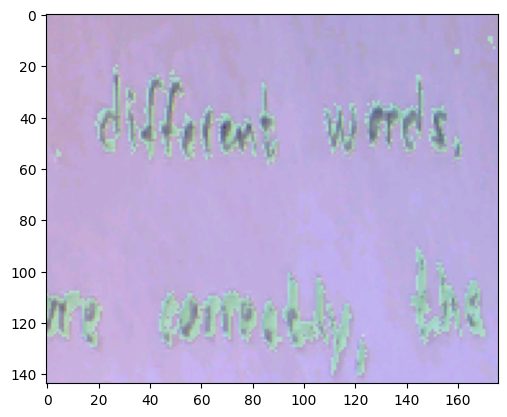

In [10]:
# Reformat the bytes into an image
raw_bytes = np.array(HEXADECIMAL_BYTES, dtype="i2")
image = np.zeros((len(raw_bytes),3), dtype=int)

# Loop through all of the pixels and form the image
for i in range(len(raw_bytes)):
    #Read 16-bit pixel
    pixel = struct.unpack('>h', raw_bytes[i])[0]

    #Convert RGB565 to RGB 24-bit
    r = ((pixel >> 11) & 0x1f) << 3;
    g = ((pixel >> 5) & 0x3f) << 2;
    b = ((pixel >> 0) & 0x1f) << 3;
    image[i] = [r,g,b]

image = np.reshape(image,(144, 176,3)) #QCIF resolution

# Show the image
plt.imshow(image)
plt.show()